# 6장 : 학습 관련 기술들
이번 장에서는 신경망 학습의 핵심 개념들을 만나보게 된다. 이번 장에서 다룰 주제는 가중치 매개변수의 최적값을 탐색하는 최적화 방법, 가중치 매개변수 초깃값, 하이퍼파라미터 설정 방법등, 모두가 신경망 학습에서 중요한 주제이다. 과적합의 대응책인 가중치 감소와 드롭아웃등의 정칙화 방법도 간략히 설명하고 구현해본다. 마지막으로 최근 많은 연구에서 사용하는 배치 정규화도 짧게 알아본다. 이번 장에서 설명하는 기법을 이용하면 신경망(딥러닝) 학습의 효율과 정확도를 높일 수 있다. 그럼 본론으로 들어가보자.

## 6.1 매개변수 갱신
신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이었다. 이는 곧 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 $\small \textbf{최적화}^{\text{optimization}}$라 한다. 안타깝게도 신경망 최적화는 굉장히 어려운 문제이다. 매개변수 공간은 매우 넓고 복잡해서 최적의 솔루션은 쉽게 찾지 못한다. 수식을 풀어 순식간에 최솟값을 구하는 방법 같은 것은 없다. 게다가 심층 신경망에서는 매개변수의 수가 엄청나네 많아져서 사태는 더욱 심각해진다.     

우리는 지금까지 최적의 매개변수 값을 찾는 단서로 매개변수의 기울기(미분)를 이용하였다. 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 몇 번이고 반복해서 점점 최적의 값에 다가갔다. 이것이 $\small \textbf{확률적 경사 하강법}^{\text{SGD}}$이란 단순한 방법인데(비록 이름은 어렵지만), 매개변수 공간을 무작정 찾는 것보다 '똑똑한' 방법이다. SGD는 단순하지만, (문제에 따라서는) SGD보다 똑똑한 방법도 있다. 지금부터 SGD의 단점을 알아본 후 SGD와는 다른 최적화 기법을 소개하고자 한다.

### 6.1.1 모험가 이야기
본론으로 들어가기 전에, 최적화를 해야 하는 우리의 상황을 모험가 이야기에 비유해보고자 한다.     
> 색다른 모험가가 있다. 광활한 메마른 산맥을 여행하면서 날마다 깊은 골짜기를 찾아 발걸음을 옮긴다. 그는 전설에 나오는 세상에서 가장 깊고 낮은 골짜기, '깊은 곳'을 찾아가려 한다. 그것이 그의 여행 목적이다. 게다가 그는 엄격한 '제약' 2개로 자신을 옭아맸다. 하나는 지도를 보지 않을 것, 또 하나는 눈가리개를 쓰는 것이다. 지도도 없고 보이지도 않으니 가장 낮은 골짜기가 광대한 땅 어디에 있는지 알 도리가 없다. 그런 혹독한 조건에서 이 모험가는 어떻게 '깊은 곳'을 찾을 수 있을까? 어떻게 걸음을 옮겨야 효율적으로 '깊은 곳'을 찾아낼 수 있을까?

최적 매개변수를 탐색하는 우리도 이 모험가와 같은 어둠의 세계를 탐험하게 된다. 광대하고 복잡한 지형을 지도도 없이 눈을 가린 채로 '깊은 곳'을 찾지 않으면 안 된다. 척 봐도 어려운 문제임이 느껴지지 않는가?       

이 어려운 상황에서 중요한 단서가 되는 것이 땅의 '기울기'이다. 모험가는 주위 경치는 볼 수 없지만 지금 서 있는 땅의 기울기는 알 수 있다. 발바닥으로 전해지는 것이다. 그래서 지금 서 있는 장소에서 가장 크게 기울어진 방향으로 가자는 것이 SGD의 전략이다. 이 일을 반복하면 언젠가 '깊은 곳'에 찾아갈 수 있을지도 모른다. 적어도 용감한 모험가는 그렇게 생각할지도 모르는 것이다.

### 6.1.2 확률적 경사 하강법(SGD)
최적화 문제의 어려움을 되새기고자 먼저 SGD를 복습해보자. SGD는 수식으로는 다음과 같이 쓸 수 있다.

\begin{equation*}
    \mathbf{W} \leftarrow \mathbf{W} - \eta \frac{\partial L}{\partial \mathbf{W}}
\end{equation*} \tag{6.1}

여기에서 $\mathbf{W}$는 갱신할 가중치 매개변수이고 $\small \frac{\partial L}{\partial \mathbf{W}}$는 $\mathbf{W}$에 대한 손실 함수의 기울기이다. $\eta$는 학습률을 의미하는데, 실제로는 0.01이나 0.001과 같은 값을 미리 정해서 사용하게 된다. 또, $\leftarrow$는 우변의 값으로 좌변의 값을 갱신한다는 뜻이다. 식 (6.1)에서 보듯 SGD는 기울어진 방향으로 일정 거리만 가겠다는 단순한 방법이다. 그러면 이 SGD를 파이썬 클래스로 구현해보도록 하자.

In [1]:
class SGD:
    def __init__(self, learning_rate=None):
        if learning_rate is None:
            self.lr = 0.01
        else:
            if learning_rate <= 0:
                raise ValueError('learning_rate must be positive value')
            else:
                self.lr = learning_rate

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

초기화 때 받는 인수인 `lr`은 learning rate(학습률)를 뜻한다. 이 학습률을 인스턴스 변수로 유지한다. `update(params, grads)`메서드는 SGD 과정에서 반복적으로 불리게 된다. 인수인 `params`와 `grads`는 (지금까지의 신경망 구현과 마찬가지로) 딕셔너리 변수이다. `params['W1'], grads['W1']`등과 같이 각각 가중치 매개변수와 기울기를 갱신하게 된다.        

SGD 클래스를 사용하면 신경망 매개변수의 진행을 다음과 같이 수행할 수 있다.

In [4]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from chapter_5.two_layer_net import TwoLayerNet


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 신경망 생성
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 최적화 기법
optimizer = SGD(0.01)


iters_num = 60000
train_size = x_train.shape[0] # 60000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # 1에폭당 반복 수

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    
    # 갱신
    optimizer.update(network.params, grad)
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"{int(i//iter_per_epoch)+1}에폭 | 훈련 정확도 : {train_acc}, 시험 정확도 :  {test_acc} " )

1에폭 | 훈련 정확도 : 0.10463333333333333, 시험 정확도 :  0.1031 
2에폭 | 훈련 정확도 : 0.6309333333333333, 시험 정확도 :  0.6344 
3에폭 | 훈련 정확도 : 0.7936, 시험 정확도 :  0.7969 
4에폭 | 훈련 정확도 : 0.8485166666666667, 시험 정확도 :  0.853 
5에폭 | 훈련 정확도 : 0.87365, 시험 정확도 :  0.8785 
6에폭 | 훈련 정확도 : 0.8848333333333334, 시험 정확도 :  0.8906 
7에폭 | 훈련 정확도 : 0.89215, 시험 정확도 :  0.8964 
8에폭 | 훈련 정확도 : 0.8976833333333334, 시험 정확도 :  0.9031 
9에폭 | 훈련 정확도 : 0.9015166666666666, 시험 정확도 :  0.9067 
10에폭 | 훈련 정확도 : 0.9044333333333333, 시험 정확도 :  0.9081 
11에폭 | 훈련 정확도 : 0.9068333333333334, 시험 정확도 :  0.912 
12에폭 | 훈련 정확도 : 0.9097, 시험 정확도 :  0.9147 
13에폭 | 훈련 정확도 : 0.9115666666666666, 시험 정확도 :  0.9151 
14에폭 | 훈련 정확도 : 0.9136666666666666, 시험 정확도 :  0.919 
15에폭 | 훈련 정확도 : 0.916, 시험 정확도 :  0.9207 
16에폭 | 훈련 정확도 : 0.918, 시험 정확도 :  0.9221 
17에폭 | 훈련 정확도 : 0.9191666666666667, 시험 정확도 :  0.9245 
18에폭 | 훈련 정확도 : 0.9213166666666667, 시험 정확도 :  0.9244 
19에폭 | 훈련 정확도 : 0.9233, 시험 정확도 :  0.9258 
20에폭 | 훈련 정확도 : 0.9243, 시험 정확도 :  0.927 
21에폭 | 훈련 정확도 : 0.92535, 시험 

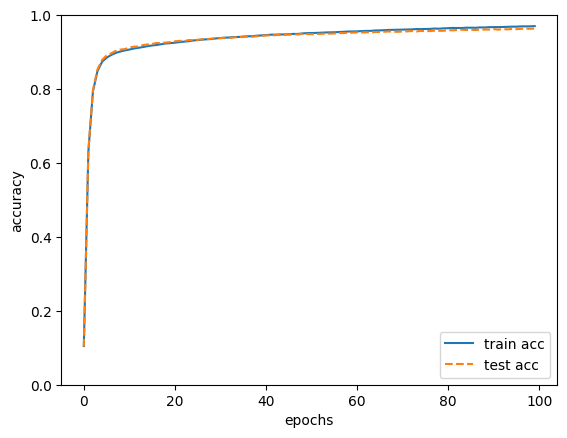

In [7]:
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')


# x축 y축 레이블
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

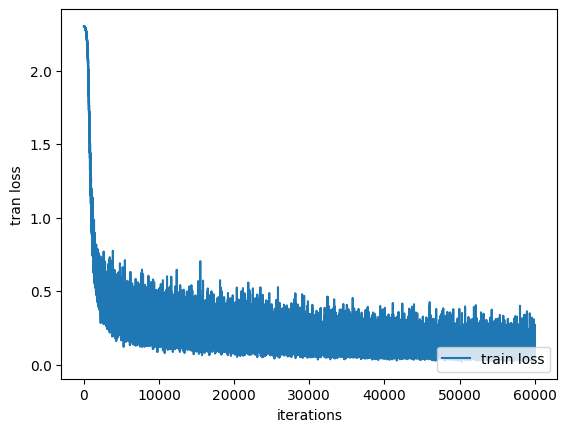

In [9]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')


# x축 y축 레이블
plt.xlabel("iterations")
plt.ylabel("tran loss")
plt.legend(loc='lower right')
plt.show()

optimizer는 '최적화를 행하는 자'라는 뜻의 단어이다. 이 코드에서는 SGD가 그 역할을 한다. 매개변수 갱신은 optimizer가 책임지고 수행하니 우리는 optimizer에 매개변수와 기울기 정보만 넘겨주면 되는 것이다.     

이처럼 최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈화하기 좋다. 예를 들어 곧이어 소개할 모멘텀이라는 최적화 기법 역시 `update(params,grads)`라는 공통의 메서드를 갖도록 구현한다. 그때 `optimizer = SGD()`문장을 `optimizer = Momentum()`으로 변경만 하면 SGD가 모멘텀으로 바뀌게 되는 것이다.

$\textbf{NOTE}$     
대부분의 딥러닝 프레임워크는 다양한 최적화 기법을 구현해 제공하며, 원하는 기법으로 쉽게 바꿀 수 있는 구조로 되어 있다. 예를 들어 Lasagne라는 딥러닝 프레임워크는 다양한 최적화 기법을 구현하여 http://github.com/Lasagne/Lasagne/blob/master/lasagne/updates.py 에 정리해두었다. 사용자는 그중 쓰고 싶은 기법을 선택할 수 있다.

$\textbf{SELF NOTE}$        
> 위의 Lasagne 딥러닝 프레임워크는 Theano에 기반한 프레임워크로, 현재는 거의 사용되지 않는 것으로 보인다. PyTorch에 기반한 최적화 기법은 https://pytorch.org/docs/stable/optim.html 을 참고해서 사용가능하다.

### 6.1.3 SGD의 단점
SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있다. 이번 절에서는 SGD의 단점을 알아보고자 다음 함수의 최솟값을 구하는 문제를 생각해보자.
\begin{equation*}
    f(x,y) = \frac{1}{20} x^{2} + y^{2}
\end{equation*} \tag{6.2}

이 함수는 [그림6-1]의 왼쪽과 같이 '밥그릇'을 $x$축 방향으로 늘인 듯한 모습이고, 실제로 그 등고선은 오른쪽과 같이 $x$축 방향으로 늘인 타원으로 되어 있다.

#### [그림6-1] $\small f(x,y) = \frac{1}{20} x^{2} + y^{2}$ 의 그래프(왼쪽)와 그 등고선(오른쪽)

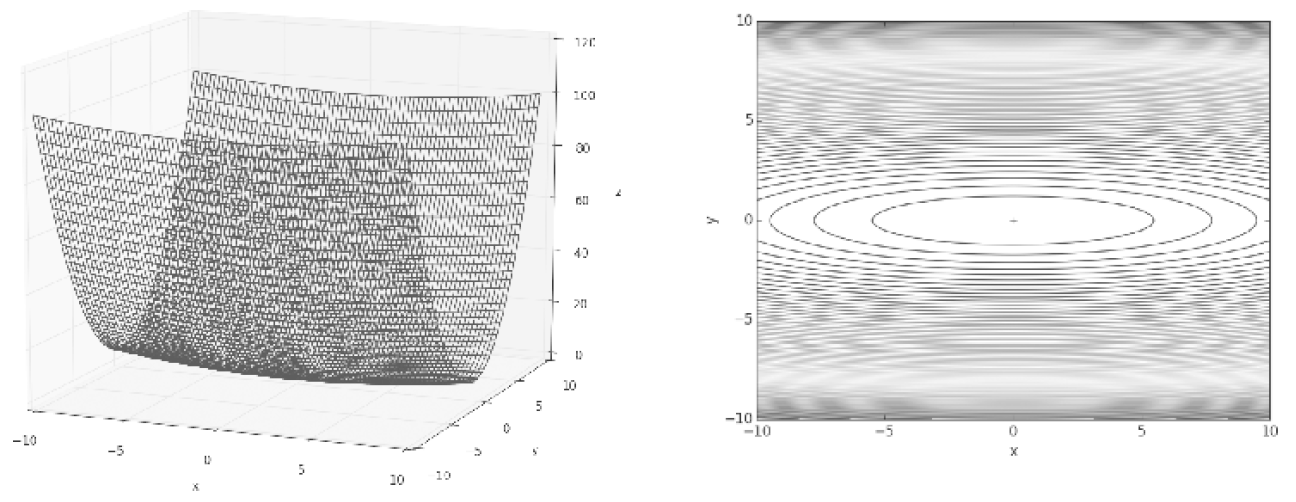

In [11]:
from PIL import Image
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-1.png')

식 (6.2) 함수의 기울기를 그려보면 [그림6-2]처럼 된다. 이 기울기는 $y$축 방향은 크고 $x$축 방향은 작다는 것이 특징이다. 말하자면 $y$축 방향은 가파른데 $x$축 방향은 완만한 것이다. 또, 여기에서 주의할 점으로는 식 (6.2)의 최솟값이 되는 장소는 $(x,y) = (0,0)$이지만, [그림6-2]가 보여주는 기울기 대부분은 $(0,0)$방향을 가리키지 않는다는 것이다.      

#### [그림6-2] $\small f(x,y) = \frac{1}{20} x^{2} + y^{2}$의 기울기

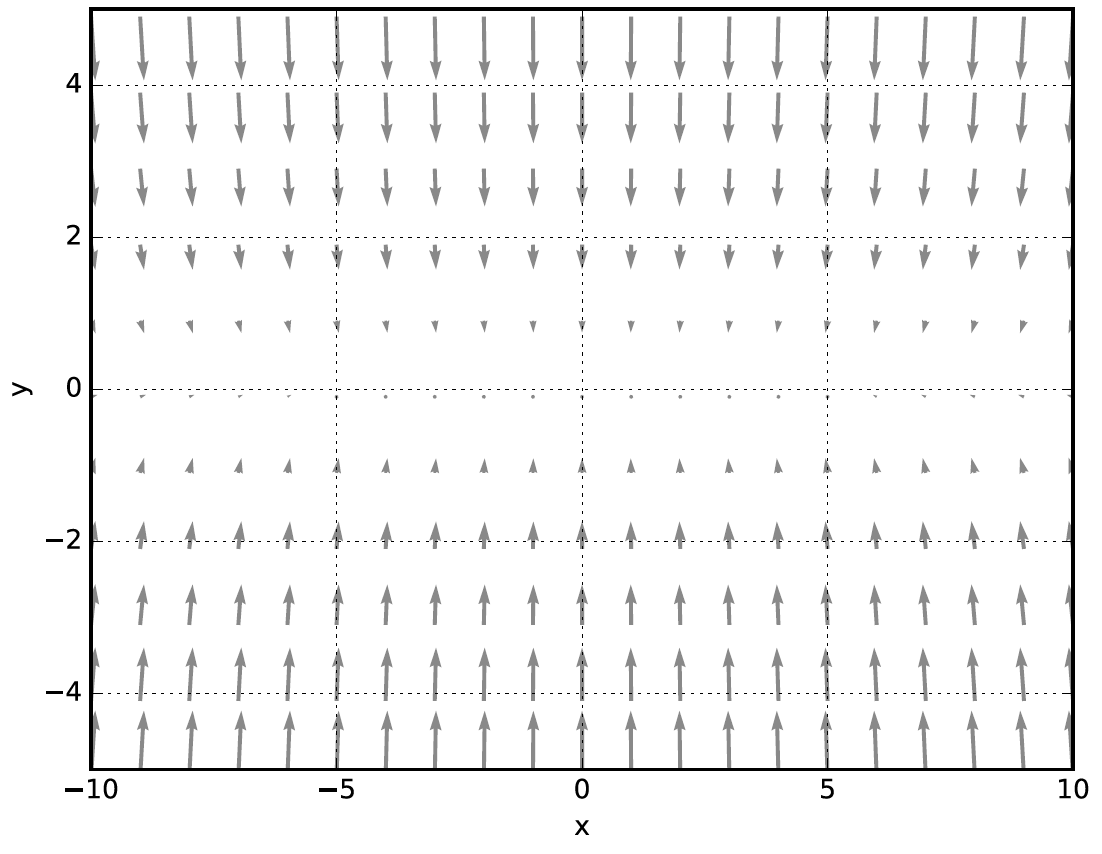

In [12]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-2.png')

이제 [그림6-1]의 함수에 SGD를 적용해보자. 탐색을 시작하는 장소 (초깃값)는 $(x,y) = (-7.0,2.0)$으로 하자. 결과는 [그림6-3]처럼 된다.

#### [그림6-3] SGD에 의한 최적화 갱신 경로 : 최솟값인 $(0,0)$까지 지그재그로 이동하니 비효율적이다.

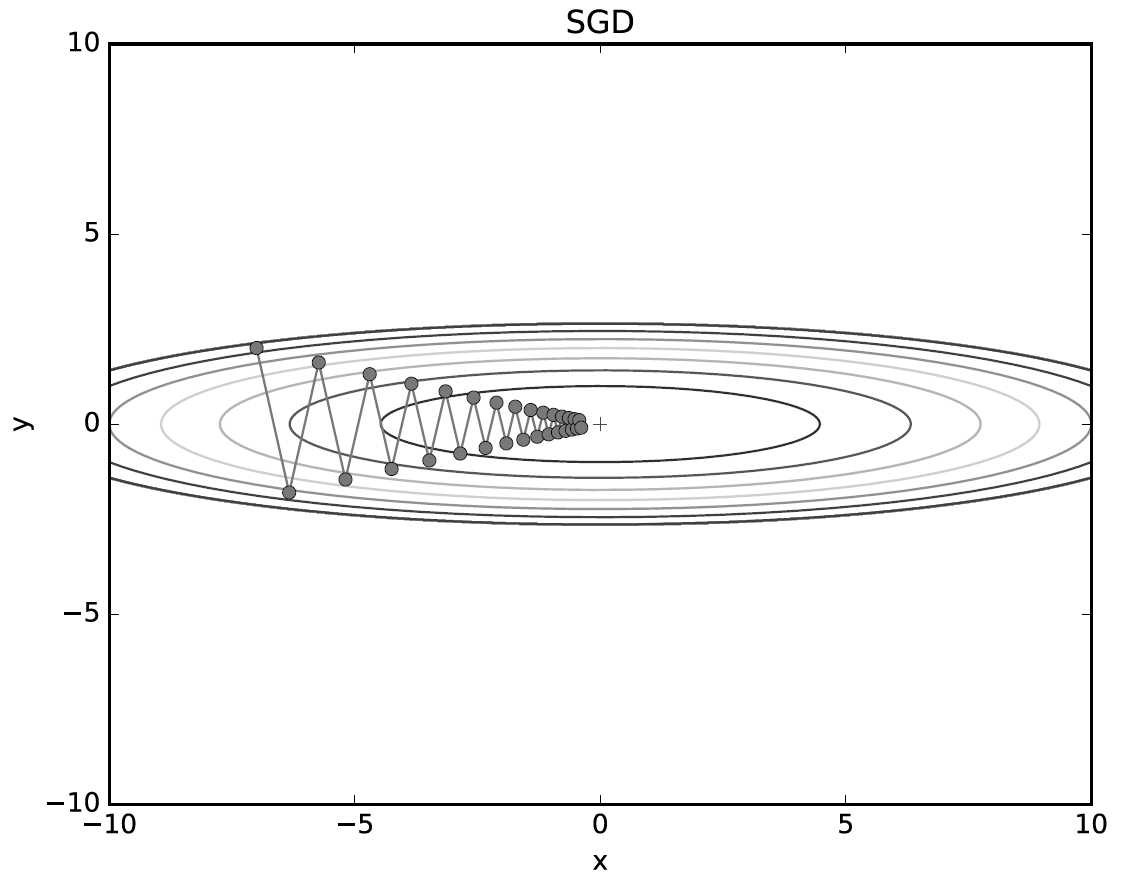

In [13]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-3.png')

SGD는 [그림6-3]과 같은 심하게 굽이진 움직임을 보여준다. 상당히 비효율적인 움직임이다. 즉, SGD의 단점은 $\small \text{비등방성}^{\text{anisotropy}}$함수 (방향에 따라 성질, 즉 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이라는 것이다. 이럴 때는 SGD 같이 무작정 기울어진 방향으로 진행하는 단순한 방식보다 더 영리한 묘안이 간절해진다. 또한, SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리켜서라는 점도 생각해볼 필요가 있다.     

이제부터 SGD의 이러한 단점을 개선해주는 모멘텀, AdaGrad, Adam이라는 세 방법을 소개하고자 한다. 이들은 모두 SGD를 대체하는 기법으로, 각각을 간단히 설명하면서 수식과 파이썬 구현을 살펴보도록 하자.

### 6.1.4 모멘텀
$\small \textbf{모멘텀}^{\text{Momentum}}$은 '운동량'을 뜻하는 단어로, 물리와 관계가 있다. 모멘텀 기법은 수식으로는 다음과 같이 쓸 수 있다.

\begin{equation*}
    \mathbf{v} \leftarrow \alpha \mathbf{v} - \eta \frac{\partial L}{\partial \mathbf{W}}
\end{equation*} \tag{6.3}

\begin{equation*}
    \mathbf{W} \leftarrow \mathbf{W} + \mathbf{v}
\end{equation*} \tag{6.4}

식 (6.1)의 SGD처럼 여기에서도 $\mathbf{W}$는 갱신할 가중치 매개변수, $\small \frac{\partial L}{\partial \mathbf{W}}$는 $\mathbf{W}$에 대한 손실 함수의 기울기, $\eta$는 학습률이다. $\mathbf{v}$라는 변수가 새로 나오는데, 이는 물리에서 말하는 $\small \text{속도}^{\text{velocity}}$에 해당된다. 식 (6.3)은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타낸다. 모멘텀은 [그림6-4]와 같이 공이 그릇의 바닥을 구르는 듯한 움직임을 보여준다.

#### [그림6-4] 모멘텀의 이미지 : 공이 그릇의 곡면(기울기)을 따라 구르듯 움직인다.

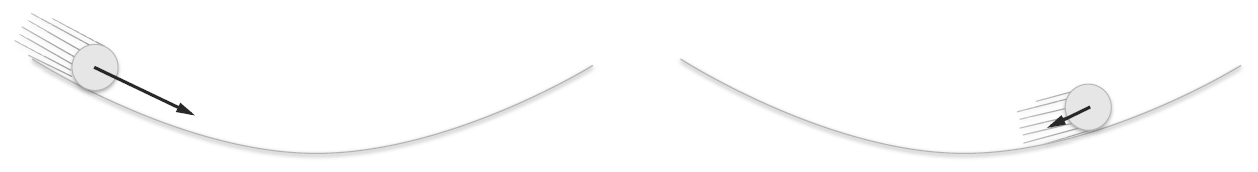

In [14]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-4.png')

또, 식 (6.3)의 $\alpha \mathbf{v}$항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다($\alpha$는 0.9등의 값으로 설정한다). 물리에서의 지면 마찰이나 공기 저항에 해당되는 것이다. 다음은 모멘텀의 구현이다.

In [20]:
class Momentum:
    def __init__(self, learning_rate=None, momentum=None):
        # 학습률 설정
        if learning_rate is None:
            self.lr = 0.01
        else:
            if learning_rate <= 0:
                raise ValueError('learning_rate must be positive value')
            else:
                self.lr = learning_rate
        
        # 모멘텀 계수 설정                
        if momentum is None:
            self.momentum = 0.9
        else:
            if momentum <= 0:
                raise ValueError('learning_rate must be positive value')
            else:
                self.momentum = momentum
        
        # 속도 초기화                
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items(): # params 차원만큼 v 초기화
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = (self.momentum * self.v[key]) + (self.lr * grads[key])
            params[key] -= self.v[key]

In [21]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from chapter_5.two_layer_net import TwoLayerNet


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 신경망 생성
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 최적화 기법
optimizer = Momentum()


iters_num = 60000
train_size = x_train.shape[0] # 60000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # 1에폭당 반복 수

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    
    # 갱신
    optimizer.update(network.params, grad)
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"{int(i//iter_per_epoch)+1}에폭 | 훈련 정확도 : {train_acc}, 시험 정확도 :  {test_acc} " )

1에폭 | 훈련 정확도 : 0.11045, 시험 정확도 :  0.1065 
2에폭 | 훈련 정확도 : 0.9029833333333334, 시험 정확도 :  0.9052 
3에폭 | 훈련 정확도 : 0.9206833333333333, 시험 정확도 :  0.9239 
4에폭 | 훈련 정확도 : 0.9351, 시험 정확도 :  0.9375 
5에폭 | 훈련 정확도 : 0.9433333333333334, 시험 정확도 :  0.9429 
6에폭 | 훈련 정확도 : 0.9495833333333333, 시험 정확도 :  0.9463 
7에폭 | 훈련 정확도 : 0.9556166666666667, 시험 정확도 :  0.9523 
8에폭 | 훈련 정확도 : 0.9587, 시험 정확도 :  0.9564 
9에폭 | 훈련 정확도 : 0.9627, 시험 정확도 :  0.9578 
10에폭 | 훈련 정확도 : 0.9657166666666667, 시험 정확도 :  0.9605 
11에폭 | 훈련 정확도 : 0.96925, 시험 정확도 :  0.9645 
12에폭 | 훈련 정확도 : 0.9720166666666666, 시험 정확도 :  0.9641 
13에폭 | 훈련 정확도 : 0.9740666666666666, 시험 정확도 :  0.9655 
14에폭 | 훈련 정확도 : 0.9753, 시험 정확도 :  0.966 
15에폭 | 훈련 정확도 : 0.9764166666666667, 시험 정확도 :  0.9677 
16에폭 | 훈련 정확도 : 0.9781, 시험 정확도 :  0.9677 
17에폭 | 훈련 정확도 : 0.9786833333333333, 시험 정확도 :  0.9686 
18에폭 | 훈련 정확도 : 0.9786, 시험 정확도 :  0.9692 
19에폭 | 훈련 정확도 : 0.9811833333333333, 시험 정확도 :  0.9705 
20에폭 | 훈련 정확도 : 0.9820666666666666, 시험 정확도 :  0.9711 
21에폭 | 훈련 정확도 : 0.983416

인스턴스 변수 `v`가 물체의 속도이다. `v`는 초기화 때는 아무런 값도 담지 않으며, 대신 `update()`가 처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장한다. 나머지 부분은 식 (6.3)과 식 (6.4)를 간단히 코드로 옮긴 것이다.       

이제 모멘텀을 사용해서 식 (6.2)의 최적화 문제를 풀어보자. 결과는 [그림6-5]처럼 된다.

#### [그림6-5] 모멘텀에 의한 최적화 갱신 경로

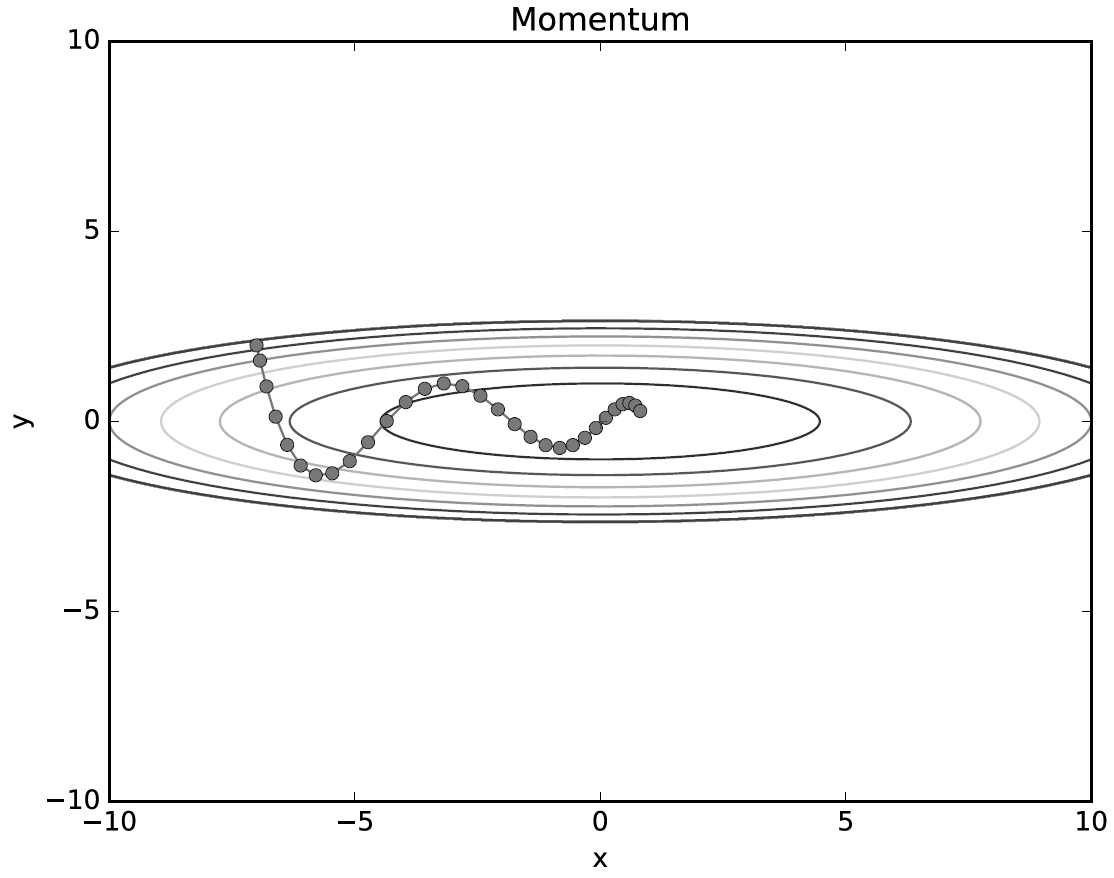

In [22]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-5.png')

그림에서 보듯 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직인다. SGD와 비교하면 '지그재그 정도'가 덜한 것을 알 수 있다. 이는 $x$축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문이다. 거꾸로 $y$축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 $y$축 방향의 속도는 안정적이지 않다. 전체적으로는 SGD보다 $x$축 방향으로 빠르게 다가가 지그재그 움직임이 줄어든다.

### 6.1.5 AdaGrad
신경망 학습에서는 학습률(수식에서는 $\eta$로 표기) 값이 중요하다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다.       

이 학습률을 정하는 효과적 기술로 $\small \textbf{학습률 감소}^{\text{learning rate decay}}$가 있다. 이는 학습을 진행하면서 학습률을 점차 줄여가는 방법이다. 처음에는 크게 학습하다가 조금씩 작게 학습한다는 얘기로, 실제 신경망 학습에 자주 쓰인다.     

학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 것이다. 이를 더욱 발전시킨 것이 $\small \text{AdaGrad}^{\text{Adaptive Gradient}}$이다. AdaGrad는 '각각의' 매개변수에 '맞춤형' 값을 만들어준다.

AdaGrad는 개별 매개변수에 $\small \text{적응적으로}^{\text{adaptive}}$ 학습률을 조정하면서 학습을 진행한다. AdaGrad의 갱신 방법은 수식으로는 다음과 같다.

\begin{equation*}
    \mathbf{h} \leftarrow \mathbf{h} + \left[ \frac{\partial L}{\partial \mathbf{W}} \right] \odot \left[ \frac{\partial L}{\partial \mathbf{W}} \right]
\end{equation*} \tag{6.5}

\begin{equation*}
    \mathbf{W} \leftarrow \mathbf{W} - \eta \frac{1}{\sqrt{\mathbf{h + \epsilon}}} \left[ \frac{\partial L}{\partial \mathbf{W}} \right]
\end{equation*} \tag{6.6}

마찬가지로 $\mathbf{W}$는 갱신할 가중치 매개변수, $\small \frac{\partial L}{\partial \mathbf{W}}$은 $\mathbf{W}$에 대한 손실 함수의 기울기, $\eta$는 학습률을 뜻한다. 여기에서는 새로 $\mathbf{h}$라는 변수가 등장한다. $\mathbf{h}$는 식 (6.5)에서 보듯 기존 기울기 값을 제곱하여 계속 더해준다(식 (6.5)의 $\odot$기호는 행렬의 원소별 곱셈을 의미한다). 그리고 매개변수를 갱신할 때 $\small \frac{1}{\sqrt \mathbf{h}}$를 곱해 학습률을 조정한다. 매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻인데, 다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻한다.

$\textbf{NOTE}$     
> AdaGrad는 과거의 기울기를 제곱하여 계속 더해간다. 그래서 학습을 진행할수록 갱신 강도가 약해진다. 실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 전형 갱신되지 않게 된다. 이 문제를 개선한 기법으로서 RMSProp이라는 방법이 있다. RMSProp은 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영한다. 이를 $\small \textbf{지수이동평균}^{\text{Exponential Moving Average, EMA}}$이라 하여, 과거 기울기의 반영 규모를 기하급수적으로 감소시킨다.       

그럼 AdaGrad의 구현을 살펴보자.

In [6]:
class AdaGrad:
    def __init__(self, learning_rate=None):
        if learning_rate is None:
            self.lr = 0.01
        else:
            if learning_rate <= 0:
                raise ValueError('learning_rate must be positive value')
            else:
                self.lr = learning_rate
        
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items(): # params 차원만큼 h 초기화
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key] # 기울기 제곱 원소별로 누적
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 가중치 원소별로 업데이트

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from chapter_5.two_layer_net import TwoLayerNet


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 신경망 생성
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 최적화 기법
optimizer = AdaGrad()


iters_num = 60000
train_size = x_train.shape[0] # 60000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # 1에폭당 반복 수

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    
    # 갱신
    optimizer.update(network.params, grad)
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"{int(i//iter_per_epoch)+1}에폭 | 훈련 정확도 : {train_acc}, 시험 정확도 :  {test_acc} " )

1에폭 | 훈련 정확도 : 0.19701666666666667, 시험 정확도 :  0.2048 
2에폭 | 훈련 정확도 : 0.9147, 시험 정확도 :  0.9163 
3에폭 | 훈련 정확도 : 0.9282, 시험 정확도 :  0.9288 
4에폭 | 훈련 정확도 : 0.9335166666666667, 시험 정확도 :  0.9334 
5에폭 | 훈련 정확도 : 0.9360333333333334, 시험 정확도 :  0.9369 
6에폭 | 훈련 정확도 : 0.94035, 시험 정확도 :  0.9393 
7에폭 | 훈련 정확도 : 0.9425833333333333, 시험 정확도 :  0.9414 
8에폭 | 훈련 정확도 : 0.9444666666666667, 시험 정확도 :  0.9437 
9에폭 | 훈련 정확도 : 0.9454666666666667, 시험 정확도 :  0.9445 
10에폭 | 훈련 정확도 : 0.9486, 시험 정확도 :  0.9467 
11에폭 | 훈련 정확도 : 0.9486666666666667, 시험 정확도 :  0.946 
12에폭 | 훈련 정확도 : 0.95015, 시험 정확도 :  0.9473 
13에폭 | 훈련 정확도 : 0.9511166666666667, 시험 정확도 :  0.9484 
14에폭 | 훈련 정확도 : 0.9522, 시험 정확도 :  0.9496 
15에폭 | 훈련 정확도 : 0.95295, 시험 정확도 :  0.9493 
16에폭 | 훈련 정확도 : 0.9539166666666666, 시험 정확도 :  0.9503 
17에폭 | 훈련 정확도 : 0.9551333333333333, 시험 정확도 :  0.9513 
18에폭 | 훈련 정확도 : 0.9552333333333334, 시험 정확도 :  0.9524 
19에폭 | 훈련 정확도 : 0.9559333333333333, 시험 정확도 :  0.9524 
20에폭 | 훈련 정확도 : 0.9569166666666666, 시험 정확도 :  0.9534 
21에폭 | 훈련 

여기에서 주의할 것은 마지막 줄에서 `1e-7`이라는 작은 값을 더하는 부분이다. 이 작은 값은 `self.h[key]`에 0이 담겨 있다 해도 0으로 나누는 사태를 막아준다. 대부분의 딥러닝 프레임워크에서는 이 값도 인수로 설정할 수 있다.        

그럼 AdaGrad를 사용해서 식 (6.2)의 최적화 문제를 풀어보자. 결과는 [그림6-6]처럼 된다.

#### [그림6-6] AdaGrad에 의한 최적화 갱신 경로

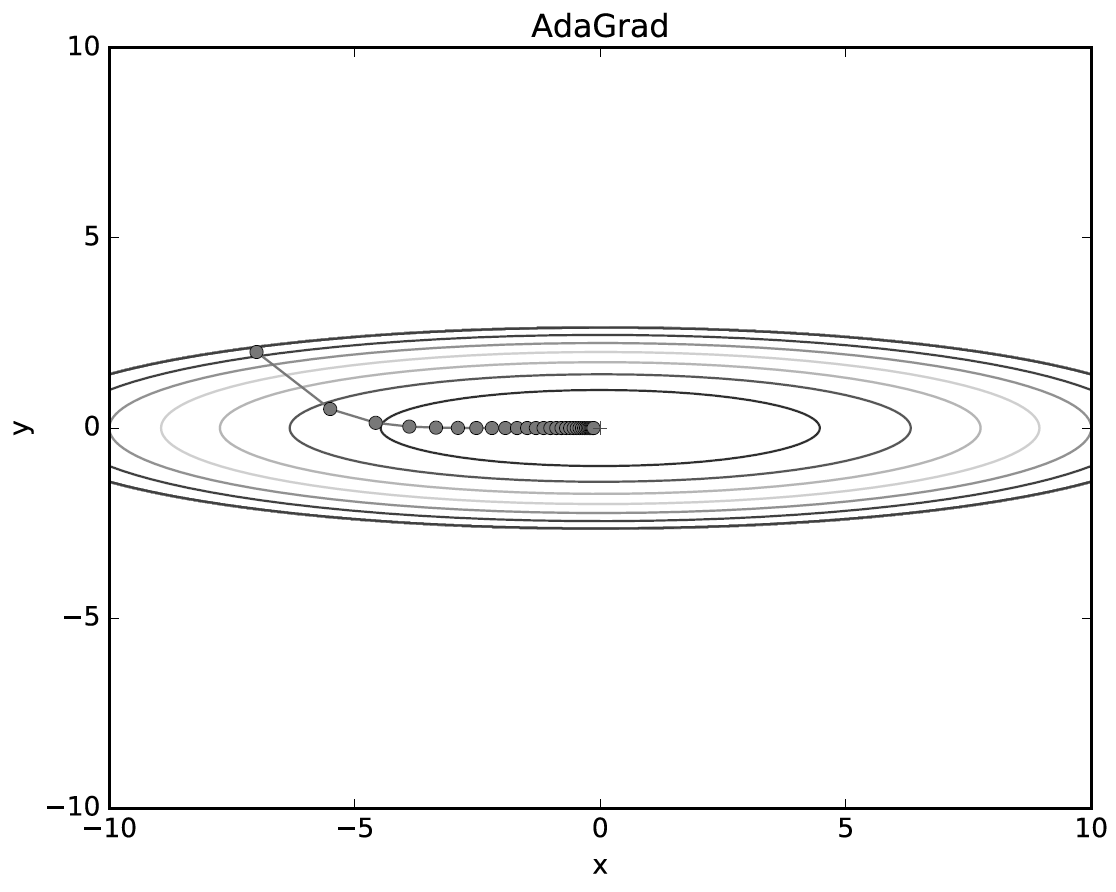

In [5]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-6.png')

[그림6-6]을 보면 최솟값을 향해 효율적으로 움직이는 것을 알 수 있다. $y$축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정된다. 그래서 $y$축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어들게 된다.

$\textbf{SELF NOTE}$        
> 실제 AdaGrad를 처음 제안한 논문 'Adaptive Subgradient Methods for Online Learning and Stochastic Optimization'에서는 다음과 같은 표기방식을 사용한다.(출처 : https://optimization.cbe.cornell.edu/index.php?title=AdaGrad)     

- $f(x)$ : 모수 $x$를 가지는 확률적 목적 함수
- $f_{t}(x)$ : $t$번째 반복에서의 $f(x)$ 값. 편의상 $f_t$로 표기.
- $g_{t}(x)$ : $f_{t}(x)$의 $x$에 대한 미분, $\nabla_{x}f_{t}(x)$으로 표기. 편의상 $g_t$로 표기.
- $x_t$ : $t$번째 반복에서의 모수
- $G_t$ : $\textstyle\sum_{\tau=1}^{t}g_{\tau}g^{\top}_{\tau}$

이러한 경우 'general AdaGrad update rule'은 다음과 같다.
\begin{equation*}
    x_{t+1} = x_{t} - \eta G^{-1/2}_{t}g_{t}
\end{equation*}

그런데 위와 같은 알고리즘은 모수 차원이 커질수록(고차원 문제) 계산적으로 풀 수 없는 문제가 생긴다. 특히 $G^{-1/2}_{t}$을 계산하는 것이 매우 어렵다. 그래서 저자는 다음과 같은 특수한 형태로 'simplified AdaGrad update rule'을 사용한다.

\begin{equation*}
    x_{t+1} = x_{t} - \eta \text{diag}(G_{t})^{-1/2}g_{t}
\end{equation*}

이 경우는 $\text{diag}(G_{t})^{-1/2}$이 선형적인 시간복잡도내에서 계산될 수 있다. 그리고 $\text{diag}(G_{t})$의 역행렬을 계산할때 발생하는 singularity problem을 피하기 위해 다음과 같은 방법이 일반적으로 사용된다.

\begin{equation*}
    x_{t+1} = x_{t} - \eta \text{diag}(G_{t} +\epsilon I)^{-1/2}g_{t}
\end{equation*}

이제 다시 본론으로 돌아와서, 신경망기반 모형에 대해 AdaGrad가 어떻게 적용되는지 살펴보자.       
편의상 가중치에 대한 기울기 행렬을 다음과 같은 $\small \frac{\partial L}{\partial \mathbf{W}}$라고 하자.

\begin{equation*}
    \frac{\partial L}{\partial \mathbf{W}} =
    \begin{bmatrix*}
        \tfrac{\partial L}{\partial w_{11}} & \tfrac{\partial L}{\partial w_{12}} & \cdots & \tfrac{\partial L}{\partial w_{1l}} \\
        \tfrac{\partial L}{\partial w_{21}} & \tfrac{\partial L}{\partial w_{22}} & \cdots & \tfrac{\partial L}{\partial w_{2l}} \\
        \vdots & \vdots &  & \vdots \\
        \tfrac{\partial L}{\partial w_{p1}} & \tfrac{\partial L}{\partial w_{p2}} & \cdots & \tfrac{\partial L}{\partial w_{pl}}
    \end{bmatrix*}
\end{equation*}

AdaGrad 원논문의 $G_{t}$형태를 얻으려면 $\small \frac{\partial L}{\partial \mathbf{W}}$를 벡터화시킨후에 outer product를 구해야 한다.

\begin{equation*}
    \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) = \left[\frac{\partial L}{\partial w_{11}}, \frac{\partial L}{\partial w_{12}}, \ldots, \frac{\partial L}{\partial w_{pl}}\right]
\end{equation*}

이 경우 'general AdaGrad update rule'은 다음과 같게 된다.

\begin{equation*}
    \mathbf{h} \leftarrow \mathbf{h} + \left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]\left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]^{\top}
\end{equation*}

\begin{equation*}
    \mathbf{W} \leftarrow \mathbf{W} - \eta \frac{1}{\sqrt\mathbf{h}}\left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]
\end{equation*}

'simplified AdaGrad update rule'은 다음과 같다. ($I$는 $(pl \times pl)$크기의 identity matrix)

\begin{equation*}
    \mathbf{h} \leftarrow \mathbf{h} + \text{diag}\left(\left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]\left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]^{\top}\right)
\end{equation*}

\begin{equation*}
    \mathbf{W} \leftarrow \mathbf{W} - \eta \frac{1}{\sqrt\mathbf{h + \epsilon I}}\left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]
\end{equation*}

그런데, 이 때 첫번째 단계를 자세히 살펴보면

\begin{equation*}
    \text{diag}\left(\left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]\left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]^{\top}\right) = \left[\frac{\partial L}{\partial w_{11}}^{2}, \frac{\partial L}{\partial w_{12}}^{2}, \ldots, \frac{\partial L}{\partial w_{pl}}^{2} \right]
\end{equation*}

이고

\begin{equation*}
    \frac{\partial L}{\partial \mathbf{W}} \odot \frac{\partial L}{\partial \mathbf{W}} = 
    \begin{bmatrix*}
        \tfrac{\partial L}{\partial w_{11}}^{2} & \tfrac{\partial L}{\partial w_{12}}^{2} & \cdots & \tfrac{\partial L}{\partial w_{1l}}^{2} \\
        \tfrac{\partial L}{\partial w_{21}}^{2} & \tfrac{\partial L}{\partial w_{22}}^{2} & \cdots & \tfrac{\partial L}{\partial w_{2l}}^{2} \\
        \vdots & \vdots &  & \vdots \\
        \tfrac{\partial L}{\partial w_{p1}}^{2} & \tfrac{\partial L}{\partial w_{p2}}^{2} & \cdots & \tfrac{\partial L}{\partial w_{pl}}^{2}
    \end{bmatrix*}
\end{equation*}

이므로, 사실상 파이썬의 브로드캐스팅기능을 활용하게 되면

\begin{equation*}
    \mathbf{h} \leftarrow \mathbf{h} + \left[ \frac{\partial L}{\partial \mathbf{W}} \right] \odot \left[ \frac{\partial L}{\partial \mathbf{W}} \right]
\end{equation*}

\begin{equation*}
    \mathbf{W} \leftarrow \mathbf{W} - \eta \frac{1}{\sqrt{\mathbf{h + \epsilon}}} \left[ \frac{\partial L}{\partial \mathbf{W}} \right]
\end{equation*}

와

\begin{equation*}
    \mathbf{h} \leftarrow \mathbf{h} + \text{diag}\left(\left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]\left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]^{\top}\right)
\end{equation*}

\begin{equation*}
    \mathbf{W} \leftarrow \mathbf{W} - \eta \frac{1}{\sqrt\mathbf{h + \epsilon I}}\left[ \text{vec}\left( \frac{\partial L}{\partial \mathbf{W}} \right) \right]
\end{equation*}

는 계산적으로 동일함을 확인할 수 있다.

즉, AdaGrad는 말 그대로, 모든 가중치(Gradient) 성분에 대해 적응적으로(Adaptive) 학습률을 조정하면서 학습을 진행하는 것이다.




$\textbf{SELF NOTE}$        
> RMSprop algorithm은 다음과 같다.

\begin{equation*}
    G_{t} = \rho G_{t-1} + (1-\rho) g_{t}g^{\top}_{t}
\end{equation*}

\begin{equation*}
    x_{t+1} = x_{t} - \eta \text{diag}(G_{t} + \epsilon I)^{-1/2} g_{t}
\end{equation*}

where $0 < \rho \leq 1$

In [21]:
class RMSprop:
    def __init__(self, learning_rate=None, moving_rate=None):
        if learning_rate is None:
            self.lr = 0.01
        else:
            if learning_rate <= 0:
                raise ValueError('learning_rate must be positive value')
            else:
                self.lr = learning_rate
                
        if moving_rate is None:
            self.mr = 0.9
        else:
            if moving_rate <= 0:
                raise ValueError('rho must be positive value')
            else:
                self.mr = moving_rate
        
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items(): # params 차원만큼 h 초기화
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            # grads[key] = np.clip(grads[key], -2.0, 2.0) # 그라디어트 클리핑
            self.h[key] *= self.mr
            self.h[key] += (1 - self.mr) *(grads[key] * grads[key]) # 기울기 제곱 원소별로 누적
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-8) # 가중치 원소별로 업데이트

In [22]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from chapter_5.two_layer_net import TwoLayerNet


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 신경망 생성
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 최적화 기법
optimizer = RMSprop(0.001, 0.5)


iters_num = 60000
train_size = x_train.shape[0] # 60000
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # 1에폭당 반복 수

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    
    # 갱신
    optimizer.update(network.params, grad)
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"{int(i//iter_per_epoch)+1}에폭 | 훈련 정확도 : {train_acc}, 시험 정확도 :  {test_acc} " )
        print

1에폭 | 훈련 정확도 : 0.32366666666666666, 시험 정확도 :  0.326 
2에폭 | 훈련 정확도 : 0.9124166666666667, 시험 정확도 :  0.914 
3에폭 | 훈련 정확도 : 0.9293666666666667, 시험 정확도 :  0.9293 
4에폭 | 훈련 정확도 : 0.9421166666666667, 시험 정확도 :  0.9389 
5에폭 | 훈련 정확도 : 0.9496166666666667, 시험 정확도 :  0.9477 
6에폭 | 훈련 정확도 : 0.9552166666666667, 시험 정확도 :  0.9528 
7에폭 | 훈련 정확도 : 0.95895, 시험 정확도 :  0.9567 
8에폭 | 훈련 정확도 : 0.9620666666666666, 시험 정확도 :  0.9565 
9에폭 | 훈련 정확도 : 0.9647333333333333, 시험 정확도 :  0.9591 
10에폭 | 훈련 정확도 : 0.9676166666666667, 시험 정확도 :  0.9608 
11에폭 | 훈련 정확도 : 0.9698833333333333, 시험 정확도 :  0.9635 
12에폭 | 훈련 정확도 : 0.9720666666666666, 시험 정확도 :  0.9628 
13에폭 | 훈련 정확도 : 0.9721833333333333, 시험 정확도 :  0.9656 
14에폭 | 훈련 정확도 : 0.9743833333333334, 시험 정확도 :  0.9649 
15에폭 | 훈련 정확도 : 0.9759166666666667, 시험 정확도 :  0.966 
16에폭 | 훈련 정확도 : 0.9762, 시험 정확도 :  0.9678 
17에폭 | 훈련 정확도 : 0.9769166666666667, 시험 정확도 :  0.9655 
18에폭 | 훈련 정확도 : 0.9778833333333333, 시험 정확도 :  0.9647 
19에폭 | 훈련 정확도 : 0.9786166666666667, 시험 정확도 :  0.9659 
20에폭 | 훈

### 6.1.6 Adam
모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였다. AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다. 그럼 혹시 이 두 기법을 융합하면 어떻게 될까? 이런 생각에서 출발한 기법이 바로 $\small \textbf{Adam}^{\text{Adaptive Momentum}}$이다.      

Adam은 2015년에 제안된 방법이다. 그 이론은 다소 복잡하지만 직관적으로는 모멘텀과 AdaGrad를 융합한 듯한 방법이다. 이 두 방법의 이점을 조합했다면 매개변수 공간을 효율적으로 탐색해줄 것으로 기대해도 좋을 것이다. 또, 하이퍼파라미터의 '편향 보정'이 진행된다는 점도 Adam의 특징이다.        

그럼 Adam을 사용하여 식 (6.2)의 최적화 문제를 풀어보자. 결과는 [그림6-7]과 같다.

#### [그림6-7] Adam에 의한 최적화 갱신 경로

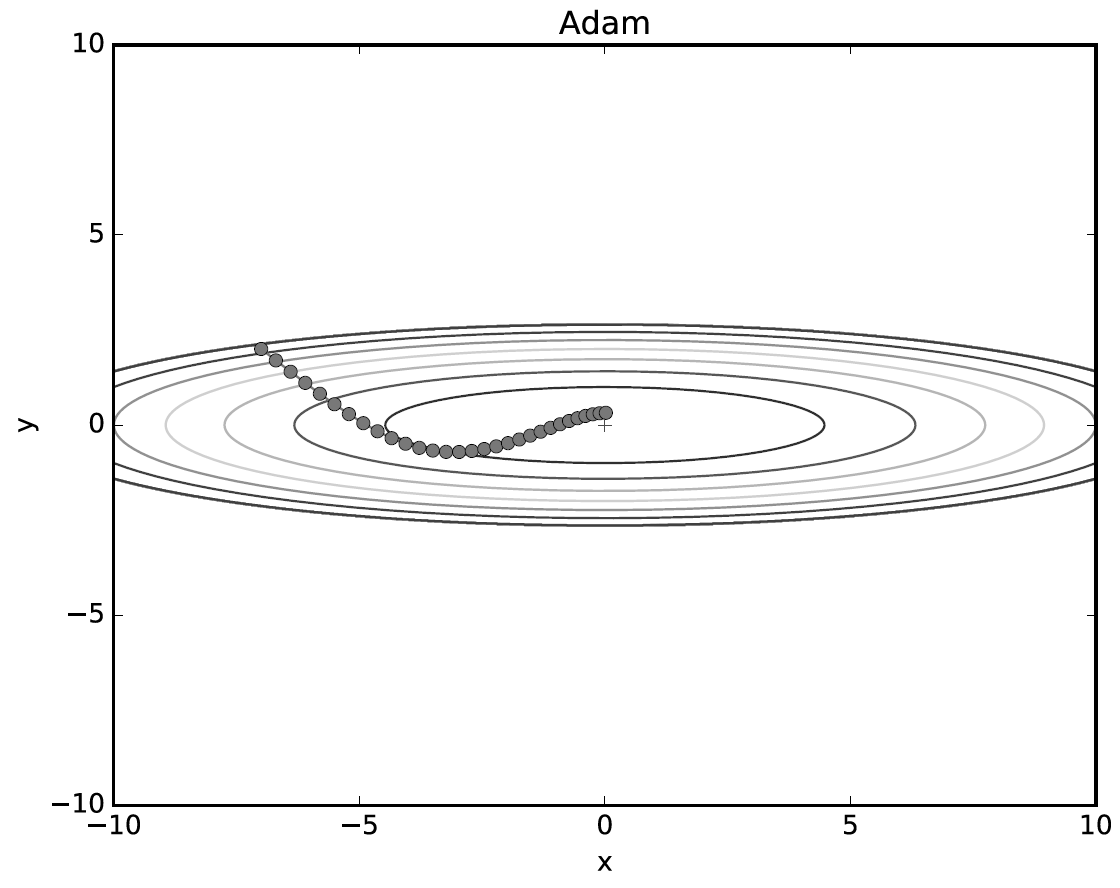

In [20]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-7.png')

[그림6-7]과 같이 Adam 갱신 과정도 그릇 바닥을 구르듯 움직인다. 모멘텀과 비슷한 패턴인데, 모멘텀 때보다 공의 좌우 흔들림이 적다. 이는 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택이다.      

$\textbf{NOTE}$     
> Adam은 하이퍼파라미터를 3개 설정한다. 하나는 지금까지의 학습률(논문에서는 $\alpha$로 등장), 나머지 두 개는 일차 모멘텀용 계수 $\beta_1$과 이차 모멘텀용 계수 $\beta_2$이다. 논문에 따르면 기본 설정값은 $\beta_1=0.9, \beta_2=0.999$이며, 이 값이면 많은 경우에 좋은 결과를 얻을 수 있다고 한다.

In [27]:
class Adam:
    def __init__(self, learning_rate=None, beta_1=None, beta_2=None):
        if learning_rate is None:
            self.lr = 0.001
        else:
            if learning_rate <= 0:
                raise ValueError('learning_rate must be positive value')
            else:
                self.lr = learning_rate
                
        if beta_1 is None:
            self.b1 = 0.9
        else:
            if beta_1 <= 0:
                raise ValueError('beta_1 must be positive value')
            else:
                self.b1 = beta_1
        
        if beta_2 is None:
            self.b2 = 0.999
        else:
            if beta_2 <= 0:
                raise ValueError('beta_1 must be positive value')
            else:
                self.b2 = beta_2
                
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m = {}
            for key, val in params.items(): # params 차원만큼 m 초기화
                self.m[key] = np.zeros_like(val)
                
        if self.v is None:
            self.v = {}
            for key, val in params.items(): # params 차원만큼 m 초기화
                self.v[key] = np.zeros_like(val)
                
        self.iter += 1
        b1_t = self.b1 ** self.iter
        b2_t = self.b2 ** self.iter
                
        for key in params.keys():
            # grads[key] = np.clip(grads[key], -2.0, 2.0) # 그라디어트 클리핑
            self.m[key] *= self.b1
            self.m[key] += (1 - self.b1) *(grads[key]) # 기울기 제곱 원소별로 누적
            self.v[key] *= self.b2
            self.v[key] += (1 - self.b2) *(grads[key] * grads[key]) # 기울기 제곱 원소별로 누적
            
            m_hat = self.m[key] / (1 - b1_t  )
            v_hat = self.v[key] / (1 - b2_t  )
            
            params[key] -= self.lr * m_hat / (np.sqrt(v_hat) + 1e-8) # 가중치 원소별로 업데이트

In [28]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from chapter_5.two_layer_net import TwoLayerNet


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 신경망 생성
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 최적화 기법
optimizer = Adam()


iters_num = 60000
train_size = x_train.shape[0] # 60000
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # 1에폭당 반복 수

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    
    # 갱신
    optimizer.update(network.params, grad)
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"{int(i//iter_per_epoch)+1}에폭 | 훈련 정확도 : {train_acc}, 시험 정확도 :  {test_acc} " )

1에폭 | 훈련 정확도 : 0.13313333333333333, 시험 정확도 :  0.1402 
2에폭 | 훈련 정확도 : 0.923, 시험 정확도 :  0.9226 
3에폭 | 훈련 정확도 : 0.9394166666666667, 시험 정확도 :  0.9355 
4에폭 | 훈련 정확도 : 0.9519166666666666, 시험 정확도 :  0.9491 
5에폭 | 훈련 정확도 : 0.9605166666666667, 시험 정확도 :  0.9557 
6에폭 | 훈련 정확도 : 0.9659666666666666, 시험 정확도 :  0.9611 
7에폭 | 훈련 정확도 : 0.97085, 시험 정확도 :  0.9649 
8에폭 | 훈련 정확도 : 0.9715, 시험 정확도 :  0.9651 
9에폭 | 훈련 정확도 : 0.9755333333333334, 시험 정확도 :  0.9679 
10에폭 | 훈련 정확도 : 0.9774166666666667, 시험 정확도 :  0.9677 
11에폭 | 훈련 정확도 : 0.9797333333333333, 시험 정확도 :  0.9689 
12에폭 | 훈련 정확도 : 0.9825, 시험 정확도 :  0.9704 
13에폭 | 훈련 정확도 : 0.9843666666666666, 시험 정확도 :  0.9703 
14에폭 | 훈련 정확도 : 0.9845833333333334, 시험 정확도 :  0.9718 
15에폭 | 훈련 정확도 : 0.9864333333333334, 시험 정확도 :  0.9728 
16에폭 | 훈련 정확도 : 0.9868166666666667, 시험 정확도 :  0.9724 
17에폭 | 훈련 정확도 : 0.9894333333333334, 시험 정확도 :  0.9719 
18에폭 | 훈련 정확도 : 0.9892333333333333, 시험 정확도 :  0.9732 
19에폭 | 훈련 정확도 : 0.9896333333333334, 시험 정확도 :  0.9732 
20에폭 | 훈련 정확도 : 0.9904, 시험 정확도

### 6.1.7 어느 갱신 방법을 이용할 것인가?
지금까지 매개변수의 갱신 방법을 4개 살펴보았다. 이번 절에서는 이들 네 기법의 결과를 비교해보도록 한다.

#### [그림6-8] 최적화 기법 비교 : SGD, 모멘텀, AdaGrad, Adam

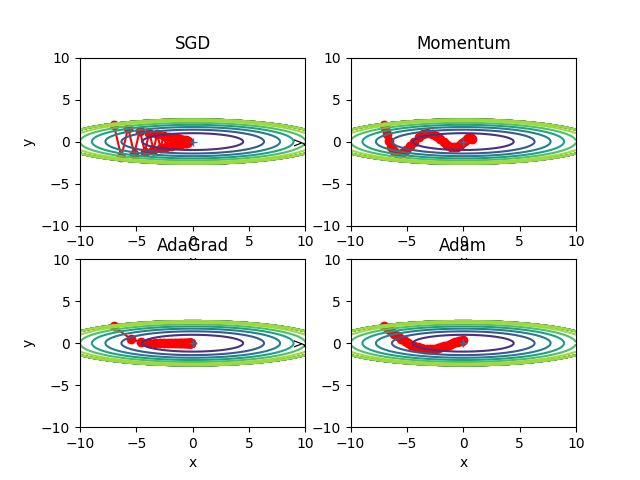

In [29]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-8(2).png')

[그림6-8]과 같이 사용한 기법에 따라 갱신 경로가 다르다. 이 그림만 보면 AdaGrad가 가장 나아보이지만, 사실 그 결과는 풀어야 할 문제가 무엇이냐에 따라 달라지므로 주의해야 한다. 또, 당연하지만 (학습률 등의) 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 바뀐다.     

SGD, 모멘텀, AdaGrad, Adam의 네 후보 중 어느 것을 채택하면 될까? 유감스럽게도 모든 문제에서 항상 뛰어난 기법이라는 것은 (아직까진) 없다. 각자의 장단이 있어 잘 푸는 문제와 서툰 문제가 있다.        

(이 책이 쓰인 시점에서) 지금도 많은 연구에서 SGD를 사용하고 있다. 모멘텀과 AdaGrad도 시도해볼 만한 가치가 충분하다. 요즘에는 많은 사람이 Adam에 만족해하며 쓰는 것 같다. 이 책에서는 주로 SGD와 Adam을 사용하지만, 여러분은 각자의 상황을 고려해 여러 가지로 시도해보길 권장한다.

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교
손글씨 숫자 인식을 대상으로 지금까지 설명한 방법들을 비교해보자. 각 방법의 학습 진도가 얼마나 다른지를 [그림6-9]에 그려보았다.      

#### [그림6-9] MNIST 데이터셋에 대한 학습 진도 비교

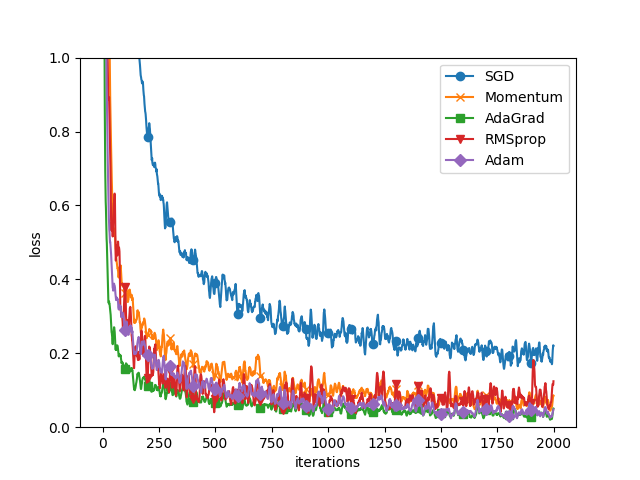

In [30]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-9(2).png')

이 실험은 각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용해 측정한 것이다.     

[그림6-9]의 결과를 보면 SGD의 학습 진도가 가장 느리다. 나머지 세 기법의 진도는 비슷한데, 잘 보면 AdaGrad가 조금 더 빠른 것 같다. 이 실험에서 주의할 점은 하이퍼파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과도 달라진다는 것이다. 다만 일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높게 나타난다.

## 6.2 가중치의 초깃값
신경망 학습에서 특히 중요한 것이 가중치의 초깃값이다. 가중치의 초깃값을 무엇으로 설정하느냐에 따라 신경망 학습의 성패가 갈라지는 일이 실제로 자주 발생한다. 이번 절에서는 권장 초깃값에 대해서 설명하고 실험을 통해 실제로 신경망 학습이 신속하게 이뤄지는 모습을 확인해보도록 한다.

### 6.2.1 초깃값을 0으로 하면?
이제부터 오버피팅을 억제해 범용 성능을 높이는 테크닉인 $\small \textbf{가중치 감소}^{\text{weight decay}}$기법을 소개하고자 한다. 가중치 감소는 간단히 말하자면 가중치 매개변수의 값이 작아지도록 학습하는 방법이다. 가중치 값을 작게 하여 과적합이 일어나지 않게 하는 것이다.      

가중치를 작게 만들고 싶으면 초깃값도 최대한 작은 값에서 시작하는 것이 정공법이다. 사실 지금까지 가중치의 초깃값은 `0.01 * np.random.randn(10,100)`처럼 정규분포에서 생성되는 값을 0.01배 한 작은 값(표준편차가 0.01인 정규분포)을 사용했다.     

그렇다면 가중치의 초깃값을 모두 0으로 설정하면 어떨까? 답부터 얘기하자면, 이는 나쁜 아이디어이다. 실제로 가중치 초깃값을 0으로 하면 학습이 올바로 이뤄지지 않는다.      

초깃값을 모두 0으로 해서는 안되는 이유가 무엇일까? (정확히는 가중치를 균일한 값으로 설정해서는 안된다.) 그 이유는 바로 오차역전파법에서 모든 가중치의 값이 똑같이 생산되기 때문이다. 예를 들어 2층 신경망에서 첫 번째와 두 번째 층의 가중치가 0이라고 가정해보자. 그럼 순전파 때는 입력층의 가중치가 0이기 때문에 두 번째 층의 뉴런에 모두 같은 값이 전달되게 된다. 두 번째 층의 모든 뉴런에 같은 값이 입력된다는 것은 역전파 때 두 번째 층의 가중치가 모두 똑같이 갱신된다는 말이 된다('곱셈 노드의 역전파'를 떠올려보자). 그래서 가중치들은 같은 초깃값에서 시작하고 갱신을 거쳐도 여전히 같은 값을 유지하는 것이다. 이는 가중치를 여러 개 갖는 의미를 사라지게 한다. 이 '가중치가 고르게 되어버리는 상황'을 막으려면 (정확히는 가중치의 대칭적인 구조를 무너뜨리려면) 초깃값을 무작위로 설정해야 한다.

### 6.2.2 은닉층의 활성화값 분포
은닉층의 활성화값 (활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있다. 이번 절에서는 가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 간단한 실험을 해보고자 한다. 구체적으로는 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 그려보고자 한다. (스탠포드 대학교의 CS231n 수업 참조)        

이 실험을 위한 전체 소스 코드는 ch06/weight_init_activation_histogram.py에 있으니 참고하기 바란다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1 # 표준편차가 1인 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

층이 5개가 있으며, 각 층의 뉴런은 100개씩이다. 입력 데이터로서 1,000개의 데이터를 정규분포로 무작위로 생성하여 이 5층 신경망에 흐르게 한다. 활성화함수로는 시그모이드 함수를 이용했고, 각 층의 활성화 결과를 `activations` 변수에 저장한다. 이 코드에서는 가중치의 분포에 주의해야 한다. 이번에는 표준편차가 1인 정규분포를 이용했는데, 이 분포된 정도(표준 편차)를 바꿔가며 활성화 값들의 분포가 어떻게 변화하는지 관찰하는 것이 이 실험의 목적이다. 그럼 `activations`에 저장된 각 층의 활성화값 데이터를 히스토그램으로 그려보자.

#### [그림6-10] 가중치를 표준편차가 1인 정규분포로 초기화할 때의 각 층의 활성화값 분포

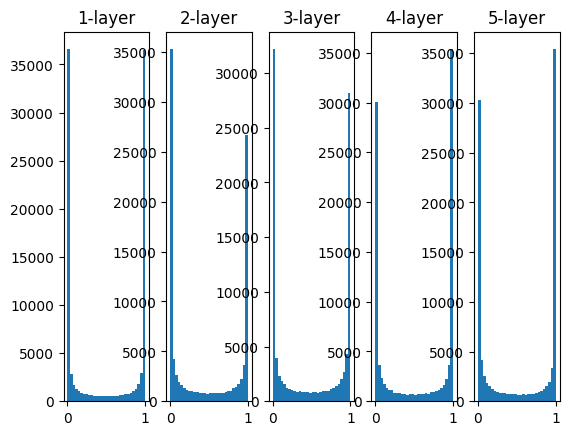

In [2]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다. 여기에서 사용한 시그모이드 함수는 그 출력이 0에 가까워지자(또는 1에 가까워지자) 그 미분은 0에 다가간다. 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라지게 된다. 이것이 $\small \textbf{기울기 소실}^{\text{gradient vanishing}}$이라 알려진 문제이다. 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수 있다.

다음 코드는 출력층외에 활성함수를 ReLU로 바꾼 코드이다. 이 경우에도 마찬가지로 각 층의 활성화 값들이 0과 1에 치우쳐 분포되는 것을 확인할 수 있다.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    x = np.clip(x, -500, 500)  # x의 값을 -500과 500 사이로 제한합니다.
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))  

def Relu(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations_relu = {} # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations_relu[i-1]
        
    w = np.random.randn(node_num, node_num) * 1 # 표준편차가 1인 정규분포
    a = np.dot(x, w)
    if i == hidden_layer_size-1:
        z = sigmoid(a)
    else:
        z = Relu(a)
    activations_relu[i] = z

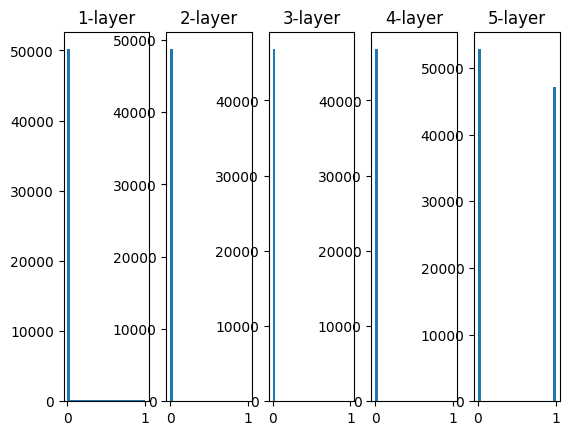

In [7]:
# 히스토그램 그리기
for i, a in activations_relu.items():
    plt.subplot(1, len(activations_relu), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

이번에는 가중치의 표준편차를 0.01로 바꿔 같은 실험을 반복해보독 하자. 앞의 코드에서 가중치 초깃값 설정 부분의 표준편차를 1에서 0.01로 바꾸기만 하면 된다.

#### [그림6-11] 가중치를 표준편차가 0.01인 정규분포로 초기화할 때의 각 층의 활성화값 분포

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01 # 표준편차가 0.01인 정규분포
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

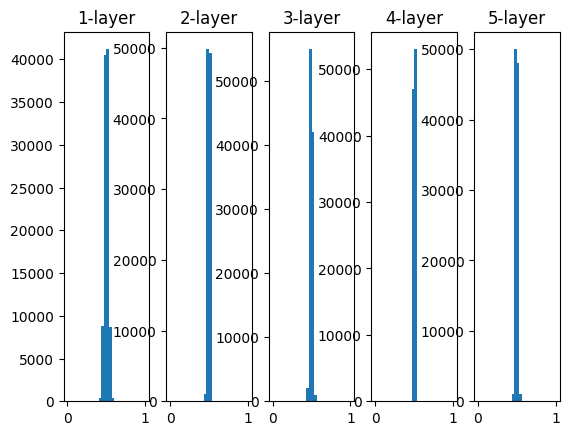

In [9]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

이번에는 0.5 부근에 집중되었다(밑의 예제의 경우는 출력층을 제외하면 0 부근에 집중되고 있다). 앞의 예처럼 0과 1로 치우치진 않았으니 기울기 소실 문제는 덜 일어나고 있으나, 활성화값들이 치우쳤다는 것은 표현력 관점에서 큰 문제가 있는 것이다. 무슨 이야기냐 하면, 이 상황에서는 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러 개 둔 의미가 없어진다는 뜻이다. 예를 들어 뉴런 100개가 거의 같은 값을 출력한다면 뉴런 1개짜리와 별반 다를 게 없는 것이다. 그래서 활성화값들이 치우치면 $\small \textbf{표현력을 제한}$한다는 관점에서 문제가 되게 된다.

$\textbf{WARNING}$      
> 각 층의 활성화값은 적당히 고루 분포되어야 한다. 층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이뤄지기 때문이다. 반대로 치우친 데이터가 흐르면 기울기 소실이나 표현력 제한 문제에 빠져서 학습이 잘 이뤄지지 않는 경우가 생긴다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    x = np.clip(x, -500, 500)  # x의 값을 -500과 500 사이로 제한합니다.
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))  

def Relu(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations_relu = {} # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations_relu[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01 # 표준편차가 0.01인 정규분포
    a = np.dot(x, w)
    if i == hidden_layer_size-1:
        z = sigmoid(a)
    else:
        z = Relu(a)
    activations_relu[i] = z

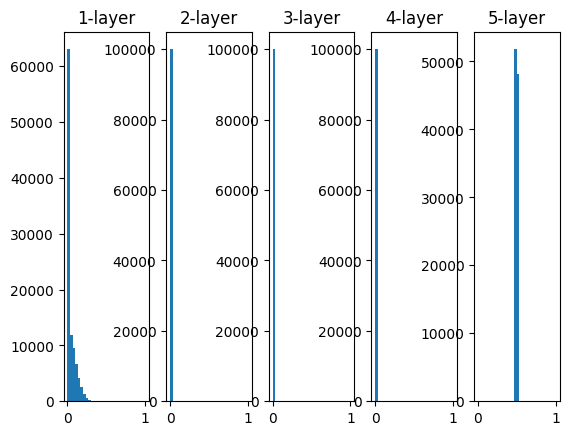

In [2]:
# 히스토그램 그리기
for i, a in activations_relu.items():
    plt.subplot(1, len(activations_relu), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

이어서 $\small \text{사비에르 글로로트}^{\text{Xavier Glorot}}$와 $\small \text{요슈아 벤지오}^{\text{Yoshua Bengio}}$의 논문에서 권장하는 가중치 초깃값인, 일명 $\small \textbf{Xavier 초깃값}$을 써보고자 한다. 현재 Xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있다. 예를 들어 $\small \text{카페}^{\text{Caffe}}$프레임워크는 가중치 초깃값을 설정할 때 인수로 xavier를 지정할 수 있다.

이 논문은 각 층의 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 하였다. 그리고 앞 계층의 노드가 $n$개라면 표준편차가 $\small \frac{1}{\sqrt n}$인 분포를 사용하면 된다는 결론을 이끌었다(그림 6-12).      

참고로 사비에르의 논문은 앞 층의 입력 노드 수 외에 다음 층의 출력 노드 수도 고려한 설정값을 제안한다. 다만 카페 등의 프레임워크는 앞 층의 입력 노드만으로 계산화하도록 단순화하였다.

#### [그림6-12] Xavier 초깃값 : 초깃값의 표준편차가 $\small \frac{1}{\sqrt n}$이 되도록 설정 ($n$은 앞 층의 노드 수)

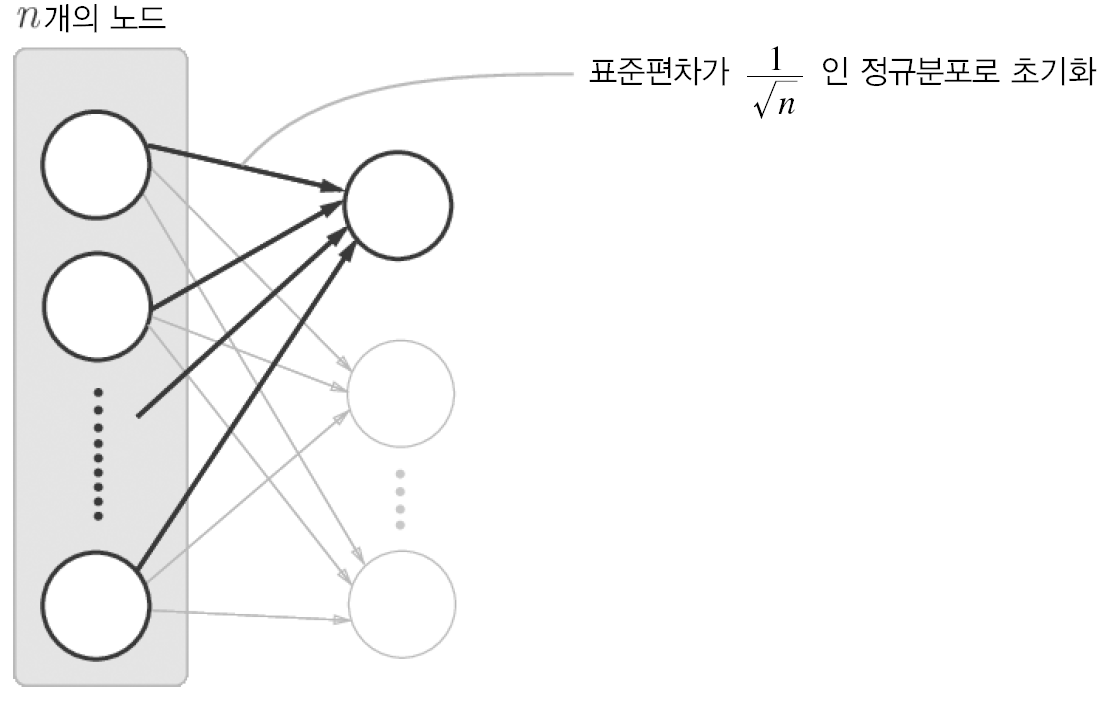

In [5]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-12.png')

Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다. 이제 Xavier 초깃값을 써서 실험해보자. 코드에서는 가중치 초깃값 설정 부분을 다음과 같이 고쳐주기만 하면 된다.

#### [그림6-13] 가중치의 초깃값으로 'Xavier 초깃값'을 이용할 때의 각 층의 활성화값 분포

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z

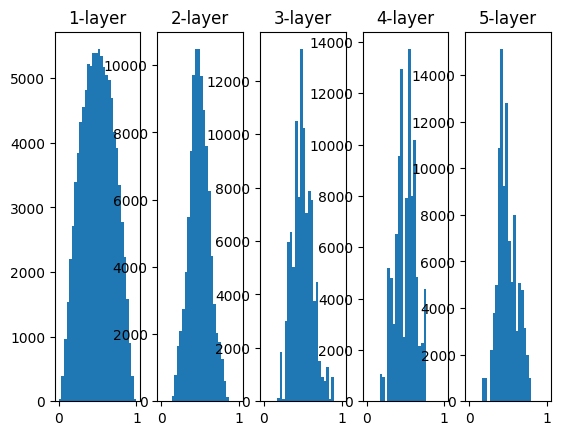

In [7]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    x = np.clip(x, -500, 500)  # x의 값을 -500과 500 사이로 제한합니다.
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))  

def Relu(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations_relu = {} # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations_relu[i-1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    if i == hidden_layer_size-1:
        z = sigmoid(a)
    else:
        z = Relu(a)
    activations_relu[i] = z

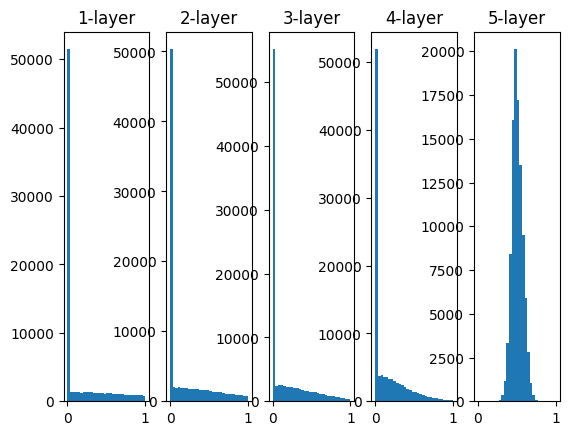

In [9]:
# 히스토그램 그리기
for i, a in activations_relu.items():
    plt.subplot(1, len(activations_relu), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Xavier 초깃값을 사용한 결과는 [그림6-13]처럼 된다. 이 결과를 보면 층이 깊어지면서 형태가 다소 일그러지지만, 앞에서 본 방식보다는 확실히 넓게 분포됨을 알 수 있다. 각 층에 흐르는 데이터는 적당히 퍼져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 기대된다.

$\textbf{NOTE}$     
> [그림6-13]은 오른쪽으로 갈수록 약간씩 일그러지고 있다. 이 일그러짐은 sigmoid 함수 대신 tanh 함수(쌍곡선 함수)를 사용하면 개선된다. 실제로 tanh함수를 이용하면 말끔한 종 모양으로 분포가 형성된다. tanh 함수도 sigmoid 함수와 같은 'S'자 모양 곡선 함수이다. 다만 tanh 함수가 원점(0,0)에서 대칭인 S 곡선인 반면, sigmoid 함수는 $(x,y) = (0,0.5)$에서 대칭인 S곡선이다. 활성화 함수용으로는 원점에서 대칭인 함수가 바람직하다고 알려져 있다.(Xavier 초깃값에 대해서)

$\textbf{SELF NOTE}$        
> 활성화 함수가 tanh 인 경우에 Xavier 초깃값을 사용했을 때의 각 층의 활성화값 분포는 다음과 같다.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층이 5개
activations = {} # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = tanh(a)
    activations[i] = z

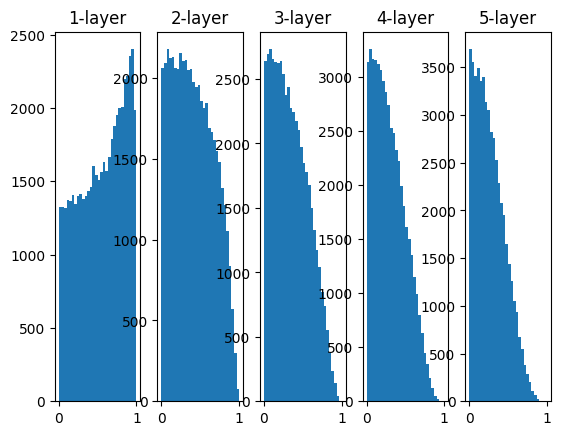

In [17]:
# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값
Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과이다. sigmoid 함수와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있다. 그래서 Xavier 초깃값이 적당하다. 반면 ReLU를 이용할 때는 ReLU에 특화된 초깃값을 이용하라고 권장한다. 이 특화된 초깃값을 찾아낸 $\small \text{카이밍 히}^{\text{Kaiming He}}$의 이름을 따 $\small \textbf{He 초깃값}$이라 한다. He 초깃값은 앞 계층의 노드가 $n$개일 때, 표준편차가 $\small \sqrt{\frac{2}{n}}$인 정규분포를 사용한다. Xavier 초깃값이 $\small \sqrt{\frac{1}{n}}$ 이었던 것을 주지하라. ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 (직관적으로) 해석할 수 있겠다.        

그러면 활성화 함수로 ReLU를 이용한 경우의 활성화값 분포를 함께 보자. [그림6-14]는 표준편차가 0.01인 정규분포(std=0.01), Xavier 초깃값, ReLU 전용 He 초깃값일 때의 실험 결과를 차례로 보여준다.

#### [그림6-14] 활성화 함수로 ReLU를 사용한 경우의 가중치 초깃값에 따른 활성화값 분포 변화

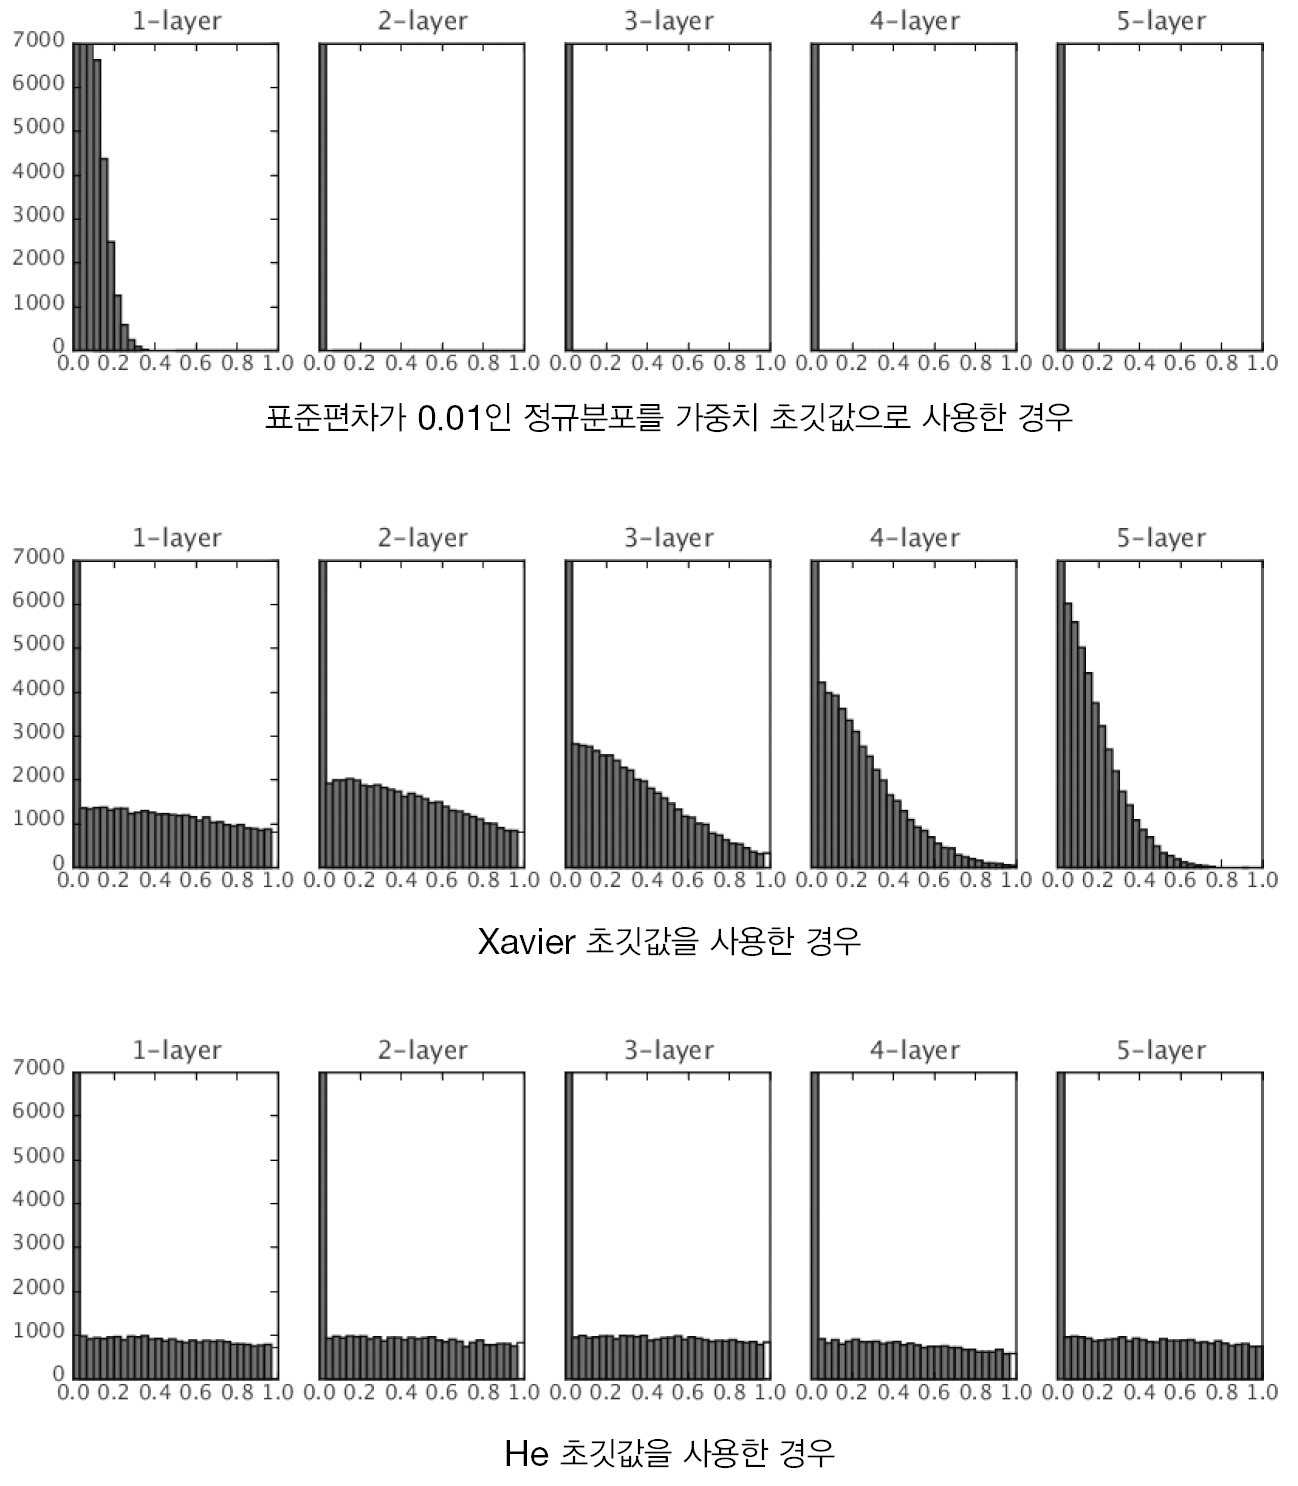

In [18]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-14.png')

결과를 보면 std = 0.01 일 때의 각 층의 활성화값들은 아주 작은 값들이다. 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻이다. 이는 중대한 문제이며, 실제로도 학습이 거의 이뤄지지 않을 것이다.        

이어서 Xavier 초깃값 결과를 보면 이쪽은 층이 깊어지면서 치우침이 조금씩 커진다. 실제로 층이 깊어지면 활성화값들의 치우침도 커지고, 학습할 때 '기울기 소실'문제를 일으킨다.      

마지막으로 He 초깃값은 모든 층에서 균일하게 분포되었다. 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것을 기대할 수 있다.      

이상의 실험 결과를 바탕으로, 활성화 함수로 ReLU를 사용할 때는 He 초깃값을, sigmoid나 tanh 등의 S자 모양 곡선일 때는 Xavier 초깃값을 쓰도록 하자. 이것이 현재의 모범 사례라고 할 수 있다.

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

이번에는 '실제' 데이터를 가지고 가중치의 초깃값을 주는 방법이 신경망 학습에 얼마나 영향을 주는지 확인해보자. 지금까지 살펴본 세 경우(std=0.01, Xavier 초깃값, He 초깃값) 모두를 실험해보자(소스 코드는 ch06/weight_init_compare.py에 있다). 결과는 [그림6-15]에 있다.

#### [그림6-15] MNIST 데이터셋으로 살펴본 '가중치의 초깃값'에 따른 비교

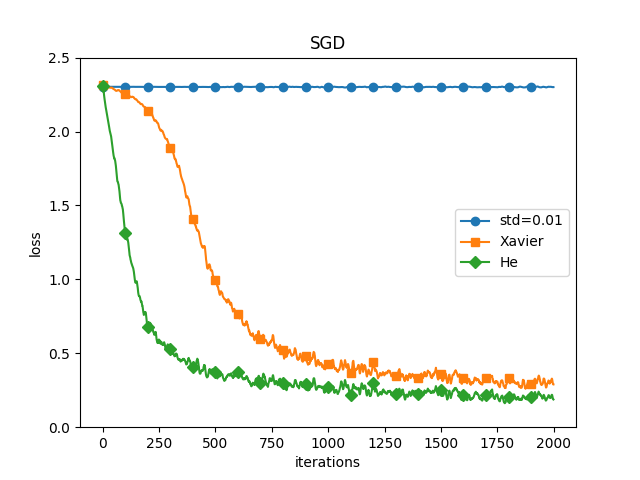

In [19]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_init_compare\\sgd.png')

이 실험은 층별 뉴런 수가 100개인 5층 신경망에서 활성화 함수로 ReLU를 사용하였다. [그림6-15]에서 보듯 `std=0.01`일 때는 학습이 전혀 이뤄지지 않는다. 앞서 활성화값의 분포에서 본 것처럼 순전파 때 너무 작은 값(0 근처로 밀집한 데이터)이 흐르기 때문이다. 그로 인해 역전파 때의 기울기도 작아져 가중치가 거의 갱신되지 않는 것이다. 그로 인해 역전파 때의 기울기도 작아져 가중치가 거의 갱신되지 않는다. 반대로 Xavier와 He 초깃값의 경우는 학습이 순조롭게 이뤄지고 있다. 다만 학습 진도는 He 초깃값 쪽이 조금 더 빠른 것으로 보인다.       

지금까지 살펴보았듯이 초깃값은 신경망 학습에 아주 중요한 포인트이다. 가중치의 초깃값에 따라 신경망 학습의 성패가 갈리는 경우가 많다. 초깃값의 중요성은 간과하기 쉬운 부분이나, 어떤 일이든 시작(초깃값)이 중요한 법. 가중치 초깃값이 중요함을 다시 한번 강조하면서 이번 절을 마친다.

$\textbf{SELF NOTE}$        
> 사실 위의 실험의 경우, 최적화 알고리즘을 SGD가 아닌 다른 것으로 바꿔서 실험을 하는 경우 `std=0.01`인 경우도 학습이 잘 되는 것을 확인할 수 있다.(특히 RMSprop, Adam) 즉, 신경망 학습에 있어서 단순히 하나의 조건만 만족되면 신경망 학습이 성공적으로 이뤄지는 것이 아니고 초깃값, 최적화 알고리즘, 학습률, 층의 갯수, 뉴런의 갯수등 매우 다양한 조건들이 맞물려서 성공적인 신경망 학습으로 이어지게 되는 것이다. 다음의 사진들은 순서대로 Momentum, AdaGrad, RMSprop, Adam 최적화 알고리즘에 대하여 실험을 진행한 결과들이다.

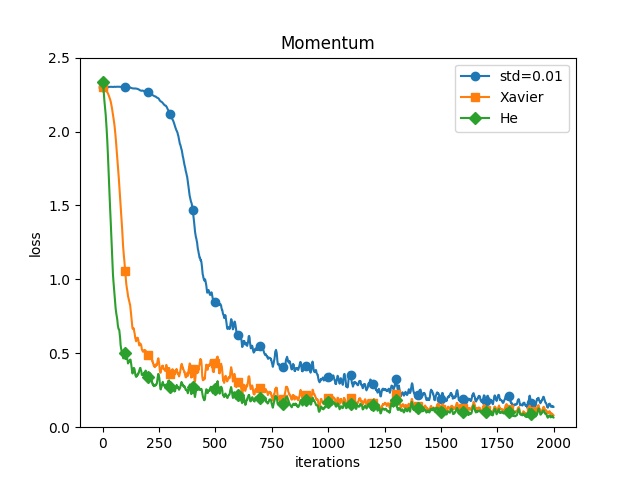

In [20]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_init_compare\\momentum.png')

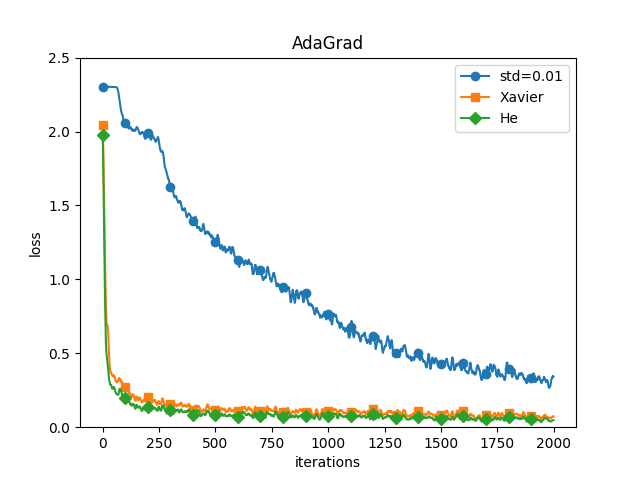

In [21]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_init_compare\\adagrad.png')

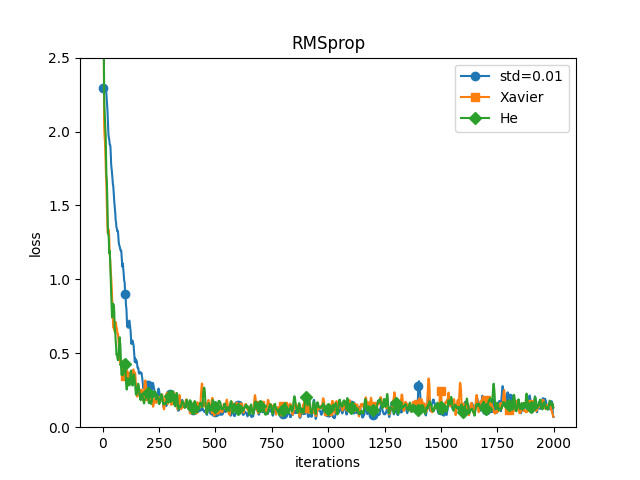

In [22]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_init_compare\\rmsprop.png')

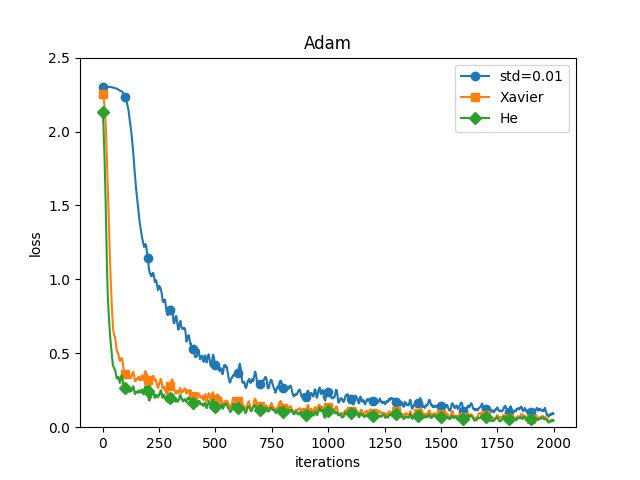

In [23]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_init_compare\\adam.png')

## 6.3 배치 정규화
앞 절에서는 각 층의 활성화값 분포를 관찰해보며, 가중치의 초깃값을 적절히 설정하면 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원활하게 수행됨을 배웠다. 그렇다면 각 층이 활성화를 적당히 퍼뜨리도록 '강제'해보면 어떨까? 실은 $\small \textbf{배치 정규화}^{\text{Batch Normalization}}$가 그런 아이디어에서 출발한 방법이다.

### 6.3.1 배치 정규화 알고리즘
배치 정규화는 2015년에 제안된 방법이다. 배치 정규화는 아직 세상에 나온 지 얼마 안 된 기법임에도 많은 연구자와 기술자가 즐겨 사용하고 있다. 실제로 기계학습 콘테스트의 결과를 보면 이 배치 정규화를 사용하여 뛰어난 결과를 달성한 예가 많다.     

배치 정규화가 주목받는 이유는 다음과 같다.
- 학습을 빨리 진행할 수 있다(학습 속도 개선).
- 초깃값에 크게 의존하지 않는다(골치 아픈 초깃값 선택 장애여 안녕!).
- 과적합을 억제한다(드롭아웃 등의 필요성 감소).

딥러닝의 학습 시간이 길다는 걸 생각하면 첫 번째 이점은 아주 반가운 일이다. 초깃값에 크게 신경 쓸 필요가 없고, 과적합 억제 효과가 있다는 점도 딥러닝 학습의 두통거리를 덜어준다.

자, 배치 정규화의 기본 아이디어는 앞에서 말했듯이 각 층에서의 활성화 값이 적당히 분포되도록 조정하는 것이다. 그래서 [그림6-16]과 같이 데이터 분포를 정규화하는 '$\small \text{배치 정규화}^{\text{Batch Norm}}$계층'을 신경망에 삽입하게 된다.

#### [그림6-16] 배치 정규화를 사용한 신경망의 예

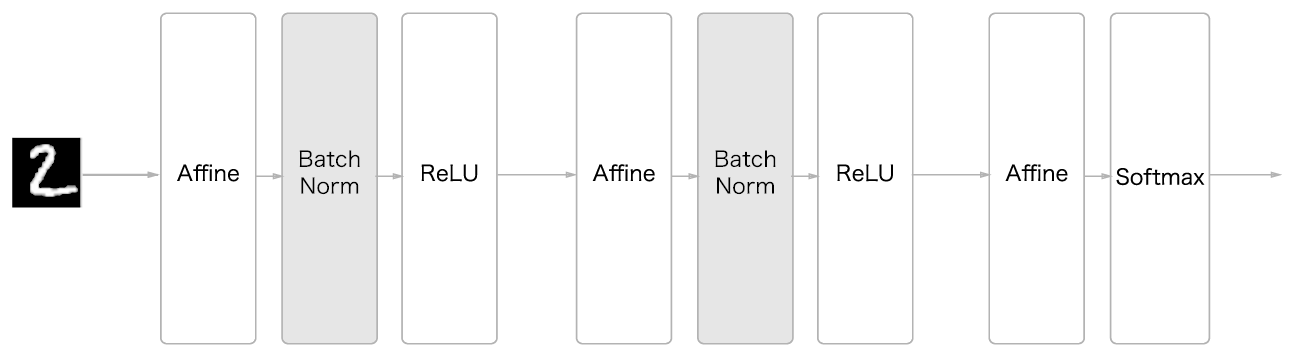

In [24]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-16.png')

배치 정규화는 그 이름과 같이 학습 시 미니배치를 단위로 정규화한다. 구체적으로는 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화한다. 수식으로는 다음과 같다.

\begin{equation*}
    \mu_{B} \leftarrow \frac{1}{m} \displaystyle\sum_{i=1}^{m}x_i
\end{equation*}

\begin{equation*}
    \sigma^{2}_{B} \leftarrow \frac{1}{m} \displaystyle\sum_{i=1}^{m} (x_i - \mu_{B})^{2}
\end{equation*}

\begin{equation*}
    \hat{x}_i \leftarrow \cfrac{x_i - \mu_B}{\sqrt{\sigma^{2}_{B}+ \epsilon}}
\end{equation*} \tag{6.7}

여기에는 미니배치 $B = \{x_1,x_2, \ldots, x_m\}$이라는 $m$개의 입력 데이터의 집합에 대해 평균 $\mu_B$와 분산 $\sigma^{2}_{B}$을 구한다. 그리고 입력 데이터를 평균이 0, 분산이 1이 되게 (적절한 분포가 되게)정규화한다. 그리고 식 (6.7)에서 $\epsilon$기호는 작은 값(예컨대 10e-7 등)으로, 0으로 나누는 사태를 방지하는 역할을 한다.     

식 (6.7)은 단순히 미니배치 입력 데이터 $\{x_1,x_2, \ldots, x_m\}$을 평균 0, 분산 1인 데이터 $\{\hat{x}_1,\hat{x}_2, \ldots, \hat{x}_m\}$으로 변환하는 일을 한다. 이 처리를 활성화 함수의 앞 (혹은 뒤)에 삽입함으로써 데이터 분포가 덜 치우치게 할 수 있다.      

또, 배치 정규화 계층마다 이 정규화된 데이터에 고유한 $\small \text{확대}^{\text{scale}}$와 $\small \text{이동}^{\text{shift}}$변환을 수행한다. 수식으로는 다음과 같다.

\begin{equation*}
    y_i \leftarrow \gamma \hat{x}_i + \beta
\end{equation*} \tag{6.8}

이 식에서 $\gamma$가 확대를, $\beta$가 이동을 담당하게 된다. 두 값은 처음에는 $\gamma = 1, \beta = 0$부터 시작하고, 학습하면서 적합한 값으로 조정해나간다($\gamma = 1$은 1배 확대를, $\beta=0$은 이동하지 않음을 의미한다. 즉 처음에는 원본 그대로부터 시작한다는 이야기이다).      

이상이 배치 정규화의 알고리즘이다. 이 알고리즘이 신경망에서 순전파 때 적용되는 것이다. 이를 5장에서 설명한 계산 그래프로는 [그림6-17]처럼 그릴 수 있다.

#### [그림6-17] 배치 정규화의 계산 그래프

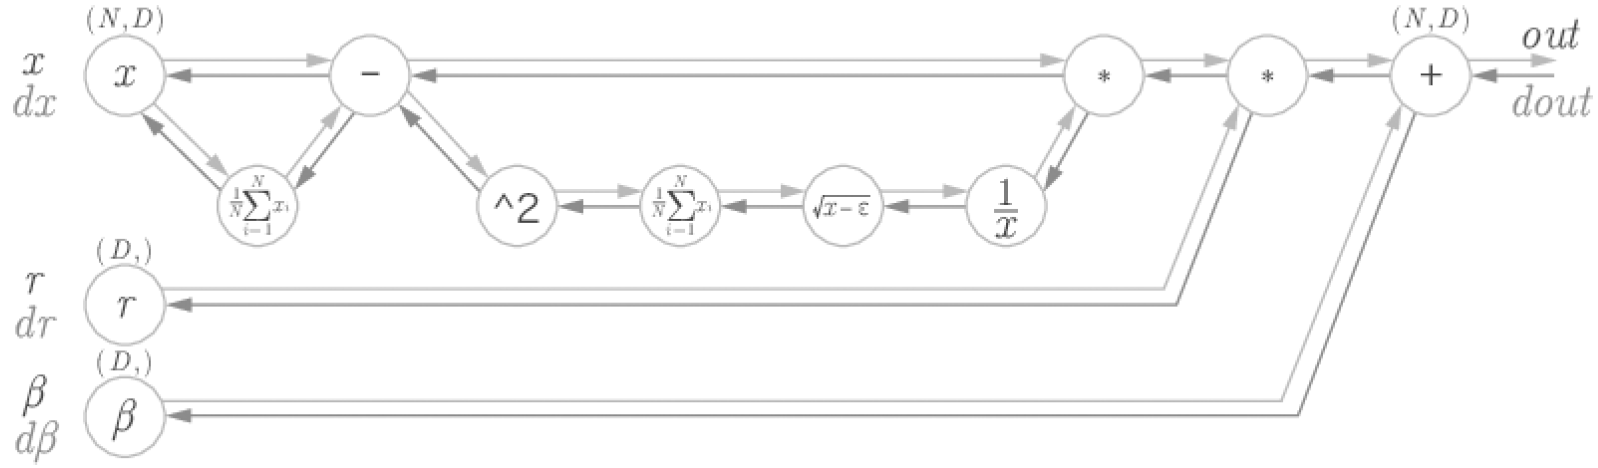

In [3]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-17.png')

$\textbf{SELF NOTE}$        
> 배치 정규화 원논문에서의 순전파와 역전파 과정은 다음과 같다.

#### $\textbf{Batch Normalization}$

   
$\textbf{Input}$      
- values of $x$ over a mini-batch : $\mathcal{B} = \{x_1, x_2, \ldots, x_m\}$
- parameters to be learned : $\gamma, \beta$

$\textbf{Output}$      
- $\{y_i = BN_{\gamma, \beta}(x_i)\}$

$\textbf{<Forwardpropagation>}$        
\begin{align*}
    \mu_B & \leftarrow \frac{1}{m} \displaystyle\sum_{i=1}^{m}x_i & \quad \quad // \text{mini-batch mean} \\
    \sigma^{2}_{B} & \leftarrow \frac{1}{m} \displaystyle\sum_{i=1}^{m}(x_i - \mu_B)^{2} & \quad \quad // \text{mini-batch variance} \\
    \hat{x}_i & \leftarrow \cfrac{x_i - \mu_B}{\sqrt{\sigma^{2}_{B} + \epsilon}} & \quad \quad // \text{normalize} \\
    y_{i} & \leftarrow \gamma \hat{x}_i + \beta \equiv BN_{\gamma,\beta}(x_i) & \quad \quad // \text{scale and shift}
\end{align*}

$\textbf{<Backpropagation>}$
\begin{align*}
    \frac{\partial L}{\partial \hat{x}_i} & = \left( \frac{\partial L}{\partial y_i} \right) \left( \frac{\partial y_i}{\partial \hat{x}_i} \right) =  \left( \frac{\partial L}{\partial y_i} \right) \cdot \gamma \\
    \frac{\partial L}{\partial \sigma^{2}_{B}} & = \displaystyle\sum_{i=1}^{m} \left( \frac{\partial L}{\partial \hat{x}_i} \right) \left( \frac{\partial \hat{x}_i}{\partial \sigma^{2}_{B}} \right) \\
    & = \displaystyle\sum_{i=1}^{m} \left( \frac{\partial L}{\partial \hat{x}_i} \right) \cdot (x_i - \mu_B) \cdot (\sigma^{2}_B + \epsilon)^{-\tfrac{3}{2}} \cdot (-\frac{1}{2}) \\
    \frac{\partial L}{\partial \mu_{B}} & = \left[ \displaystyle\sum_{i=1}^{m} \left( \frac{\partial L}{\partial \hat{x}_i} \right) \left( \frac{\partial \hat{x}_i}{\partial \mu_B} \right) \right] + \left[ \left( \frac{\partial L}{\partial \sigma^{2}_B} \right) \left( \frac{\partial \sigma^{2}_{B}}{\partial \mu_B} \right) \right] \\
    & = \left[ \displaystyle\sum_{i=1}^{m} \left( \frac{\partial L}{\partial \hat{x}_i} \right) \cdot \left(- \frac{1}{\sqrt{\sigma^{2}_{B} + \epsilon}}\right) \right] + \left[ \left( \frac{\partial L}{\partial \sigma^{2}_B} \right) \cdot \left( - \frac{2}{m} \displaystyle\sum_{i=1}^{m} (x_i - \mu_B) \right) \right] \\
    \frac{\partial L}{\partial x_i} & = \left( \frac{\partial L}{\partial \hat{x}_i} \right) \left( \frac{\partial \hat{x}_i}{\partial x_i} \right) + \left( \frac{\partial L}{\partial \sigma^{2}_B} \right) \left( \frac{\partial \sigma^{2}_B}{\partial x_i} \right) + \left( \frac{\partial L}{\partial \mu_B} \right) \left( \frac{\partial \mu_B}{\partial x_i} \right) \\
    & = \left( \frac{\partial L}{\partial \hat{x}_i} \right) \left( \cfrac{1}{\sqrt{\sigma^{2}_B + \epsilon} }\right)    +    \left( \frac{\partial L}{\partial \sigma^{2}_B} \right) \left( \cfrac{2(x_i - \mu_B)}{m} \right)     +     \left( \frac{\partial L}{\partial \mu_B} \right) \left( \frac{1}{m}\right) \\
    \frac{\partial L}{\partial \gamma} & = \displaystyle\sum_{i=1}^{m} \left( \frac{\partial L}{\partial y_i} \right) \left( \frac{\partial y_i}{\partial \gamma} \right) = \displaystyle\sum_{i=1}^{m} \left( \frac{\partial L}{\partial y_i} \right) \cdot \hat{x}_i \\
    \frac{\partial L}{\partial \beta} & = \displaystyle\sum_{i=1}^{m} \left( \frac{\partial L}{\partial y_i} \right) \left( \frac{\partial y_i}{\partial \beta} \right) = \displaystyle\sum_{i=1}^{m} \left( \frac{\partial L}{\partial y_i} \right) \cdot 1 \\
\end{align*}


                
        

### 6.3.2 배치 정규화의 효과
그럼 배치 정규화 계층을 사용한 실험을 해보자. 우선은 MNIST 데이터셋을 사용하여 배치 정규화 계층을 사용할 때와 사용하지 않을 때의 학습 진도가 어떻게 달라지는지를 보자(소스 코드는 ch06/batch_norm_test.py에 있다). [그림6-18]이 그 결과이다.

#### [그림6-18] 배치 정규화의 효과 : 배치 정규화가 학습 속도를 높인다.

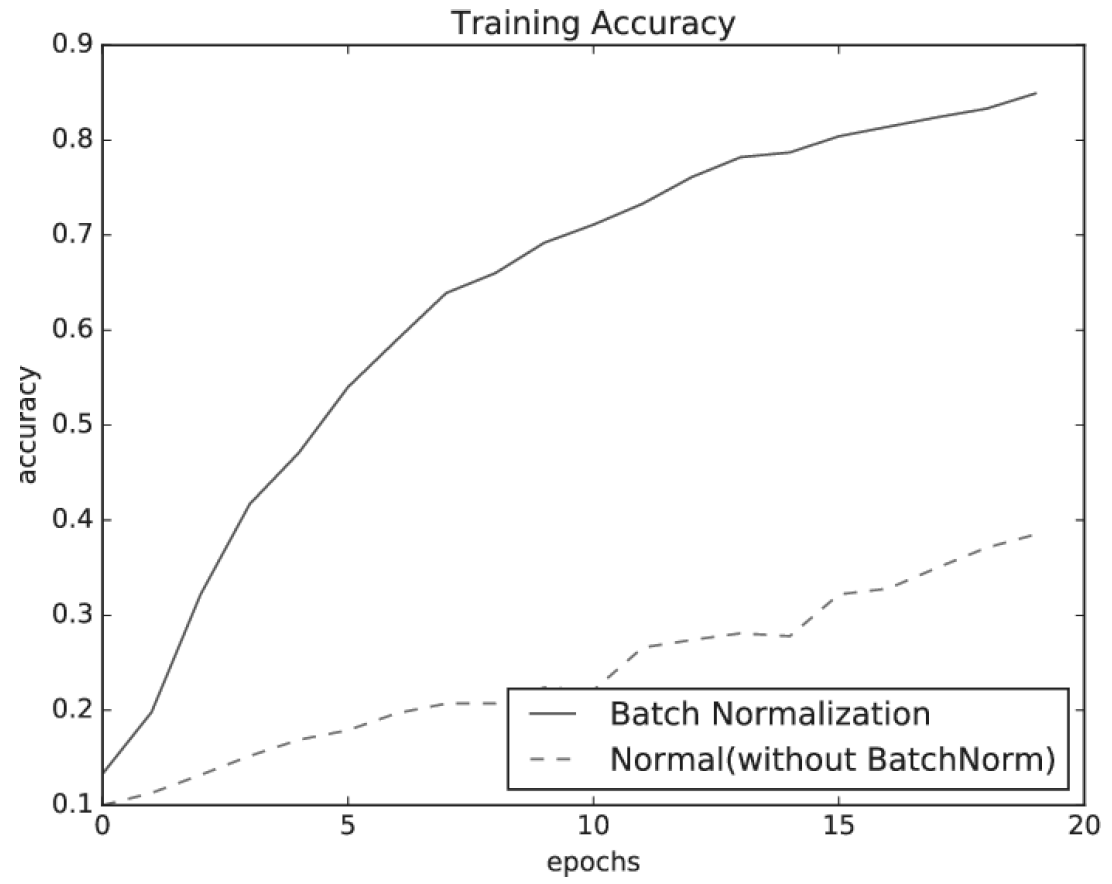

In [8]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-18.png')

[그림6-18]에서 보다시피 배치 정규화가 학습을 빨리 진전시키고 있음을 확인할 수 있다. 계쏙해서 초깃값 분포를 다양하게 주어가며 학습 진행이 어떻게 달라지는지 살펴보자. [그림6-19]는 가중치 초깃값의 표준편차를 다양하게 바꿔가며 학습 경과를 관찰한 그래프이다.

#### [그림6-19] 실선이 배치 정규화를 사용한 경우, 점선이 사용하지 않은 경우 : 가중치 초깃값의 표준편차는 각 그래프 위에 표기

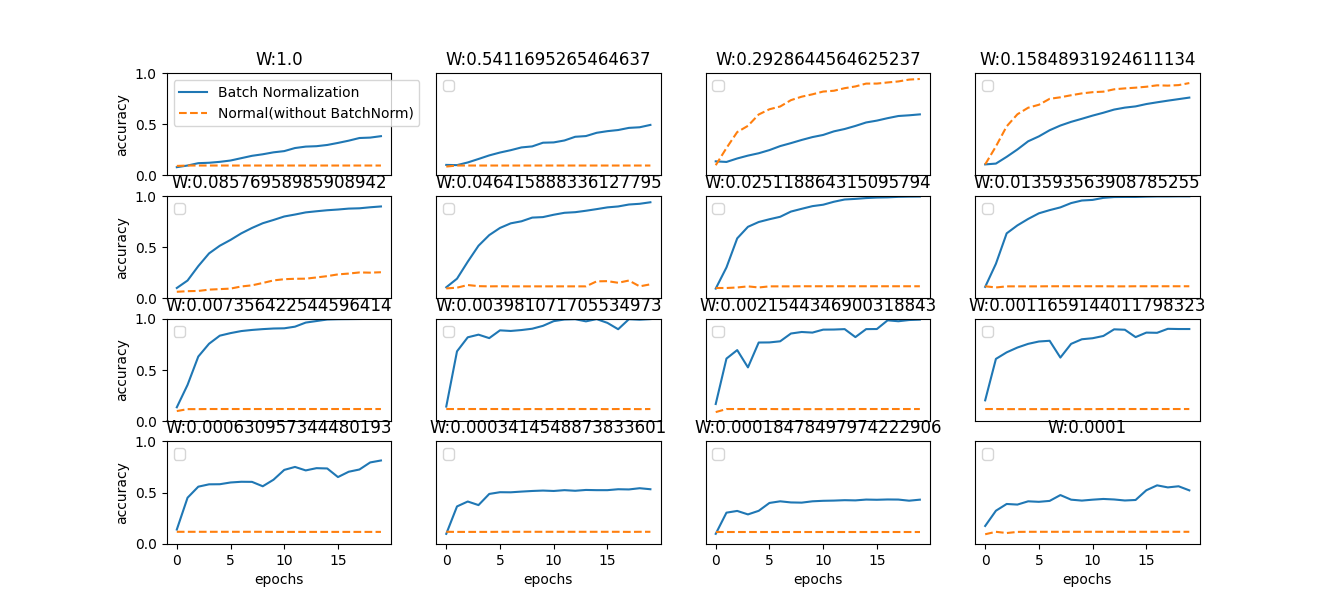

In [9]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\batch_norm_test\\sgd.png')

거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠른 것으로 나타난다. 실제로 배치 정규화를 이용하지 않는 경우엔 초깃값이 잘 분포되어 있지 않으면 학습이 전혀 진행되지 않는 모습도 확인할 수 있다.      

지금까지 살펴본 것처럼 배치 정규화를 사용하면 학습이 빨라지며, 가중치 초깃값에 크게 의존하지 않아도 된다. 배치 정규화는 이처럼 장점이 많으며 앞으로 다양한 분야에서 활약하게 됨을 짐작할 수 있다.

$\textbf{SELF NOTE}$        
> 배치 정규화도 마찬가지로 최적화 알고리즘이 무엇이냐에 따라 그 성능이 좌우된다. 앞선 예시의 경우 SGD를 최적화 알고리즘으로 사용하였다. 다음 사진들은 순서대로 Momentum, AdaGrad, RMSprop, Adam 최적화 알고리즘을 실험에 적용했을때의 사진들이다. 보다시피 초깃값도 매우 중요하게 작용함을 알 수 있다(특히 Momentum의 경우).

In [1]:
from PIL import Image

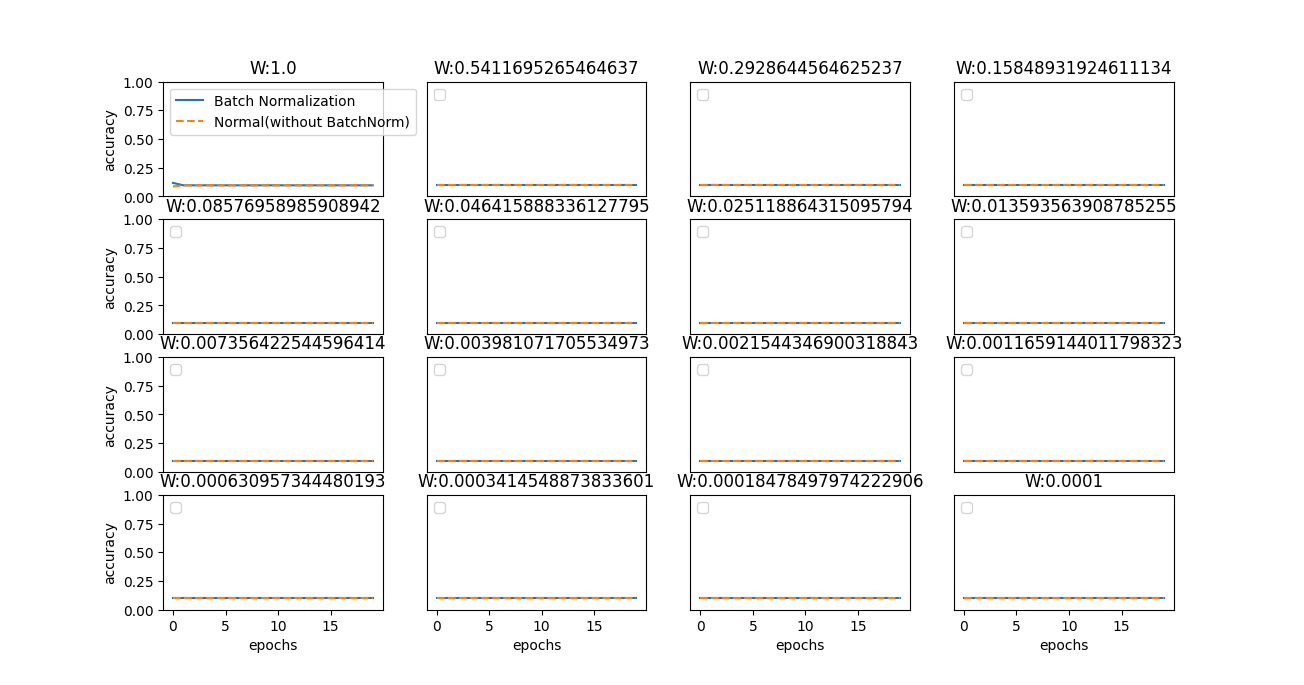

In [2]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\batch_norm_test\\momentum.png')

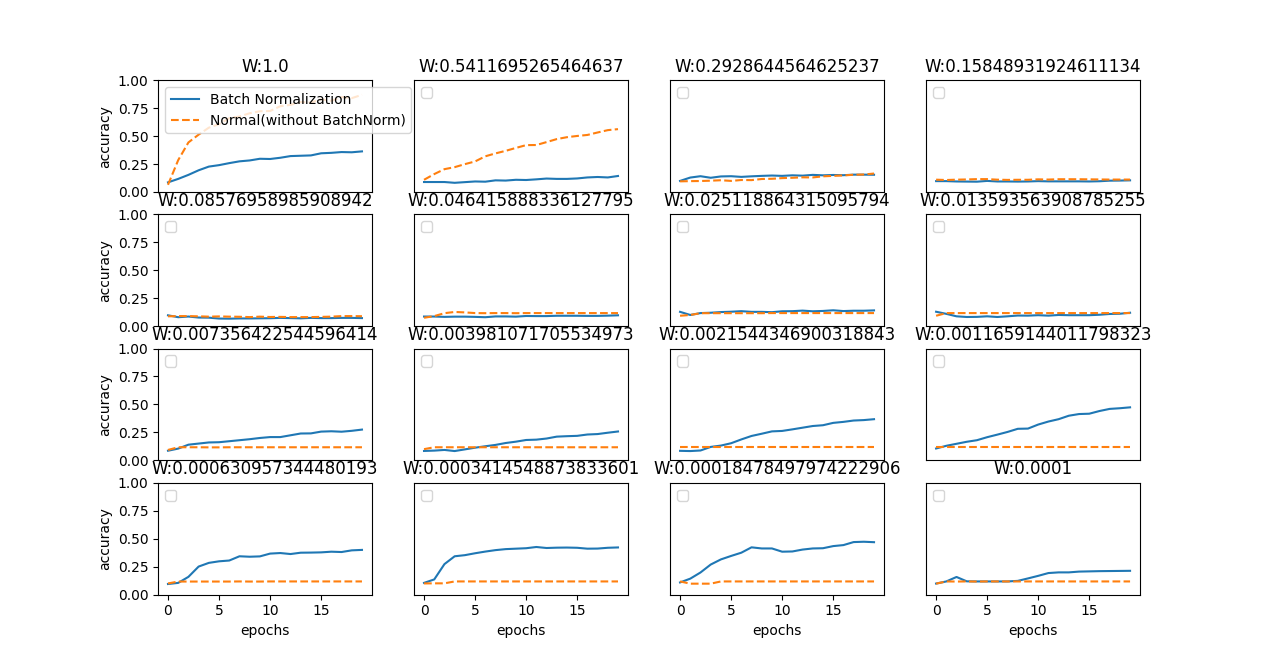

In [3]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\batch_norm_test\\adagrad.png')

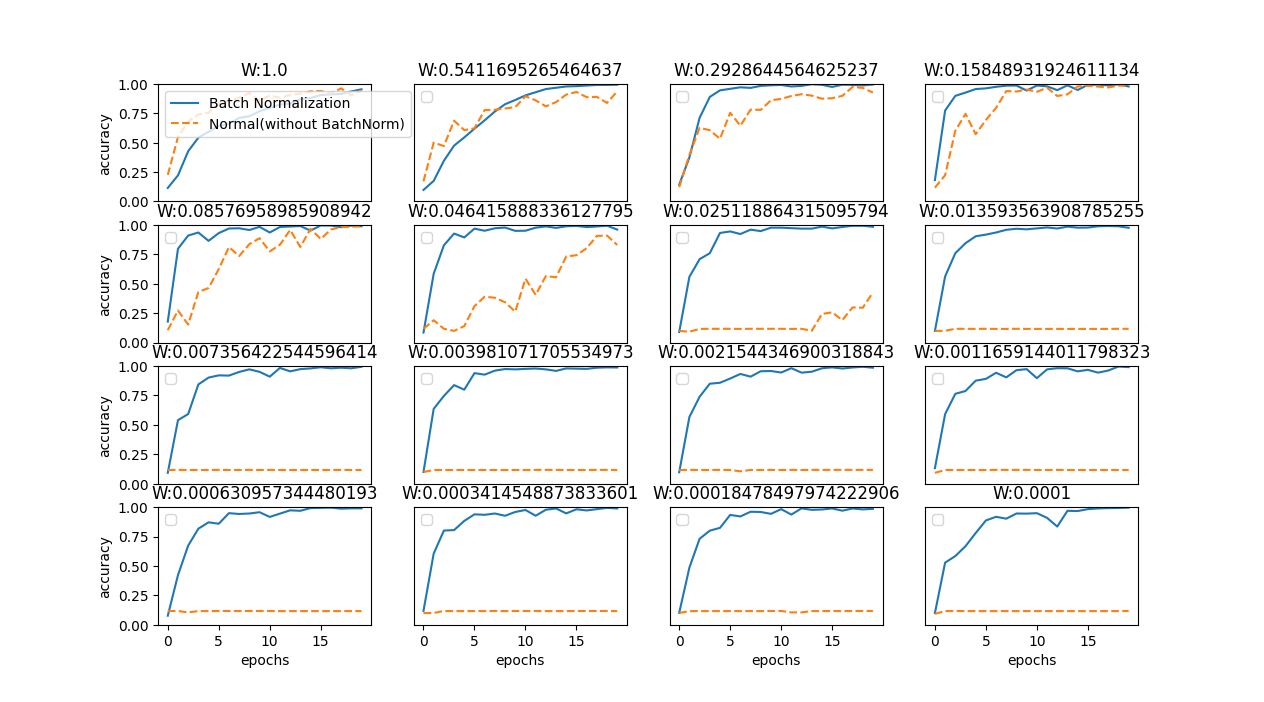

In [4]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\batch_norm_test\\rmsprop.png')

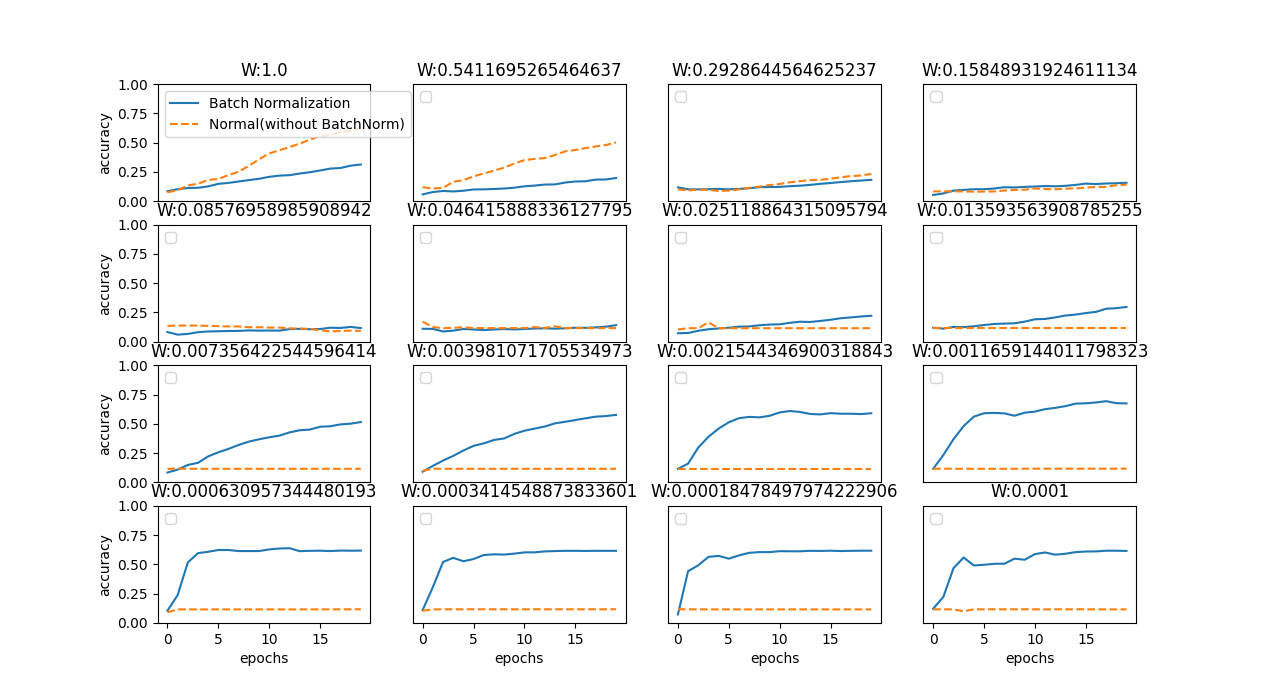

In [5]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\batch_norm_test\\adam.png')

## 6.4 바른 학습을 위해
기계학습에서는 $\small \textbf{과적합}$이 문제가 되는 일이 많다. 과적합이란 모델이 훈련 데이터에만 지나치게 적합되어 그 외의 데이터에 대해서는 제대로 대응하지 못하는 상태를 말한다. 기계학습은 범용 성능을 지향한다. 훈련 데이터에는 포함되지 않는, 아직 보지 못한 데이터가 주어져도 바르게 식별해내는 모델이 바람직하다. 복잡하고 표현력이 높은 모델을 만들 수는 있지만, 그만큼 과적합을 억제하는 기술이 중요해지는 것이다.

### 6.4.1 과적합
과적합은 주로 다음의 두 경우에 일어난다.
- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음

이번 절에서는 이 두 요건을 일부러 충족하여 과적합을 일으켜보고자 한다. 그러기 위해 본래 60,000개인 MNIST 데이터셋의 훈련 데이터 중 300개만 사용하고, 7층 네트워크를 사용하여 네트워크의 복잡성을 높이도록 한다. 각 층의 뉴런은 100개, 활성화 함수는 ReLU를 사용한다.        

여기에서는 실험에 필요한 코드를 발췌해 설명하고자 한다(전체 파일은 ch06/overfit_weight_decay.py이다).

#### [그림6-20] 훈련 데이터(train)와 시험 데이터(test)의 에폭별 정확도 추이 (SGD)

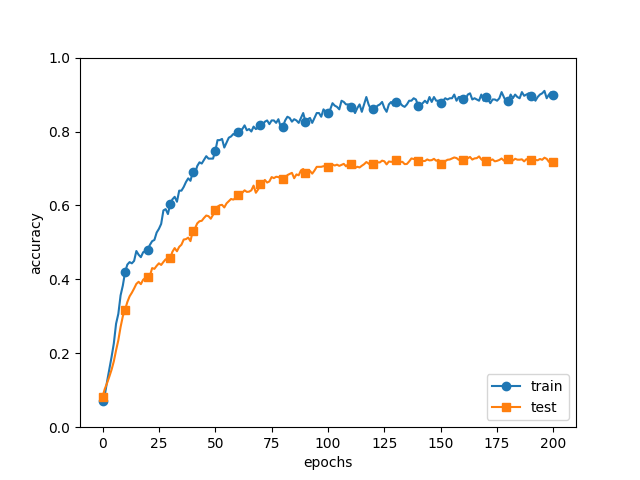

In [6]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\overfit_weight_decay\\sgd.png')

훈련 데이터를 사용하여 측정한 정확도는 100 에폭을 지나는 무렵부터 거의 100%이다. 그러나 시험 데이터에 대해서는 큰 차이를 보인다. 이처럼 정확도가 크게 벌어지는 것은 훈련 데이터에만 $\small \text{적합}^{\text{fitting}}$해버린 결과이다. 훈련 때 사용하지 않은 범용 데이터(시험 데이터)에는 제대로 대응하지 못하는 것을 이 그래프에서 확인할 수 있다.

$\textbf{SELF NOTE}$        
> 마찬가지로 다른 최적화 알고리즘들에 대해 실험을 진행한 결과는 다음과 같다. 순서대로 Momentum, AdaGrad, RMSprop, Adam이다.

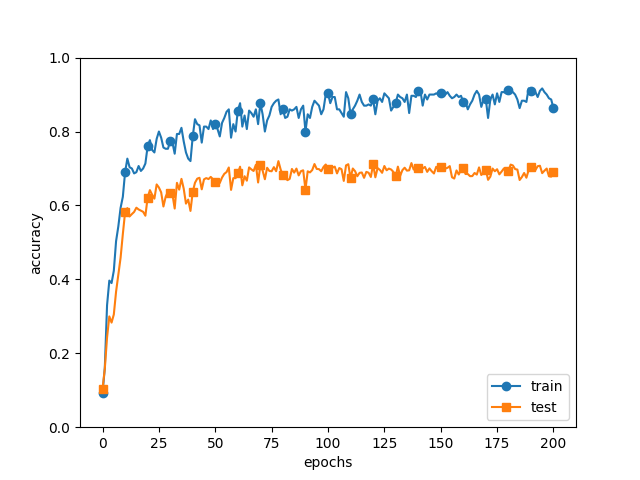

In [11]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\overfit_weight_decay\\momentum.png')

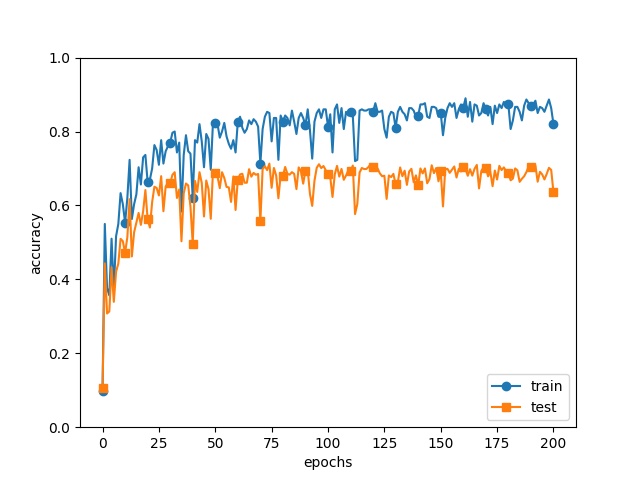

In [8]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\overfit_weight_decay\\adagrad.png')

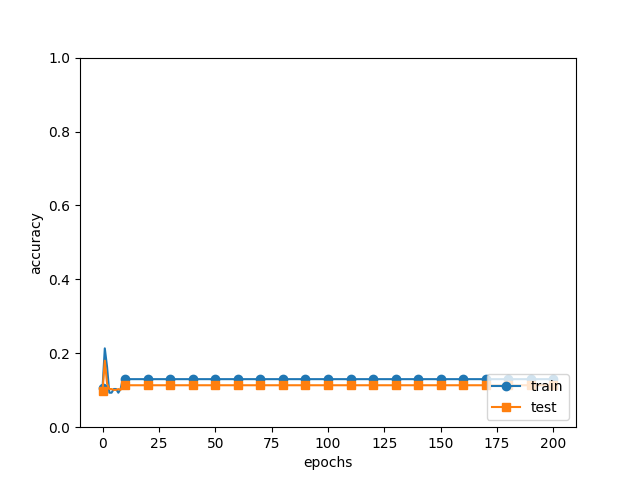

In [9]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\overfit_weight_decay\\rmsprop.png')

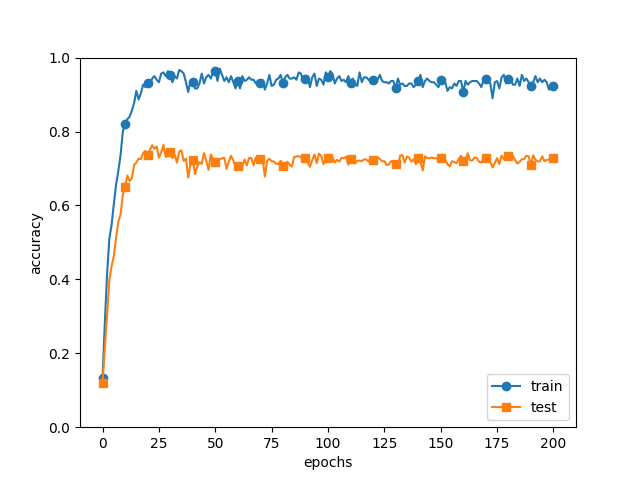

In [10]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\overfit_weight_decay\\adam.png')

### 6.4.2 가중치 감소
과적합 억제용으로 예로부터 많이 이용해온 방법 중 $\small \textbf{가중치 감소}^{\text{weight decay}}$라는 것이 있다. 이는 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 과적합을 억제하는 방법이다. 과적합은 대부분의 경우 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문이다.        

자, 복습해보자. 신경망 학습의 목적은 손실 함수의 값을 줄이는 것이다. 이때, 예를 들어 가중치의 제곱 $\small \text{노름}^{\text{norm}}$($L_2$노름)을 손실 함수에 더한다. 그러면 가중치가 커지는 것을 억제할 수 있다. 가중치를 $\mathbf{W}$라고 하면 $L_2$노름에 따른 가중치 감소는 $\small \frac{1}{2}\lambda ||\mathbf{W}||^{2}$이 되고, 이 $\small \frac{1}{2}\lambda ||\mathbf{W}||^{2}$을 손실 함수에 더한다. 여기에서 $\lambda^{\text{람다}}$는 정칙화의 세기를 조절하는 하이퍼파라미터이다. $\lambda$를 크게 설정할수록 가중치에 대한 페널티가 커진다. 또 $\small \frac{1}{2}\lambda ||\mathbf{W}||^{2}$의 앞쪽 $\small \frac{1}{2}$은 $\small \frac{1}{2}\lambda ||\mathbf{W}||^{2}$의 미분 결과인 $\lambda \mathbf{W}$를 조정하는 역할의 상수이다.

가중치 감소는 모든 가중치의 각각의 손실 함수에 $\small \frac{1}{2}\lambda ||\mathbf{W}||^{2}$을 더한다. 따라서 가중치의 기울기를 구하는 계산에서는 그동안의 오차역전파법에 따른 결과에 정칙화 항을 미분한 $\lambda \mathbf{W}$를 더한다.

$\textbf{NOTE}$     
> $L_{2}$ 노름은 각 원소의 제곱들을 더한 것에 해당한다. 가중치 $\mathbf{W} = (w_1,w_2, \ldots, w_n)$이 있다면, $L_{2}$ 노름에서는 $\sqrt{w^{2}_1 + w^{2}_2 + \cdots + w^{2}_n}$ 으로 계산가능하다. $L_{2}$ 노름 외에 $L_{1}$ 노름과 $L_{\infty}$ 노름도 존재한다. $L_{1}$ 노름은 절댓값의 합, 즉 $|w_1| + |w_2| + \cdots + |w_n|$ 에 해당한다. $L_{\infty}$ 노름은 Sup 노름(혹은 Max 노름)이라고도 하며, 각 원소의 절댓값 중 가장 큰 것에 해당한다. 정규화 항으로 $L_{2}$ 노름, $L_{1}$ 노름, $L_{\infty}$ 노름 중 어떤것도 사용가능하다. 각자 특징이 있는데, 이 책에서는 일반적으로 자주 쓰는 $L_{2}$ 노름만 구현한다.

그럼 실험을 해보자. 방금 수행한 실험에서 $\lambda = 0,0.01,0.1,1$로 가중치 감소를 적용한다. 그동안의 실험과 마찬가지로 SGD,Momentum, AdaGrad, RMSprop, Adam등의 최적화 알고리즘 모두에 대하여 실험을 진행하도록 하였으며 추가적으로 $L_1$ 정칙화에 대해서도 실험을 진행하였다.  결과는 [그림6-21]과 같다(가중치 감소를 적용한 네트워크는 common/multi_layer_net.py에, 실험용 코드는 ch06/overfit_weight_decay_test.py에 있다).

#### [그림6-21] 가중치 감소를 이용한 훈련 데이터(train)와 시험 데이터(test)에 대한 정확도 추이 - $L_{1}$ Regularization

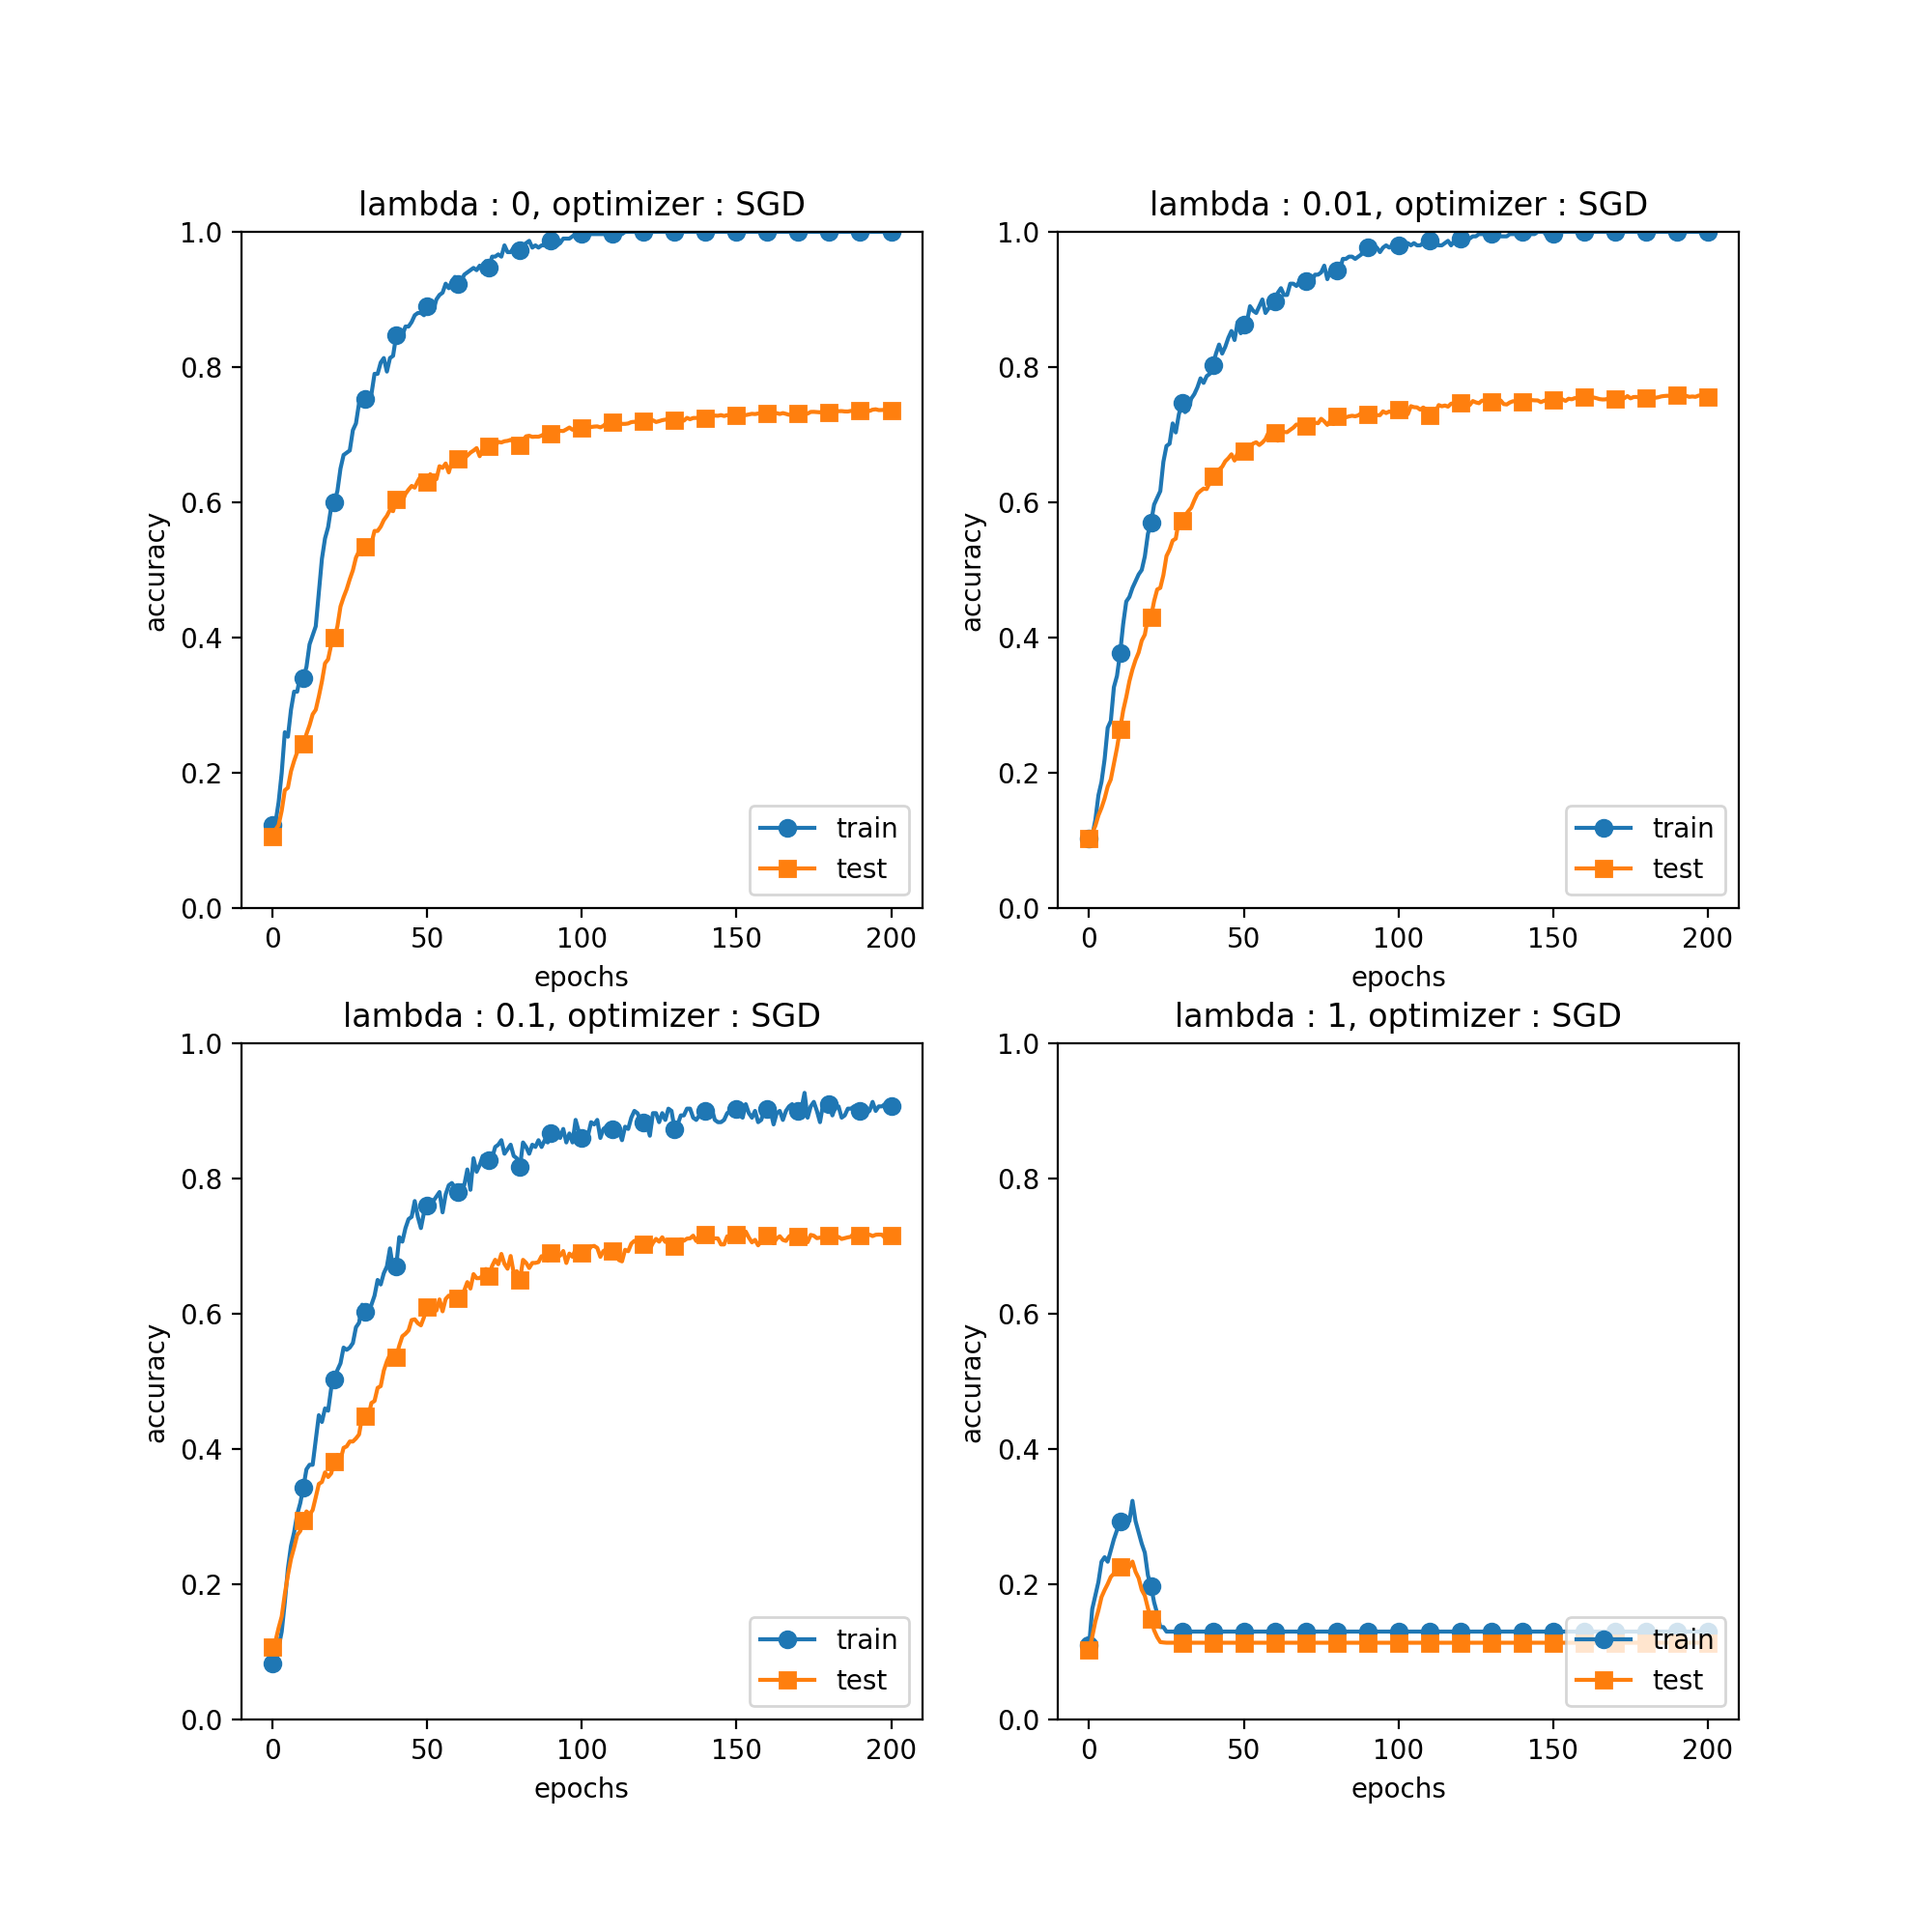

In [3]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_decay_test_L2penalization\\SGD_weight_decay_test.png')

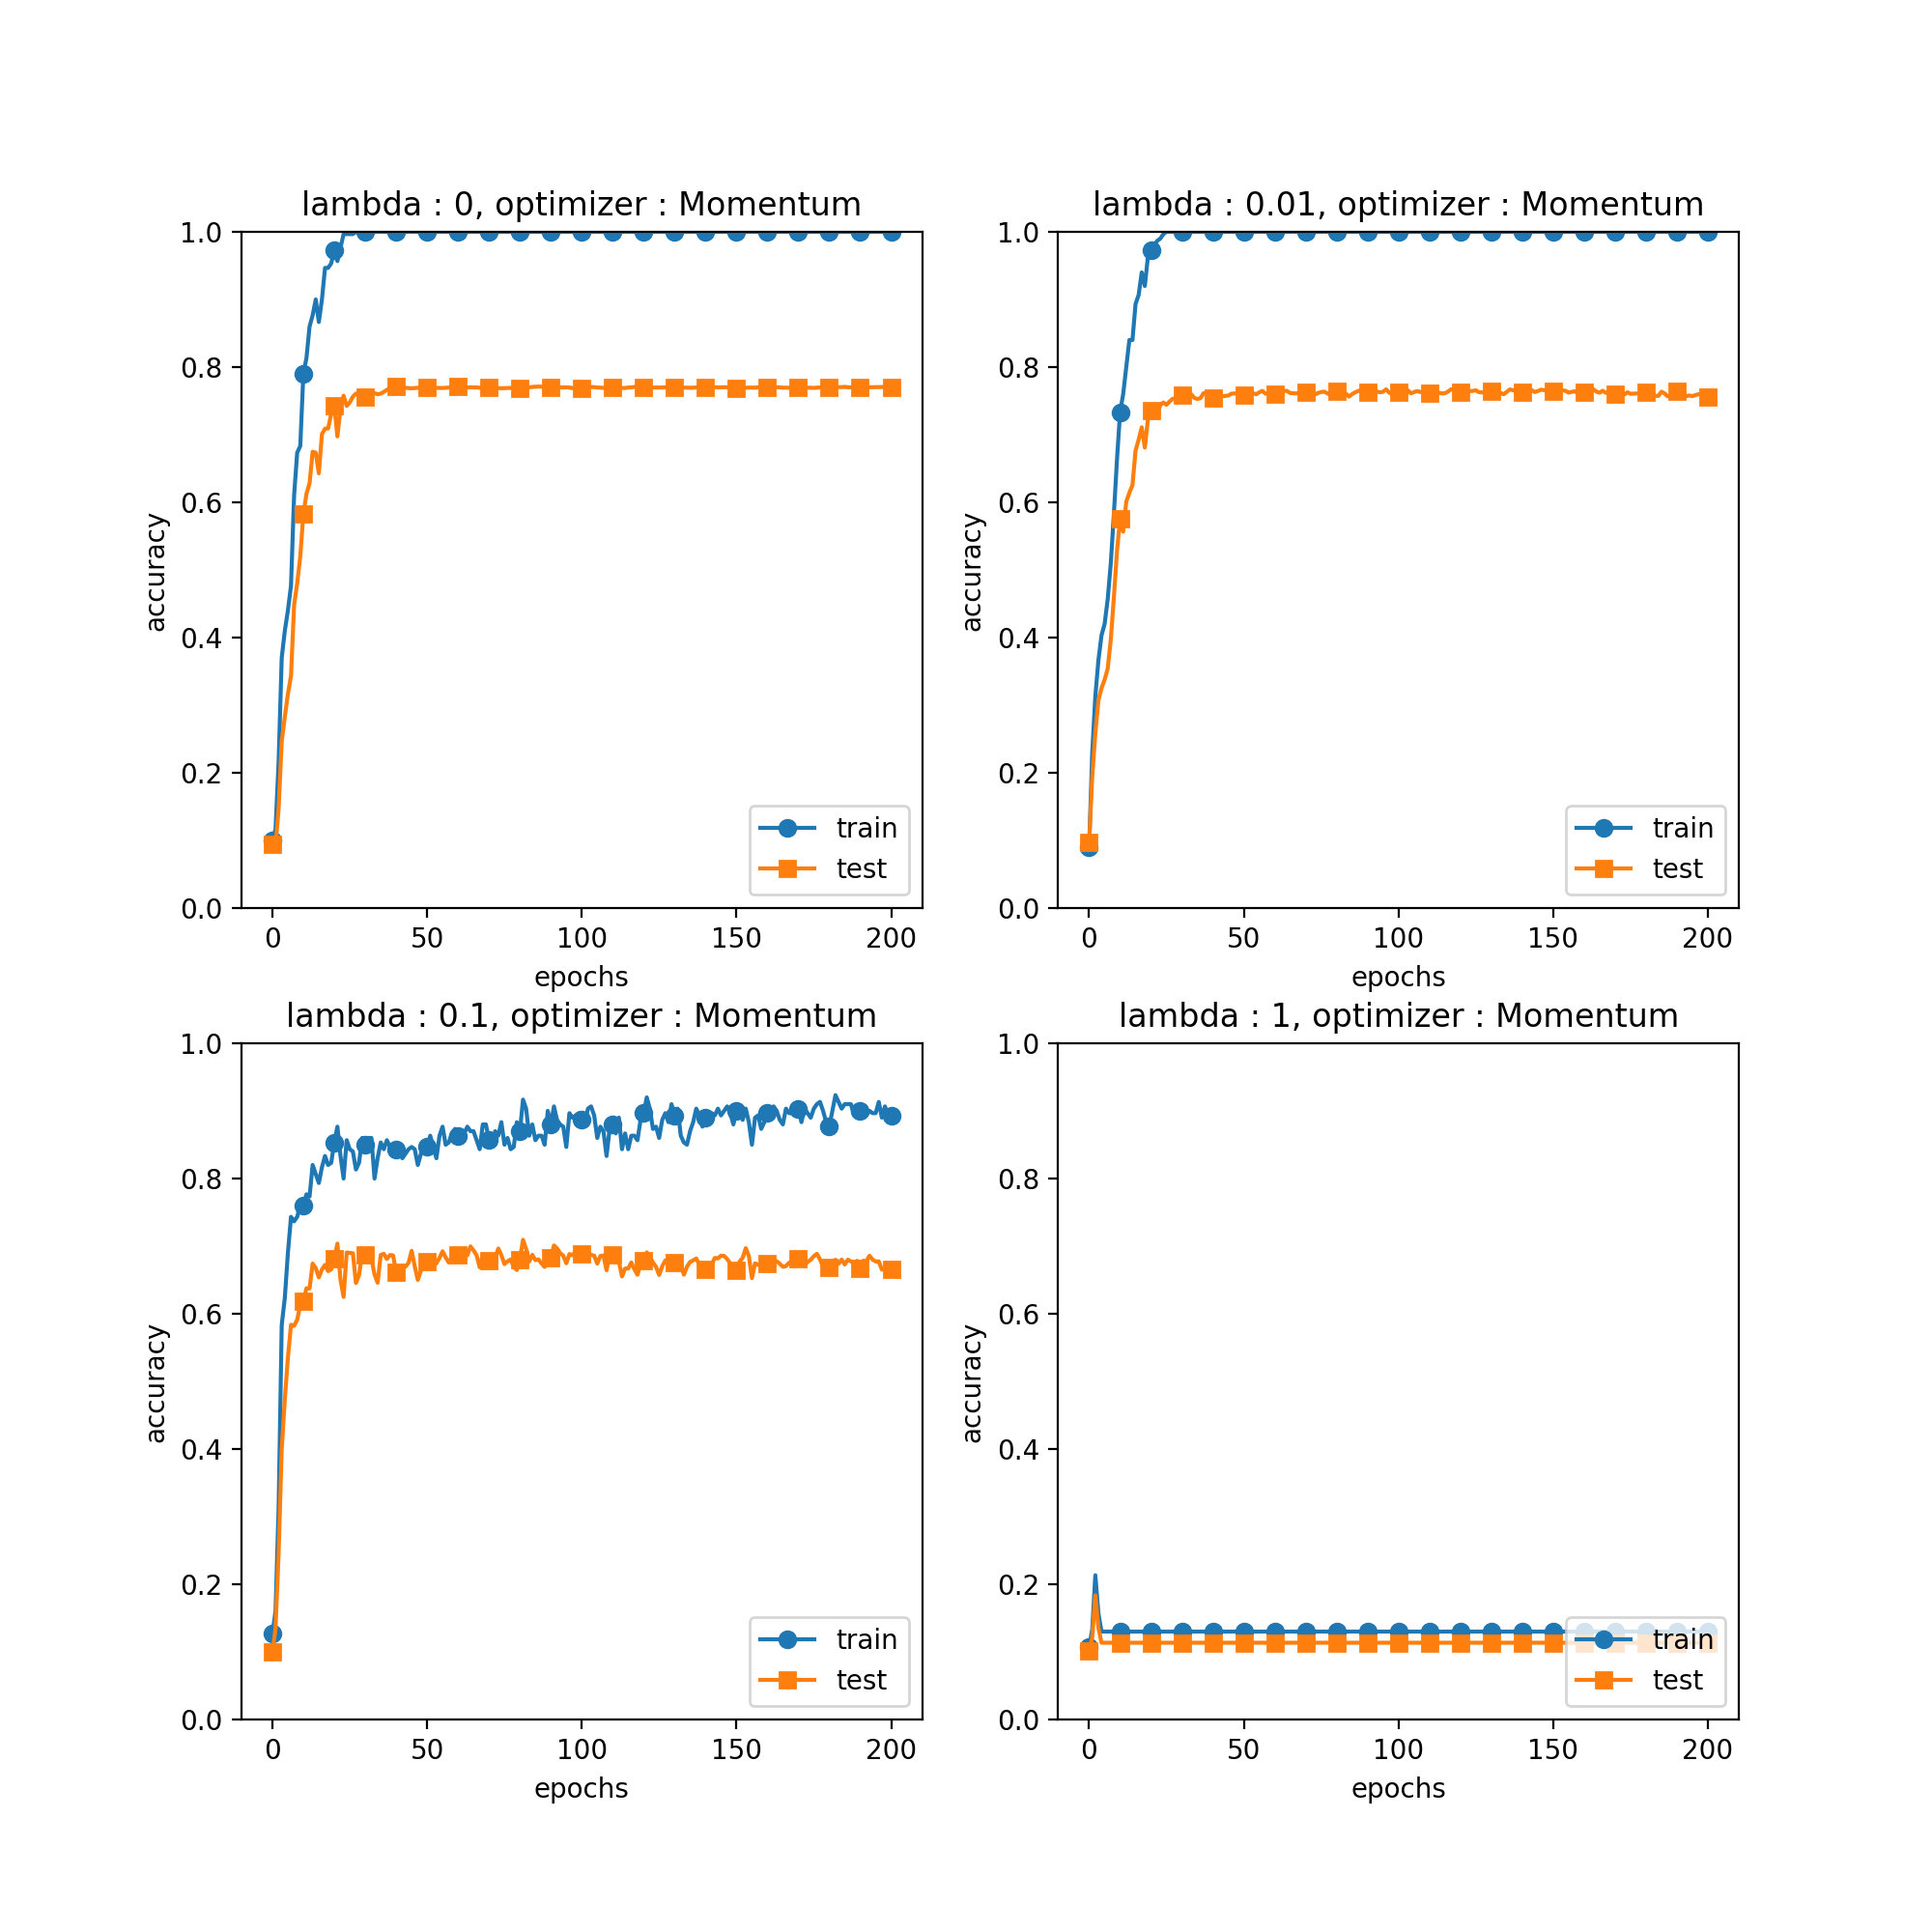

In [4]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_decay_test_L2penalization\\Momentum_weight_decay_test.png')

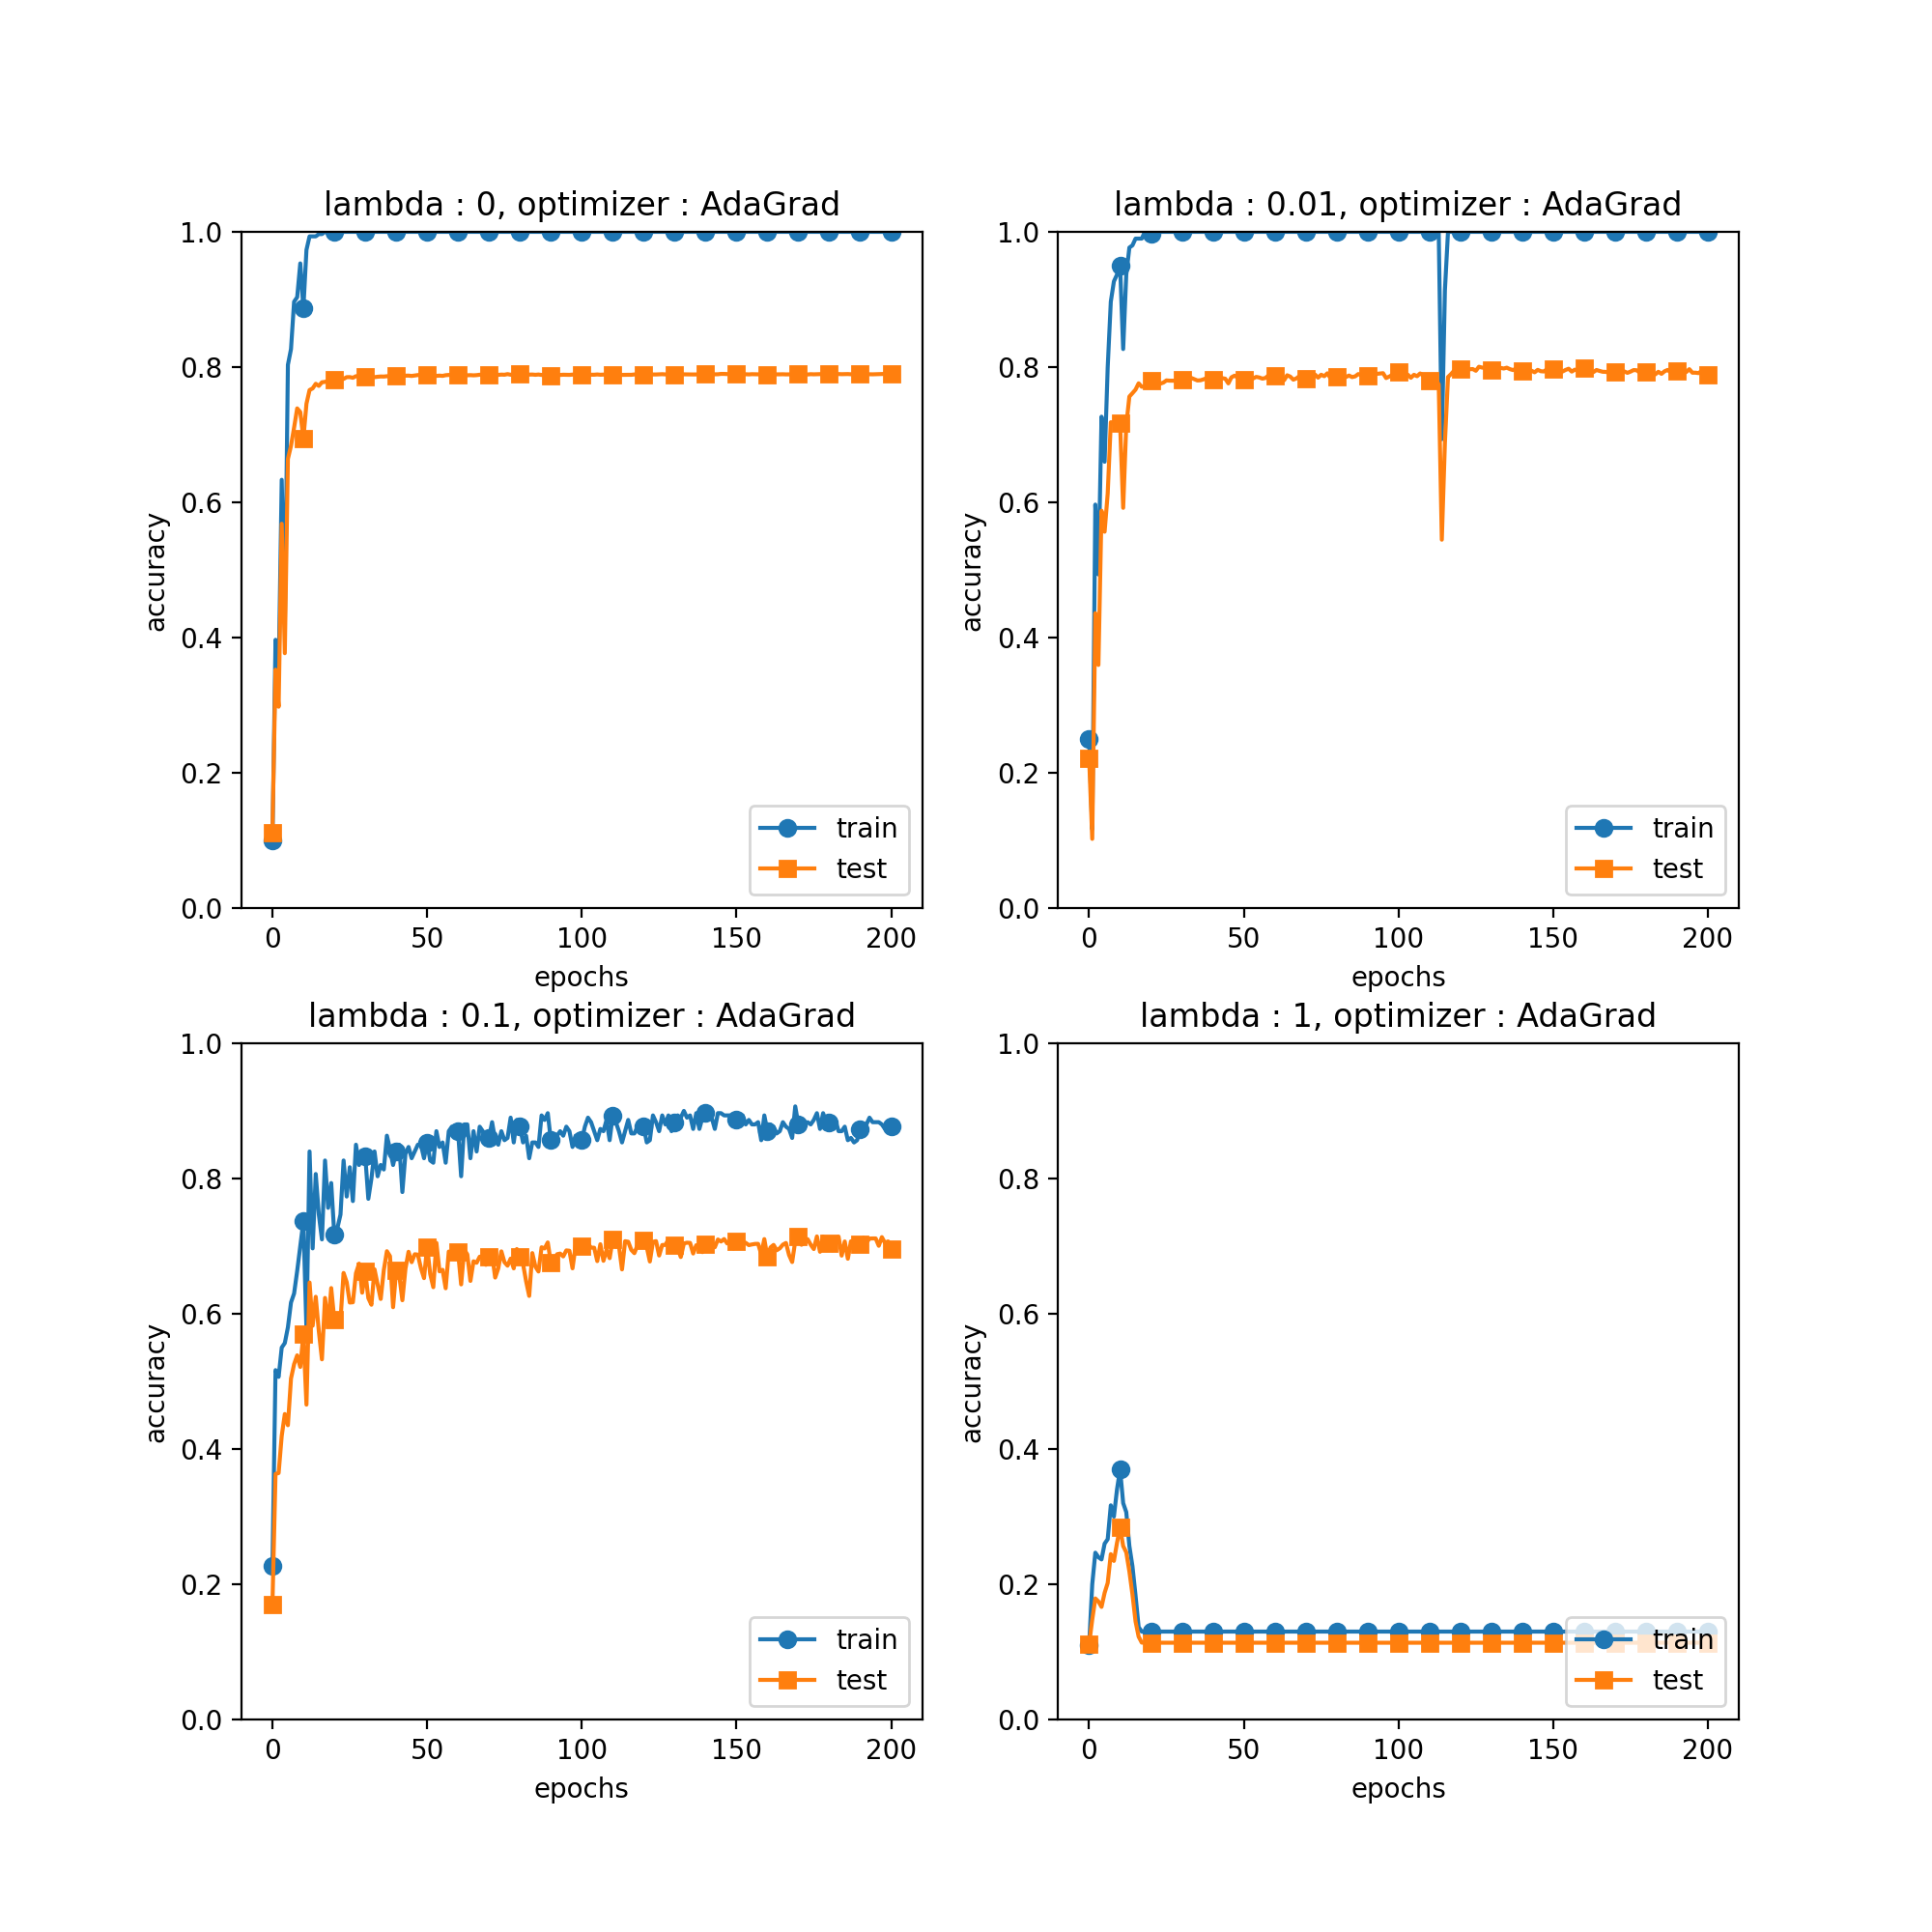

In [5]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_decay_test_L2penalization\\AdaGrad_weight_decay_test.png')

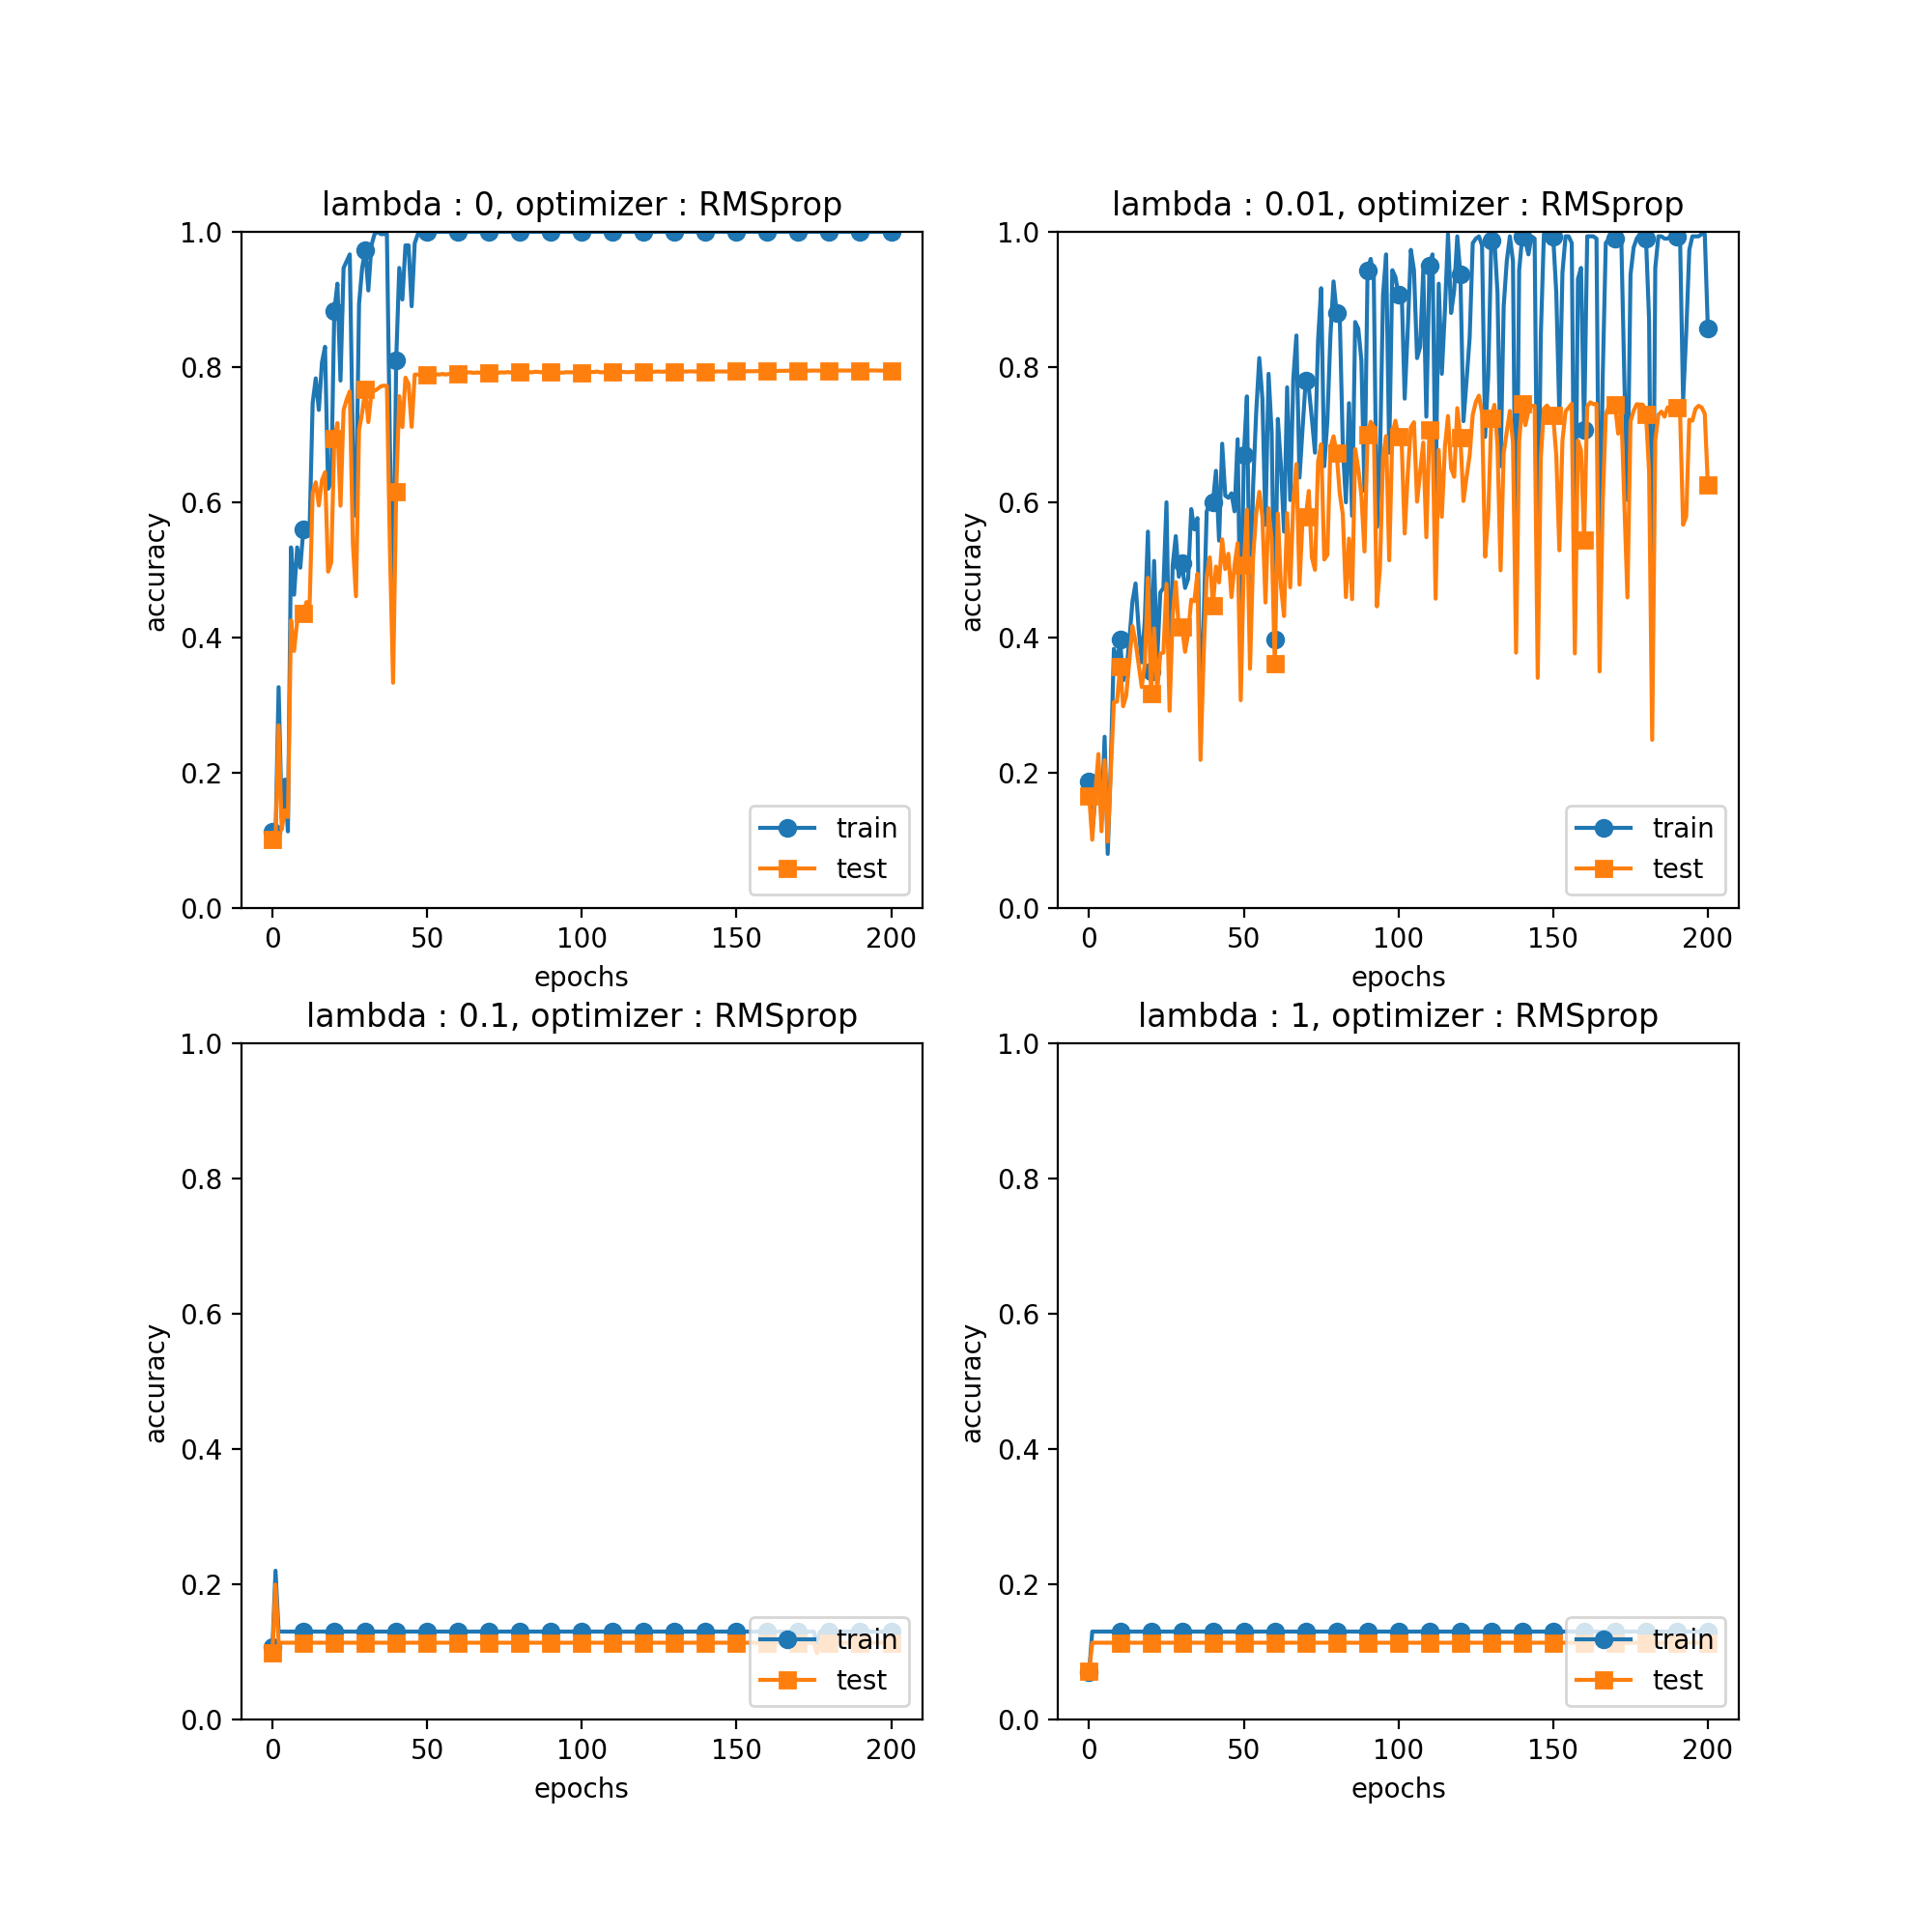

In [6]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_decay_test_L2penalization\\RMSprop_weight_decay_test.png')

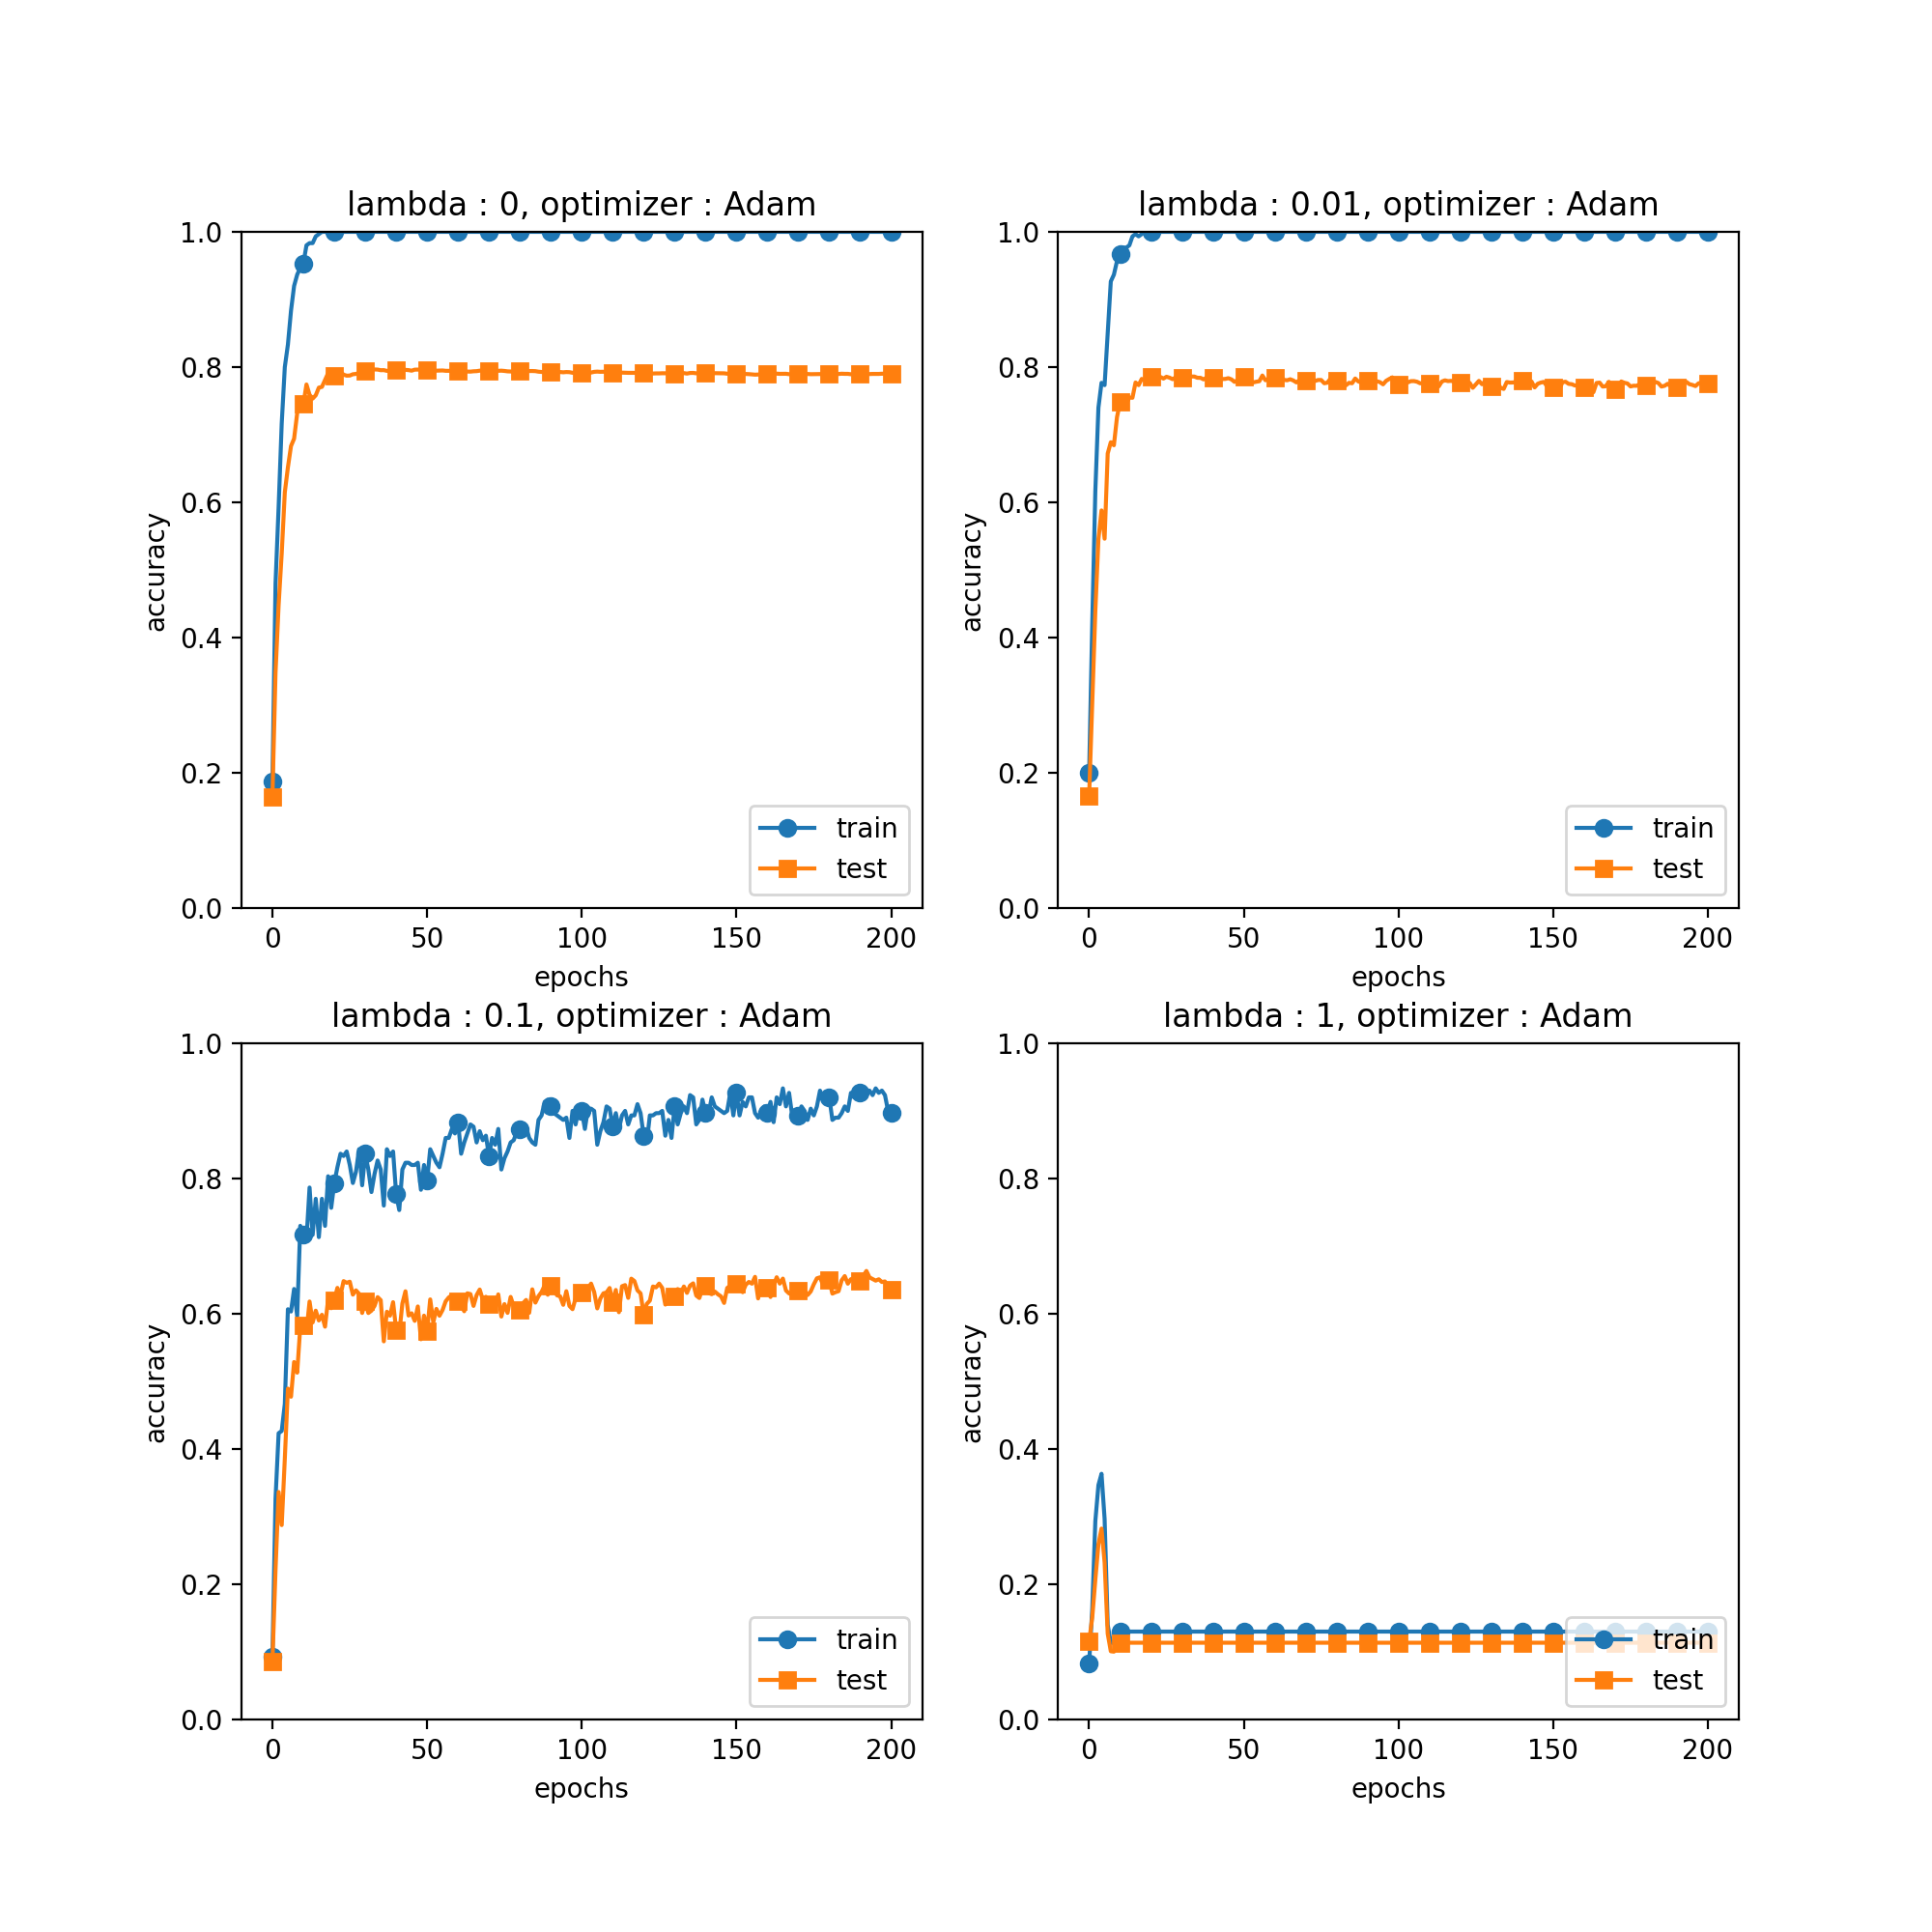

In [7]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_decay_test_L2penalization\\Adam_weight_decay_test.png')

#### [그림6-21(2)] 가중치 감소를 이용한 훈련 데이터(train)와 시험 데이터(test)에 대한 정확도 추이 - $L_{1}$ Regularization

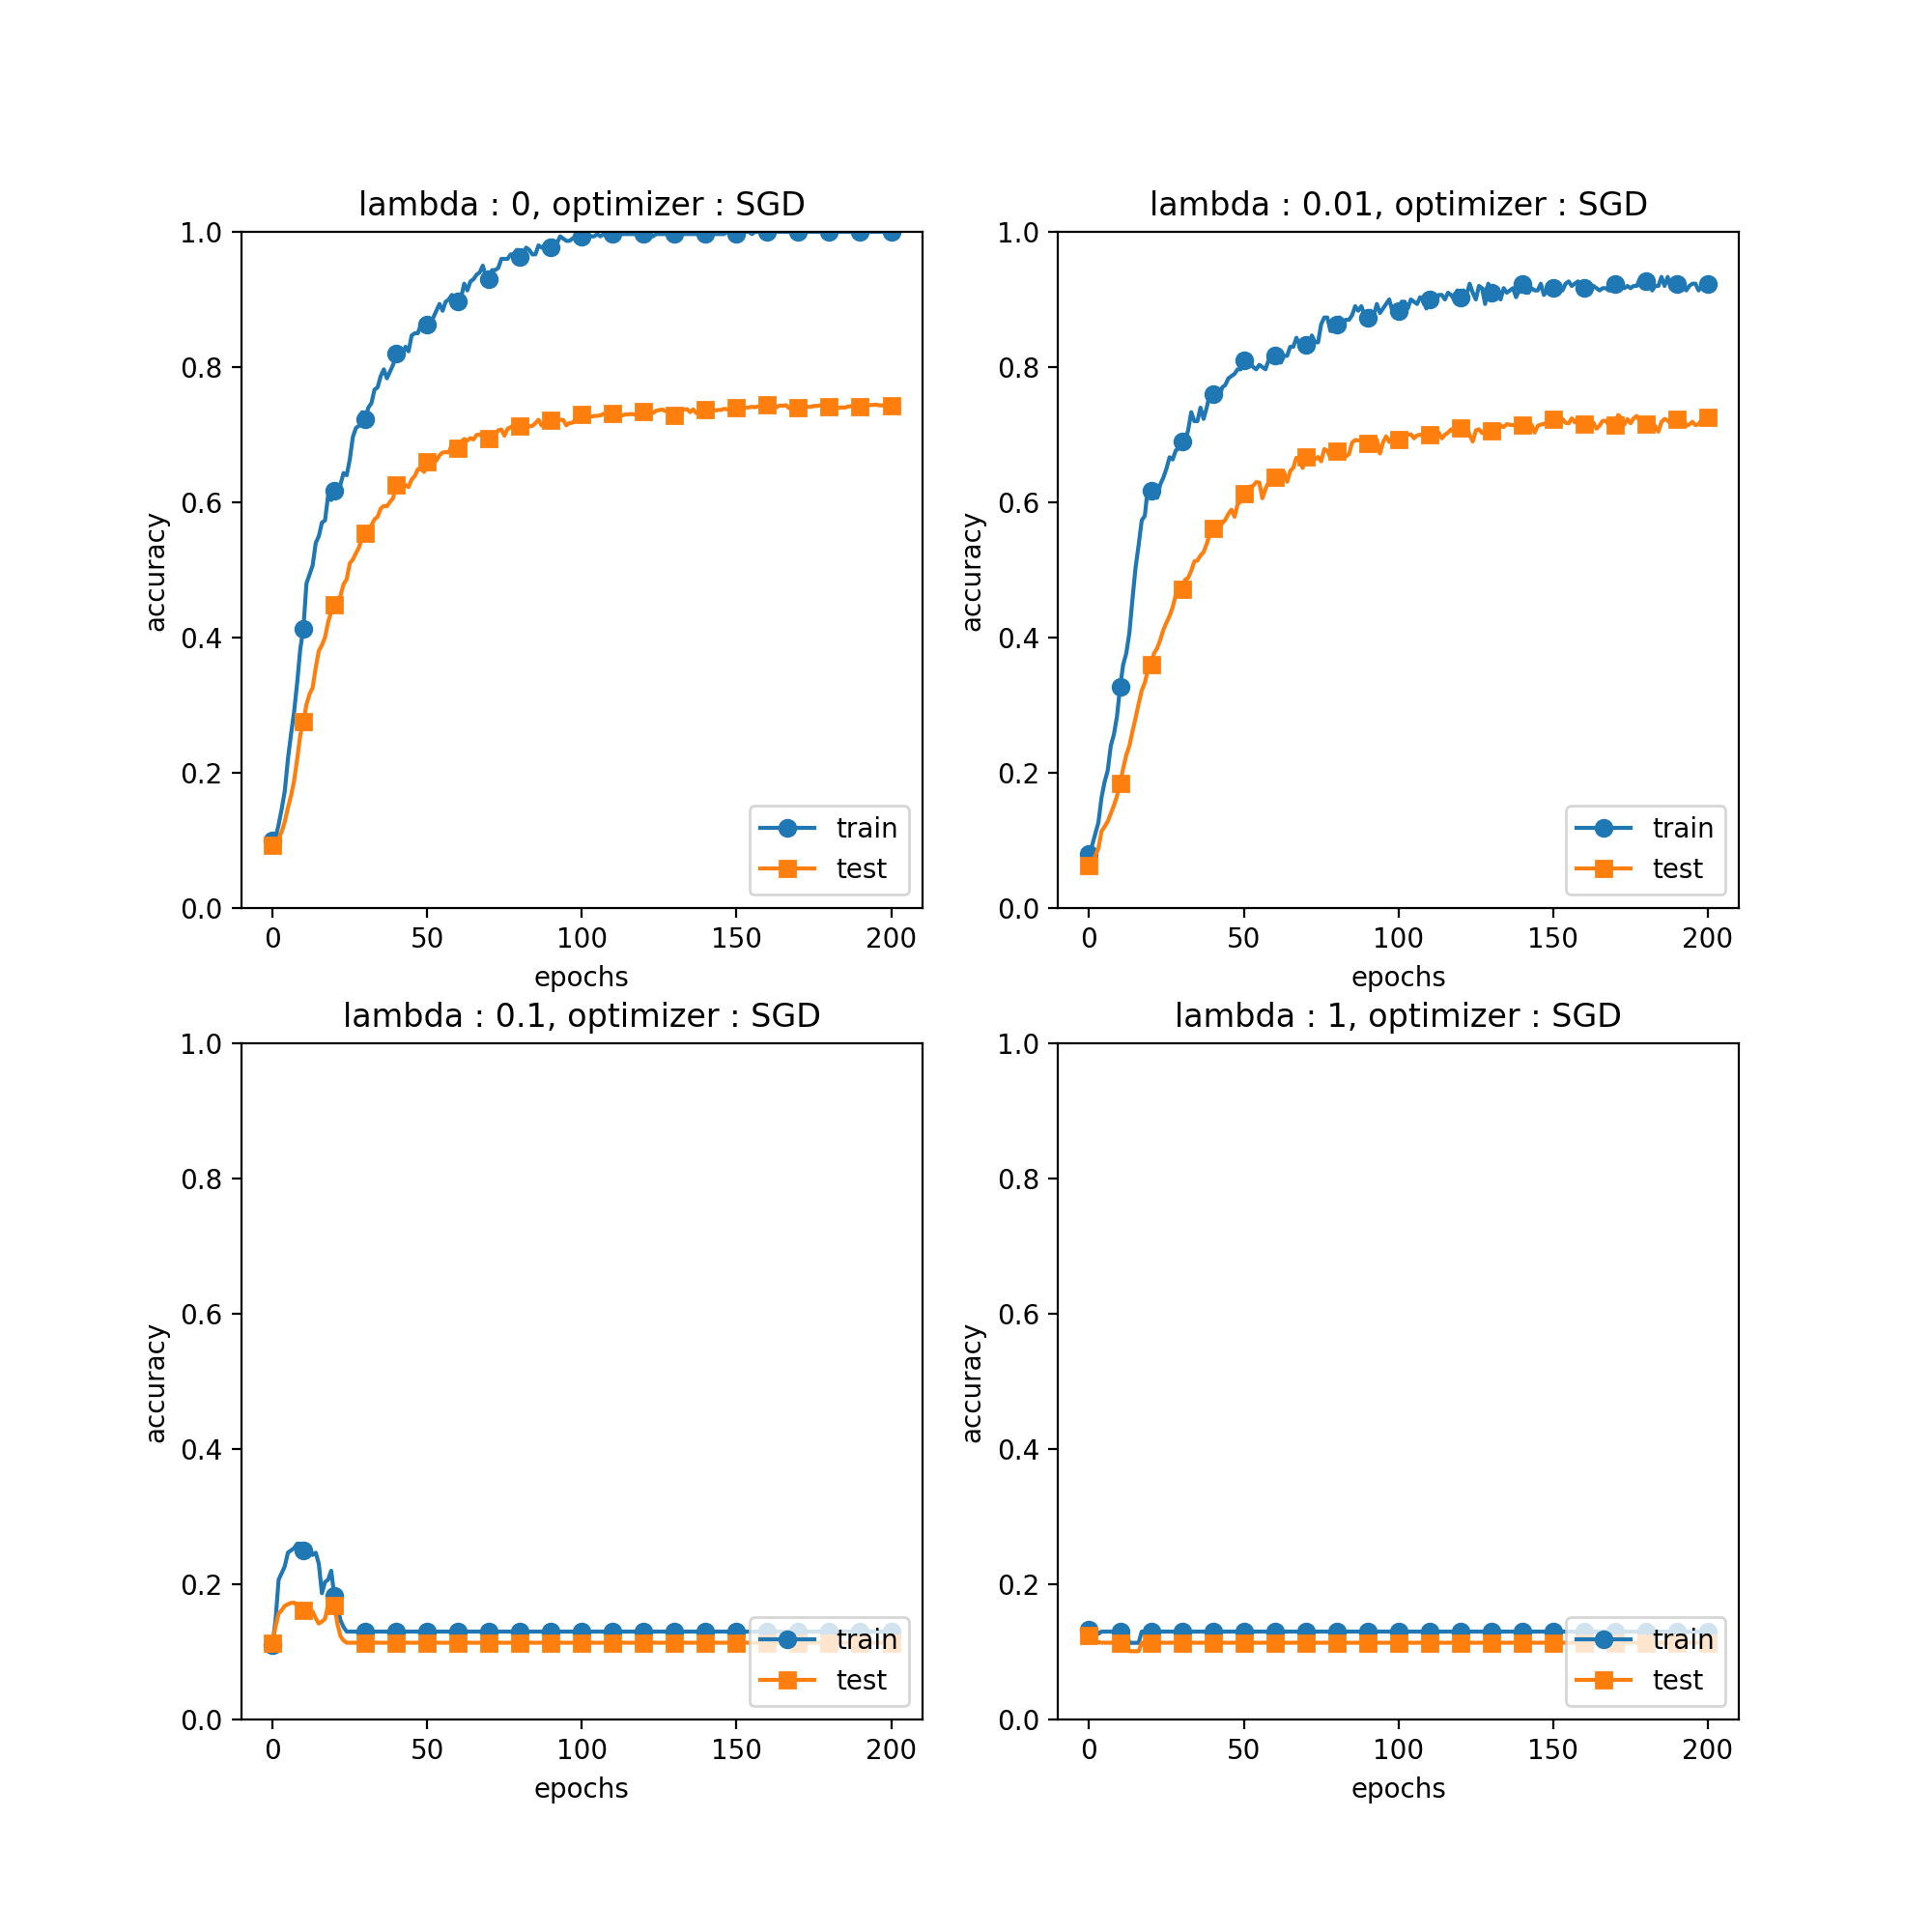

In [8]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_decay_test_L1penalization\\SGD_weight_decay_test.png')

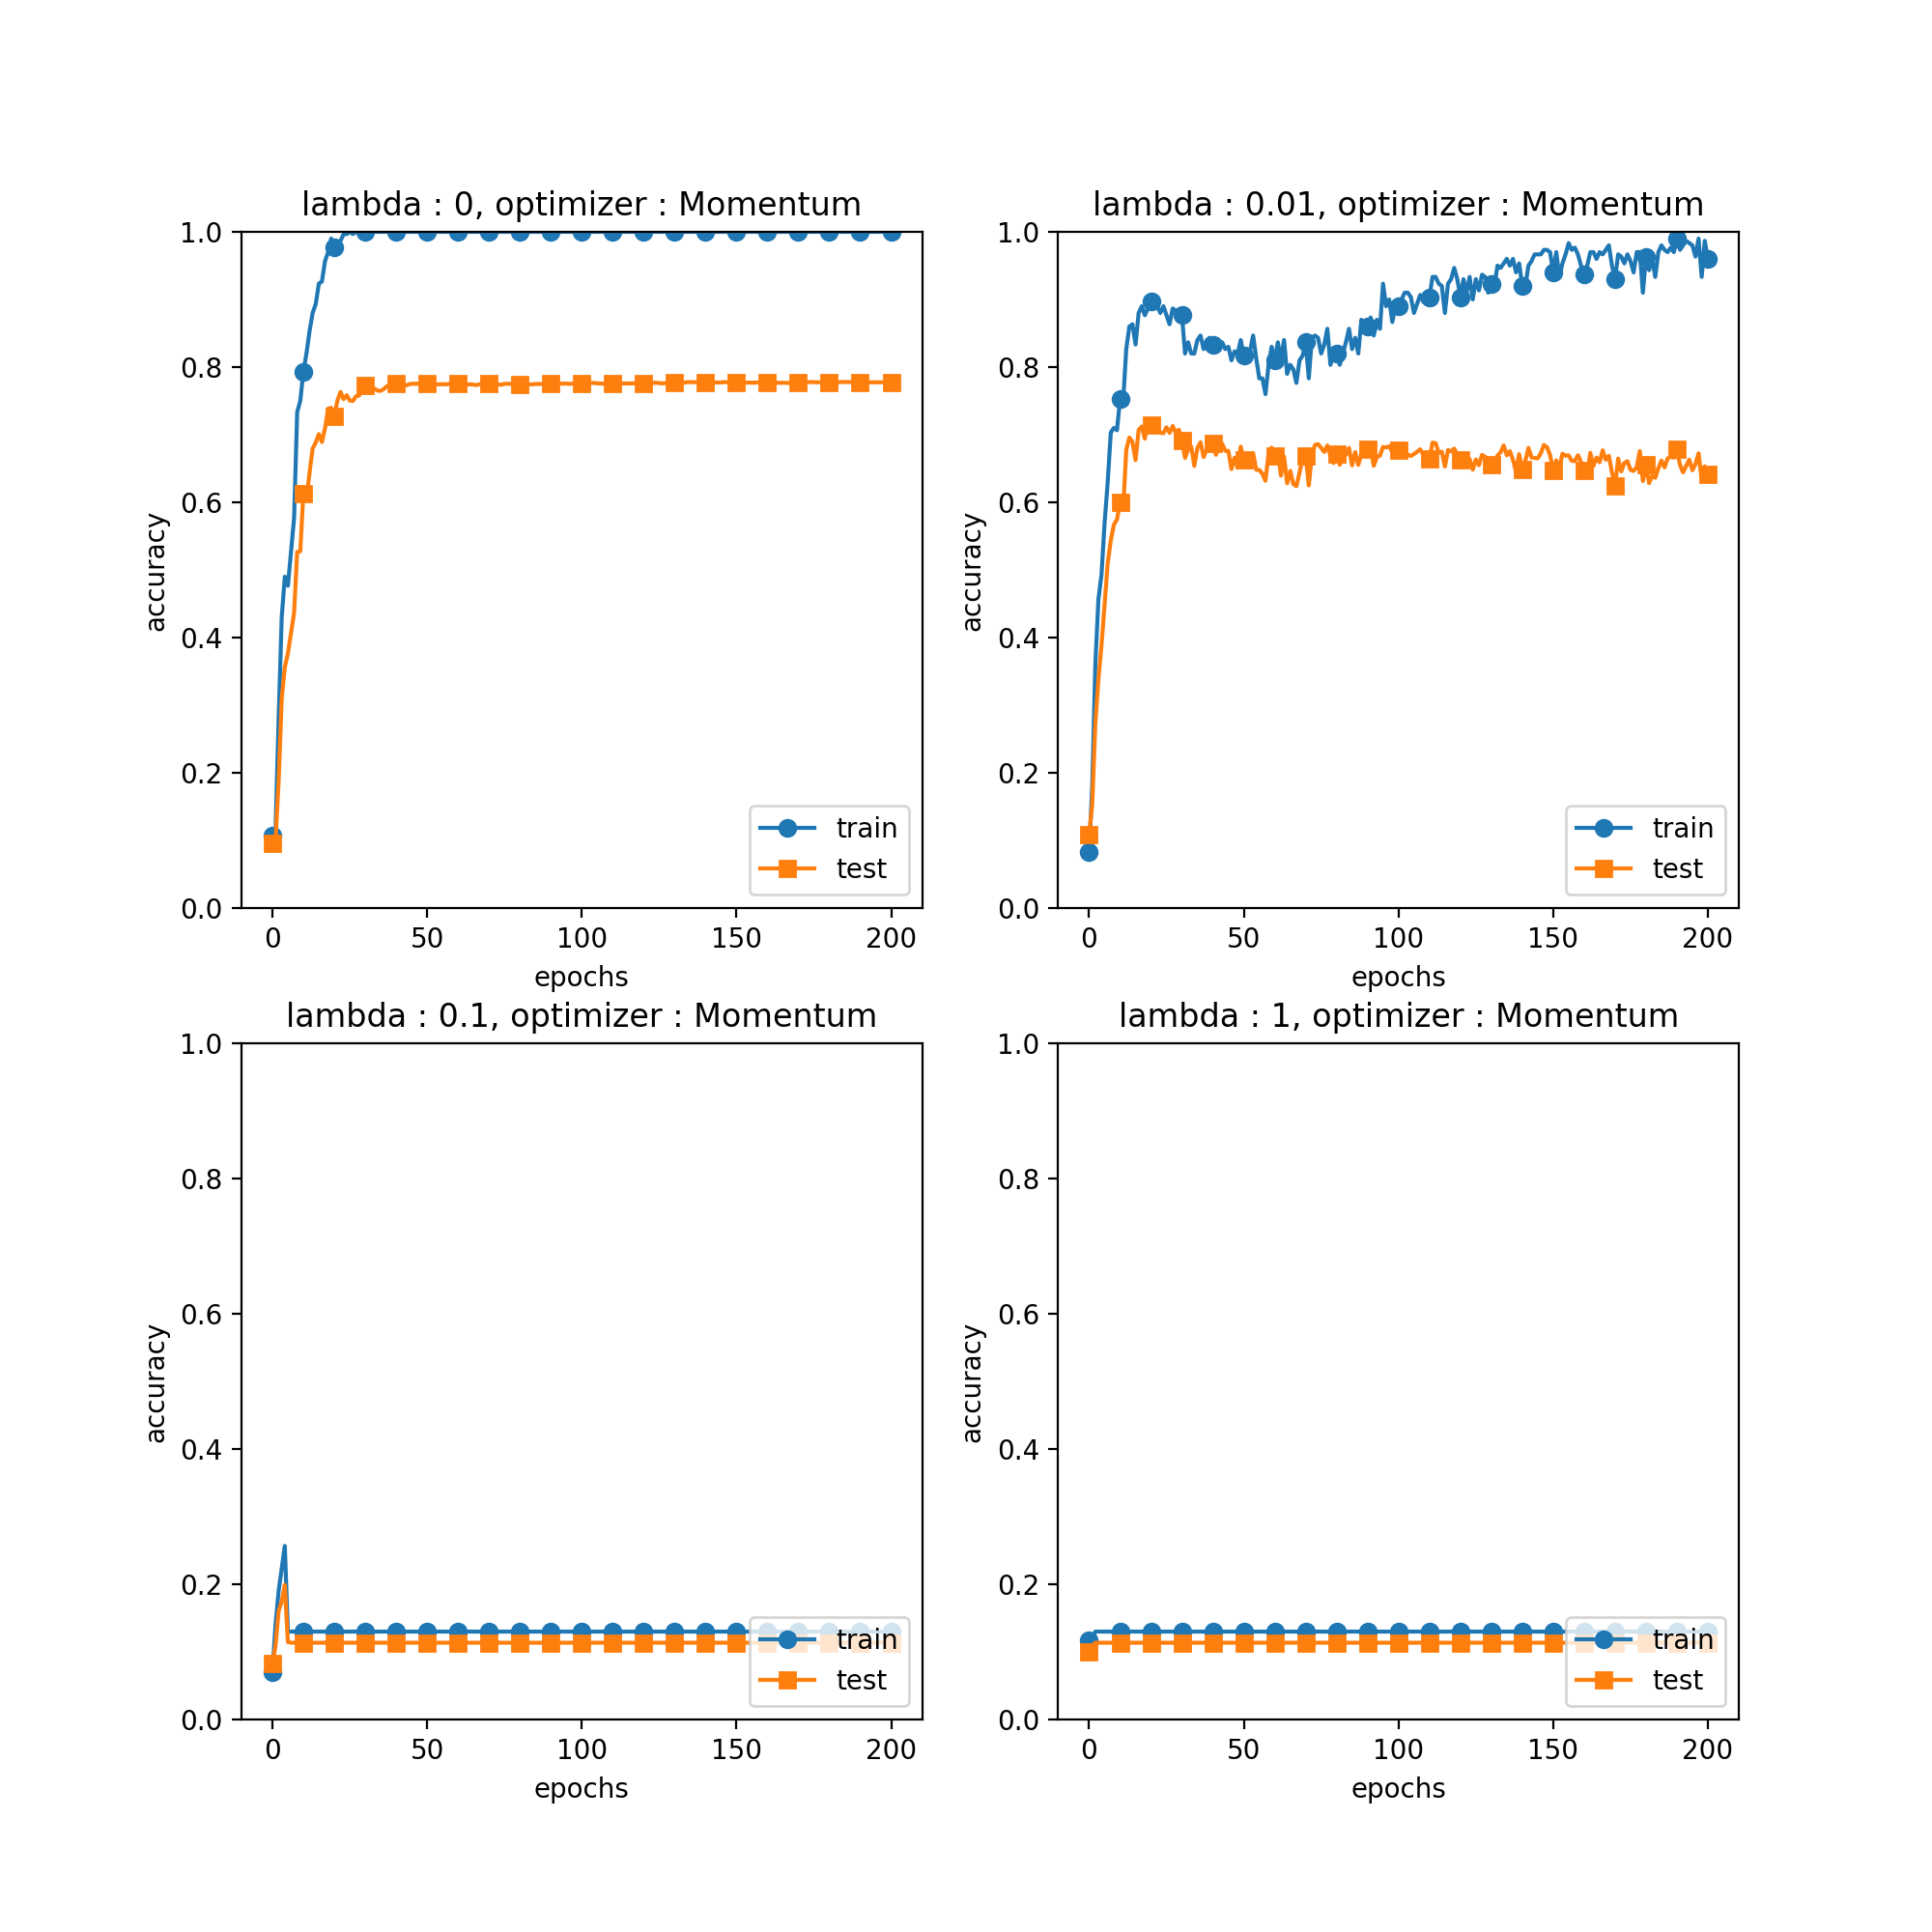

In [9]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_decay_test_L1penalization\\Momentum_weight_decay_test.png')

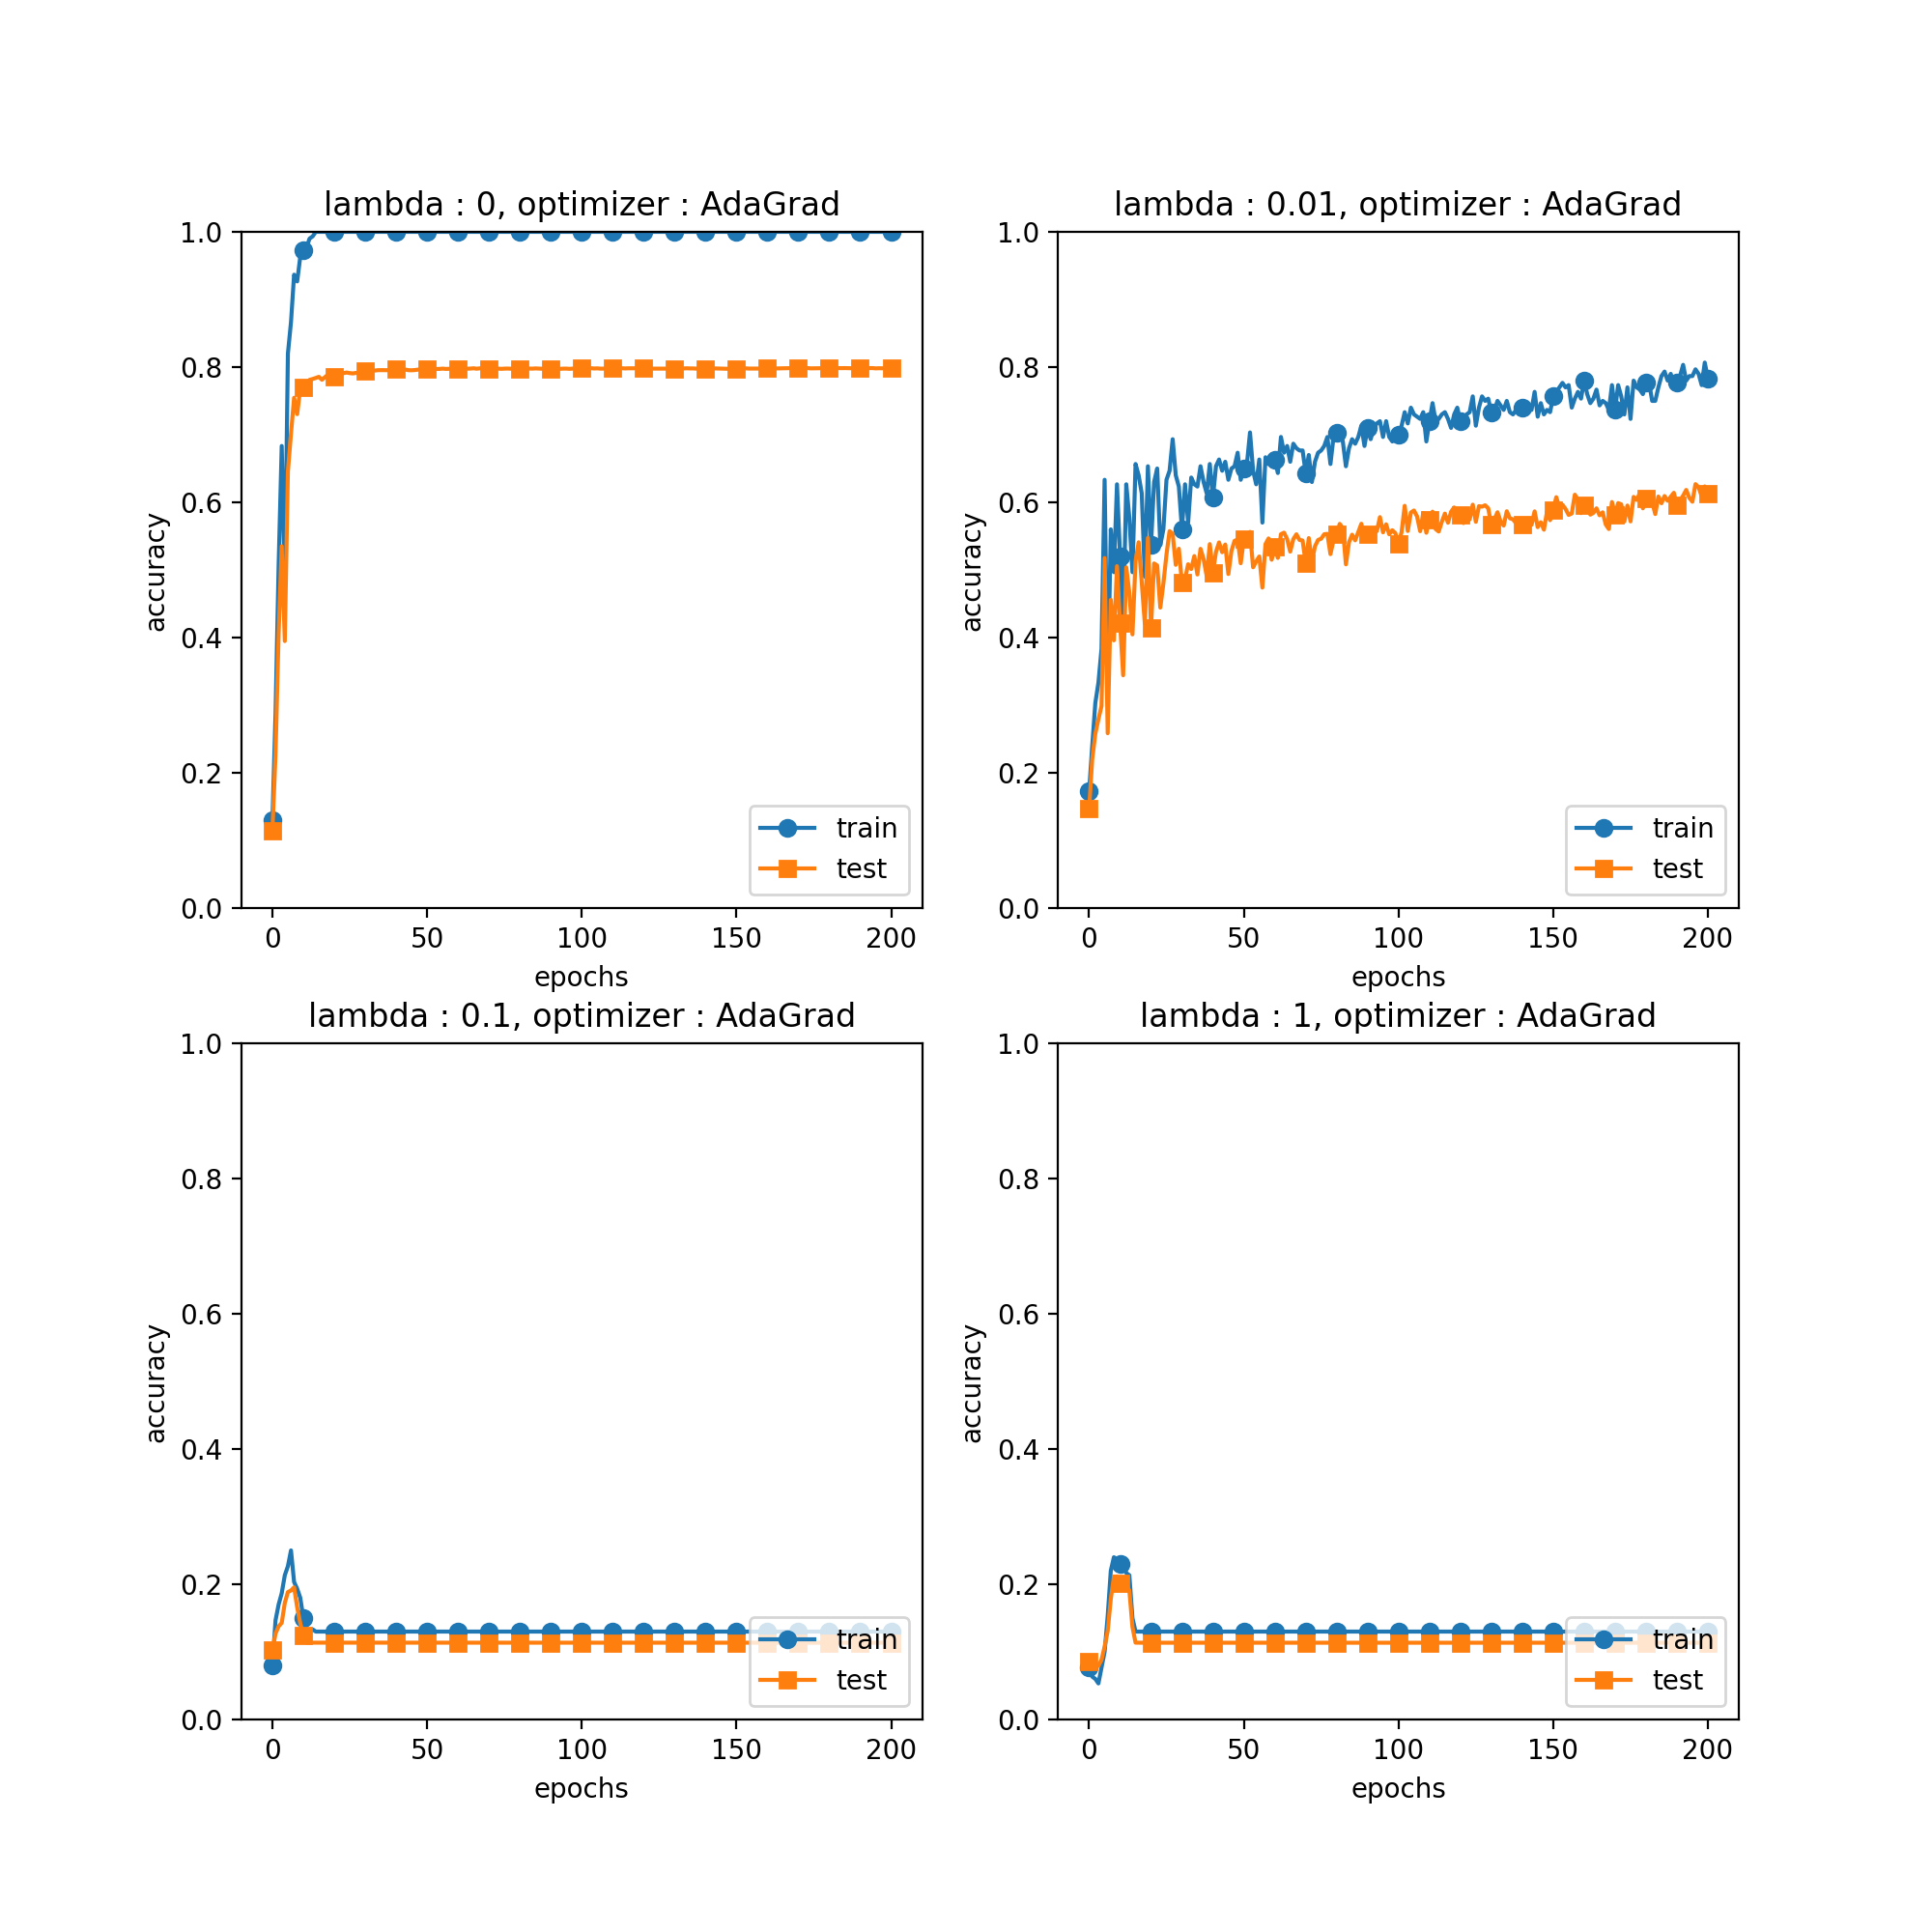

In [10]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_decay_test_L1penalization\\AdaGrad_weight_decay_test.png')

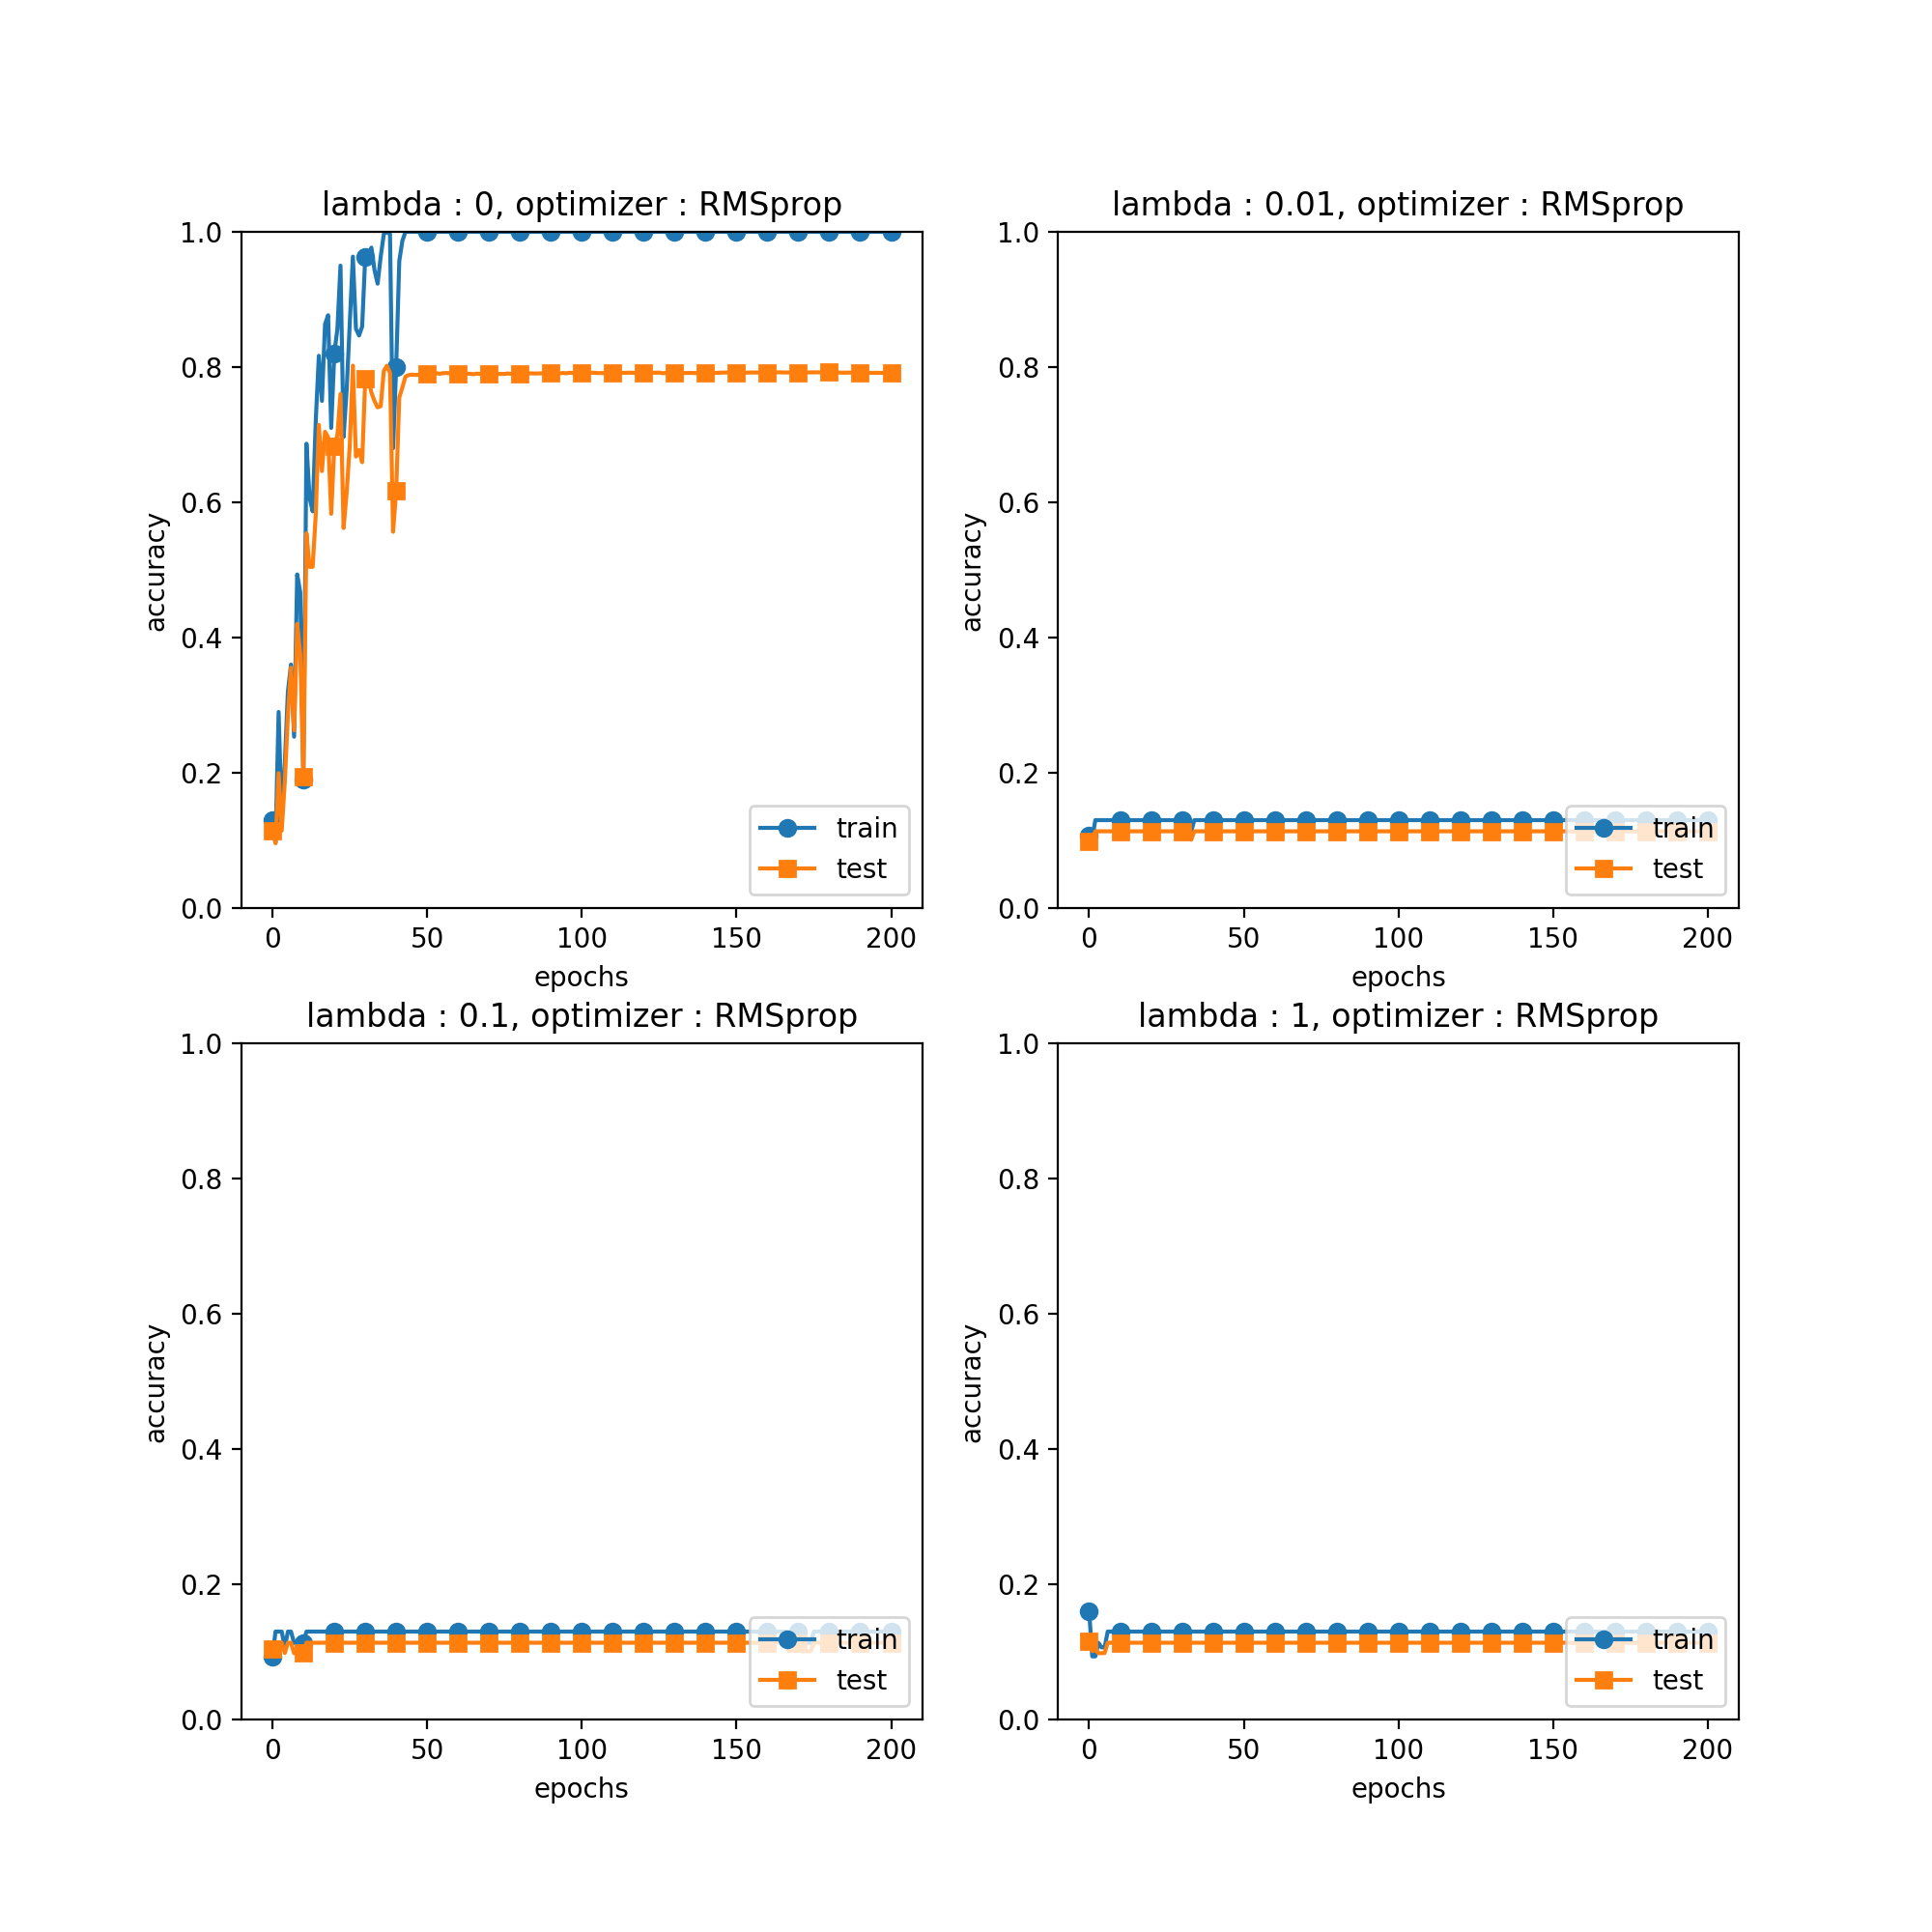

In [11]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_decay_test_L1penalization\\RMSprop_weight_decay_test.png')

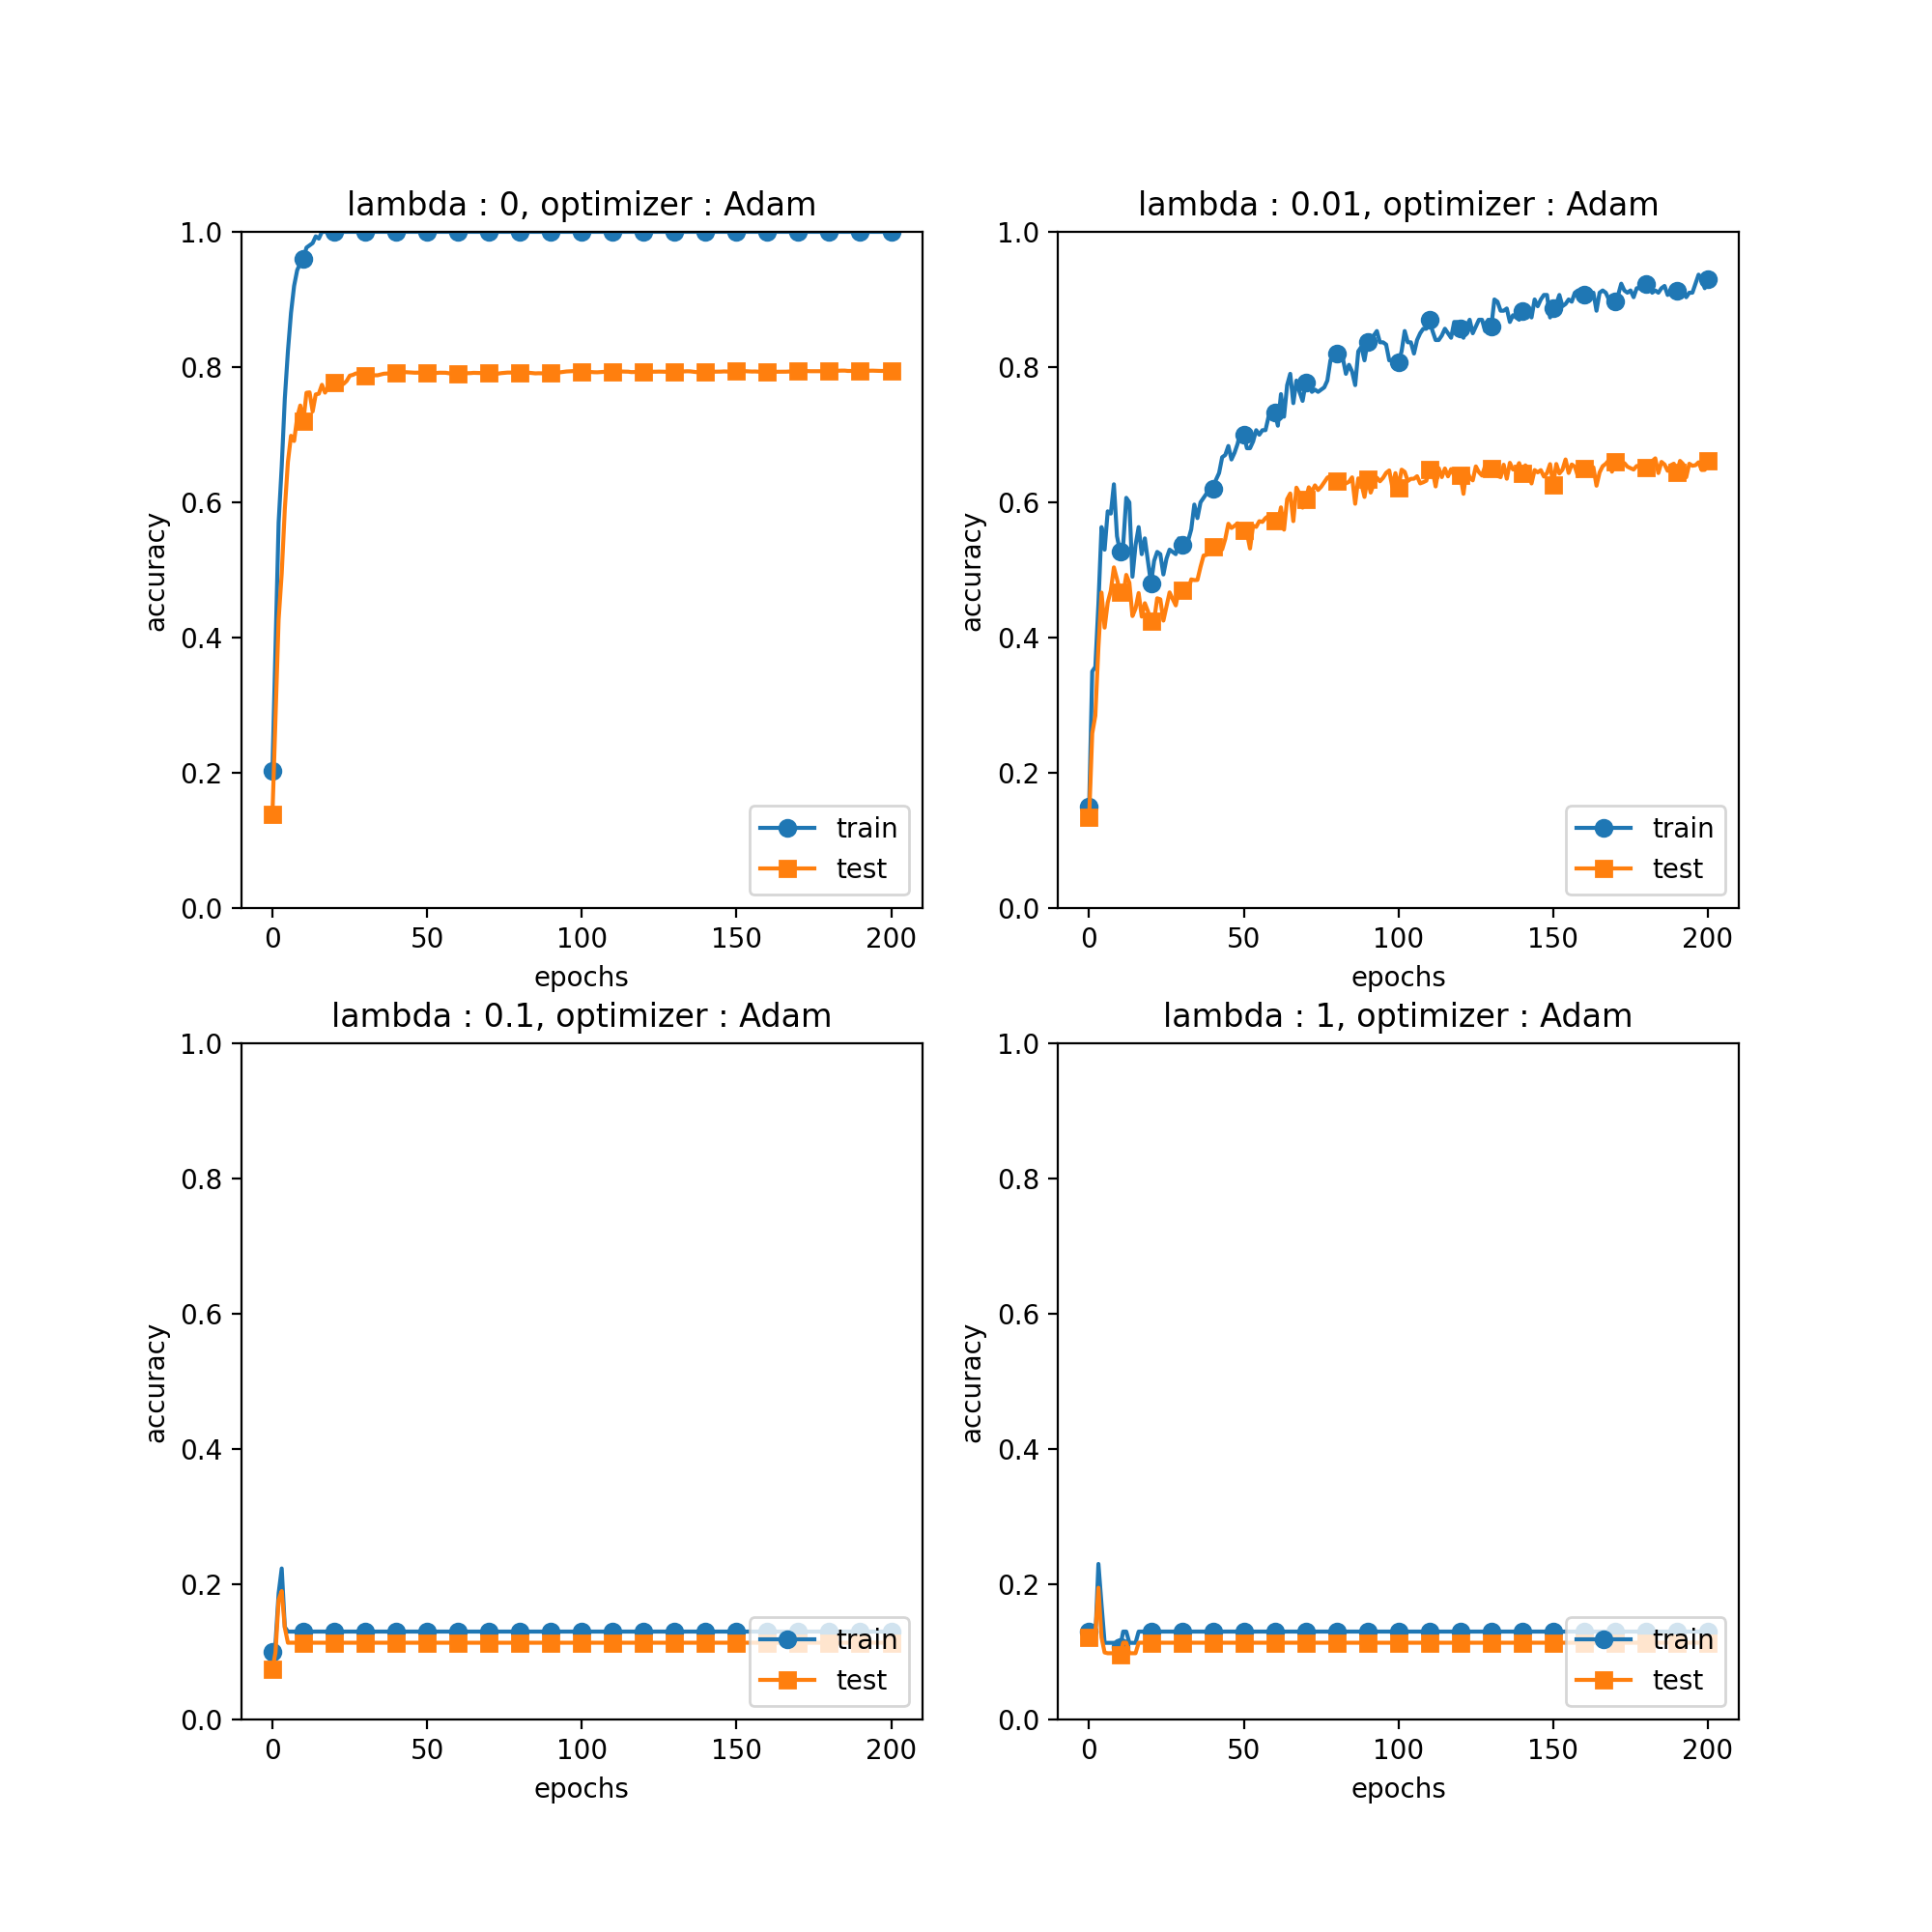

In [12]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\weight_decay_test_L1penalization\\Adam_weight_decay_test.png')

[그림6-21]과 같이 훈련 데이터에 대한 정확도와 시험 데이터에 대한 정확도에는 여전히 차이가 있지만, 가중치 감소를 이용하지 않은 경우보다 이용한 경우가 그 차이가 조금 더 적은 경우가 존재하였으며, 이 경우도 마찬가지로 최적화 알고리즘이 무엇이냐에 따라, 그리고 정칙화 방법이 무엇이냐에 따라 그 정확도 차이가 다르게 나타남을 확인할 수 있었다.

### 6.4.3 드롭아웃
앞 절에서는 과적합을 억제하는 방식으로 손실 함수에 가중치의 $L_2$ 노름을 더한 가중치 감소 방법을 설명하였다. 가중치 감소는 간단하게 구현할 수 있고 어느 정도 지나친 학습을 억제할 수 있다. 그러나 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려워진다. 이럴 때는 흔히 $\small \textbf{드롭아웃}^{\text{Dropout}}$이라는 기법을 이용한다.       

드롭아웃은 뉴런을 임의로 비활성화시키면서 학습하는 방법이다. 훈련 때 은닉층의 뉴런을 $p$의 확률로 비활성화시킨다. 비활성화된 뉴런은 [그림6-22]와 같이 신호를 전달하지 않게 된다. 훈련 때는 데이터를 신경망 모델에 흐르게 할 때마다 비활성화시킬 뉴런을 $p$의 확률로 선택하고, 시험 때는 모든 뉴런에 신호를 전달한다. 단, 시험 때는 각 뉴런의 출력에 훈련 때 활성화한 비율$(1-p)$을 곱하여 출력하게 된다.        

#### [그림6-22] 드롭아웃의 개념 : 왼쪽이 일반적인 신경망, 오른쪽이 드롭아웃을 적용한 신경망. 드롭아웃은 뉴런을 무작위로 선택해 삭제하여 신호 전달을 차단한다.

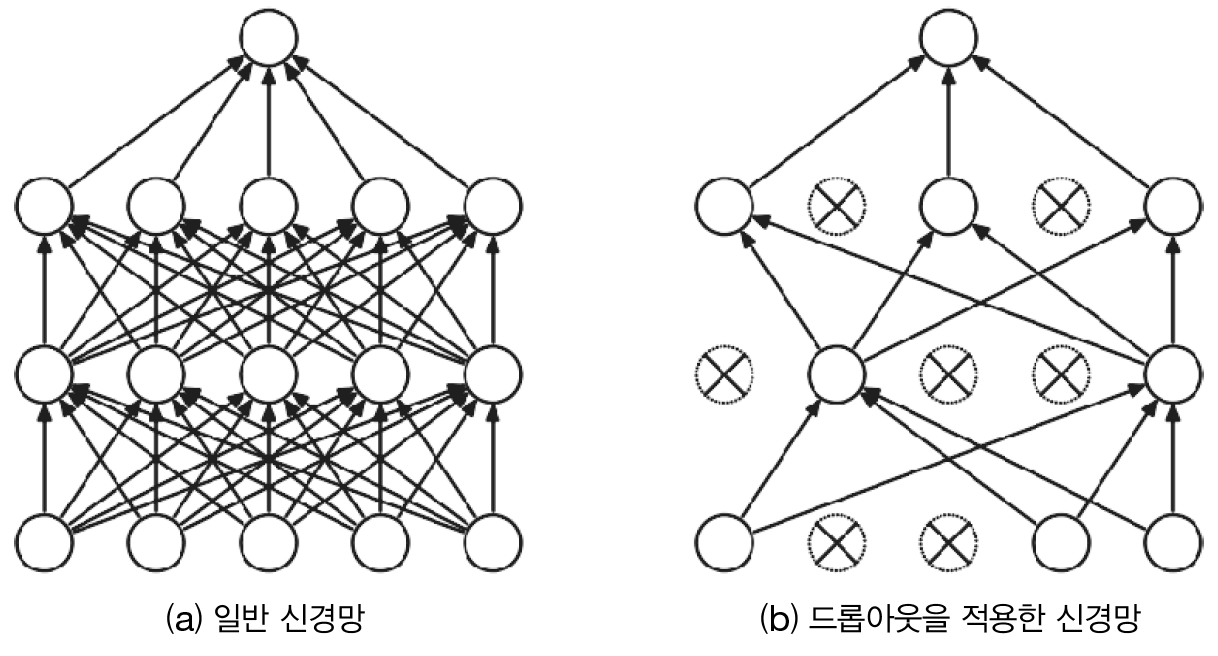

In [4]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-22.png')

이제 드롭아웃을 구현할 차례이다. 다음 코드는 되도록 이해하기 쉽게 구현한 것이다. 순전파를 담당하는 `forward` 메서드에서는 훈련 때 (`train_flg = True`일 때)만 잘 계산해두면 시험 때는 단순히 데이터를 신경망 모델에 흐르게 냅두면 된다. 시험때는 활성화 비율 $(1-p)$을 각 뉴런의 출력에 곱하여 출력해야 한다.

In [13]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

여기에서의 핵심은 훈련 시에는 순전파 때마다 `self.mask`에 삭제할 뉴런을 `False`로 표시한다는 것이다. `self.mask`는 `x`와 형상이 같은 배열을 무작위로 생성하고, 그 값이 `dropout_ratio`보다 큰 원소만 `True`로 설정한다. 역전파 때의 동작은 `ReLU`와 같다. 즉, 순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고, 순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 통과시키지 않는 것이다.      

그럼 드롭아웃의 효과를 MNIST 데이터셋으로 확인해보자. 소스 코드는 ch06/overfit_dropout.py이다. 참고로, 소스 코드에서는 `Trainer`라는 클래스를 이용하여 구현을 간소화하였다.

$\textbf{NOTE}$     
> common/trainer.py에는 `Trainer`라는 클래스를 구현해두었다. 이 클래스는 지금까지 해온 것과 같은 네트워크 학습을 대신 해준다. 자세한 내용은 common/trainer.py와 ch06/overfit_dropout.py를 참고하자.

자, 드롭아웃 실험은 앞의 실험과 마찬가지로 7층 네트워크(각 층의 뉴런 수는 100개, 활성화 함수는 ReLU)를 써서 진행하게 된다. 결과는 [그림6-23]과 같다.

#### [그림6-23] 순서대로, 드롭아웃비율을 0, 0.2, 0.5로 드롭아웃을 적용한 결과

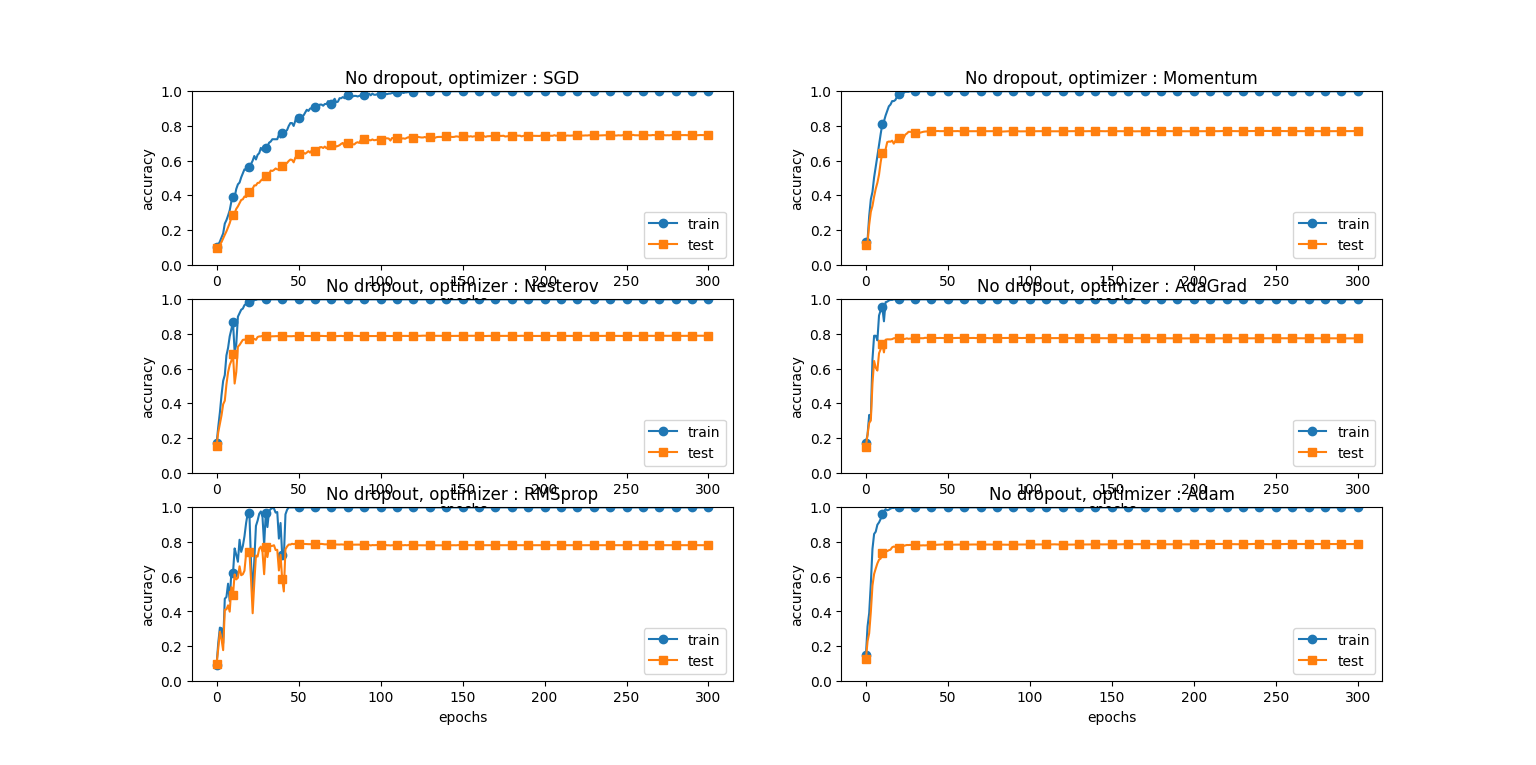

In [3]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\overfit_dropout\\overfit_dropout_000_ratio.png')

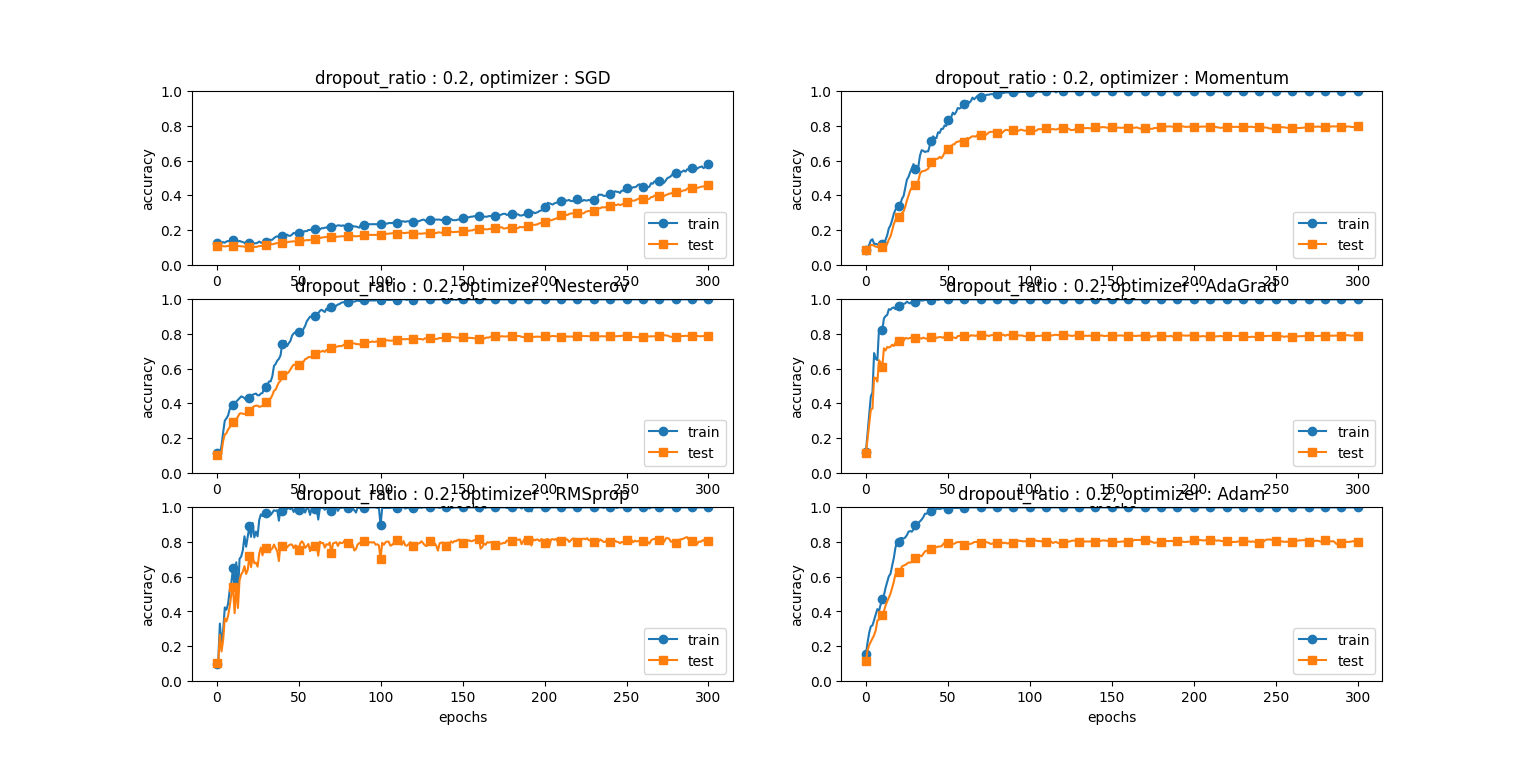

In [6]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\overfit_dropout\\overfit_dropout_020_ratio.png')

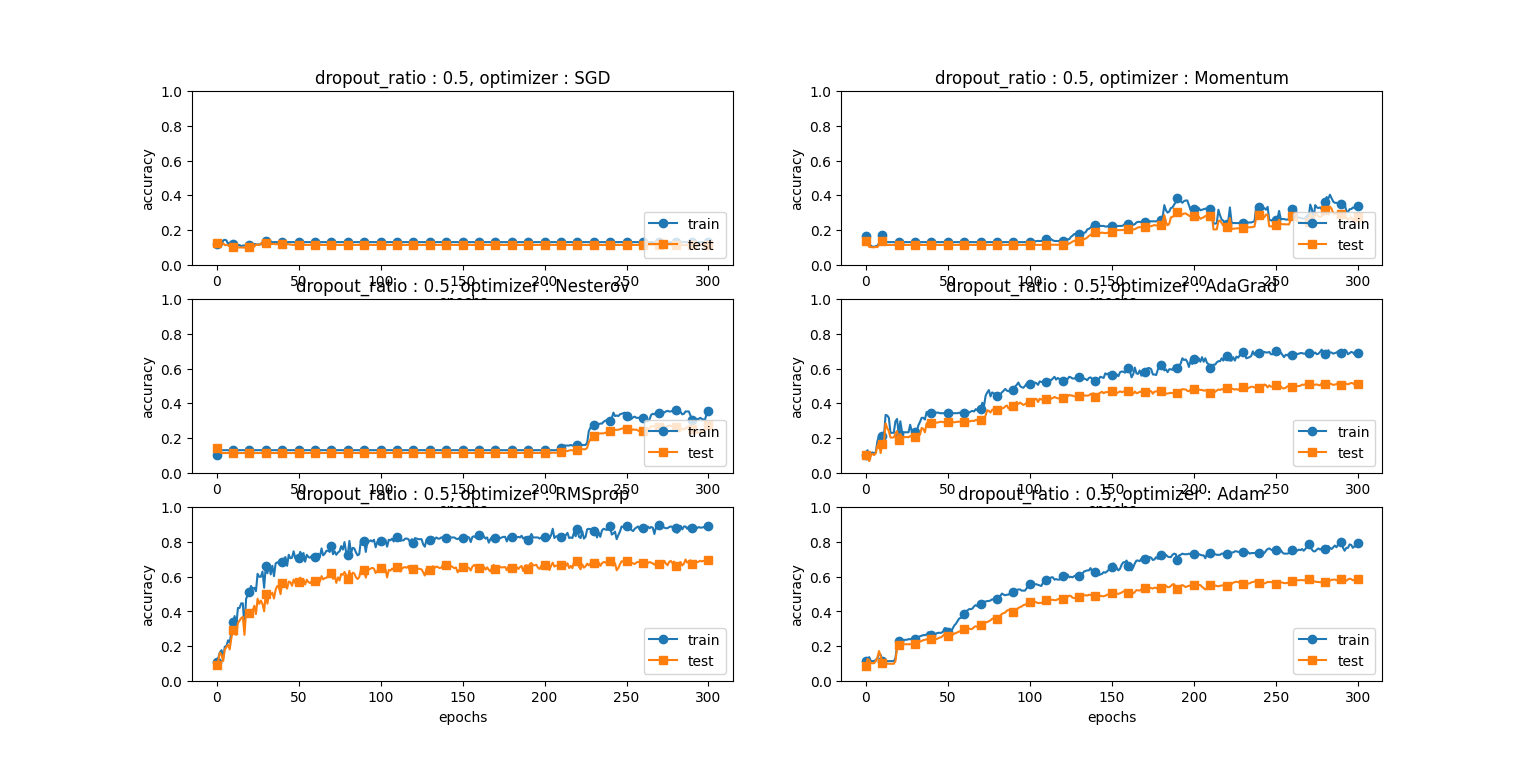

In [7]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\overfit_dropout\\overfit_dropout_050_ratio.png')

그림과 같이 드롭아웃을 적용하니 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄었다. 또, 훈련 데이터에 대한 정확도가 100%에 도달하지도 않게 되었다. 이처럼 드롭아웃을 이용하면 표현력을 높이면서도 과적합을 억제할 수 있다. 그리고 이 경우도 마찬가지로 드롭아웃 비율과 최적화 알고리즘이 무엇인지에 따라 그 결과가 다름을 확인할 수 있다.       

$\textbf{NOTE}$     
> 기계학습에서는 $\textbf{앙상블 학습}^{\text{ensemble learning}}$을 애용한다. 앙상블 학습은 개별적으로 학습시킨 여러 모델의 출력을 평균 내어(혹은 $\text{투표}^{\text{voting}}$를 통해) 추론하는 방식이다. 신경망의 맥락에서 얘기하면, 가령 같은 (혹은 비슷한) 구조의 네트워크를 5개 준비하여 따로 따로 학습시키고, 시험 때는 그 5개의 출력을 평균 내어 답하는 것이다. 앙상블 학습을 수행하면 신경망의 정확도가 몇% 정도 개선된다는 것이 실험적으로 알려져 있다.       

> 앙상블 학습은 드롭아웃과 밀접한 관계를 가진다. 드롭아웃이 학습 때 뉴런을 무작위로 비활성화하는 행위를 매번 다른 모델을 학습시키는 것으로 해석할 수 있기 때문이다. 그리고 추론 때는 뉴런의 출력에 비활성화한 비율(이를테면 0.5 등)을 곱함으로써 앙상블 학습에서 여러 모델의 평균을 내는 것과 같은 효과를 얻는 것이다. 즉, 드롭아웃은 앙상블 학습과 같은 효과를 (대략) 하나의 네트워크로 구현했다고 생각할 수 있다.

## 6.5 적절한 하이퍼파라미터 값 찾기
신경망에는 하이퍼파라미터가 다수 등장한다. 여기서 말하는 하이퍼파라미터는, 예를 들어 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소 등이다. 이러한 하이퍼파라미터의 값을 적절히 설정하지 않으면 모델의 성능이 크게 떨어지기도 한다. 하이퍼파라미터의 값은 매우 중요하지만 그 값을 결정하기까지는 일반적으로 많은 시행착오를 겪게 된다. 이번 절에서는 하이퍼파라미터의 값을 최대한 효율적으로 탐색하는 방법을 설명한다.

### 6.5.1 검증 데이터
지금까지는 데이터셋을 훈련 데이터와 시험 데이터라는 두 가지로 분리해 이용하였다. 훈련 데이터로는 학습을 하고, 시험 데이터로는 범용 성능을 평가하였다. 그렇게 해서 훈련 데이터에만 지나치게 적합되어 있지 않은지(과적합된 건 아닌지), 그리고 범용 성능은 어느 정도인지 같은 것을 평가할 수 있었다.       

앞으로 하이퍼파라미터를 다양한 값으로 설정하고 검증할 텐데, 여기서 주의할 점은 하이퍼파라미터의 성능을 평가할 때는 시험 데이터를 사용해서는 안 된다는 것이다. 매우 중요하지만 놓치기 쉬운 포인트이다.

같은 성능 평가인데 하이퍼파라미터가 대상일 때는 시험 데이터를 사용해서는 안 되는 이유는 무엇일까? 시험 데이터를 사용하여 하이퍼파라미터를 조정하면 하이퍼파라미터 값이 시험 데이터에 과적합되기 때문이다. 바꿔말하면, 하이퍼파라미터 값의 '좋음'을 시험 데이터로 확인하게 되므로 하이퍼파라미터의 값이 시험 데이터에만 적합하도록 조정되어버리게 된다. 그렇게 되면 다른 데이터에 대해서는 적합되지 못하니 범용 성능이 떨어지는 모델이 될지도 모르는 것이다.     

그래서 하이퍼파라미터를 조정할 때는 하이퍼파라미터 전용 확인 데이터가 필요하다. 하이퍼파라미터 조정용 데이터를 일반적으로 $\small \textbf{검증 데이터}^{\text{validation data}}$라고 부른다. 하이퍼파라미터의 적절성을 평가하는 데이터인 셈이다.

$\textbf{NOTE}$     
> 훈련 데이터는 매개변수(가중치와 편향)의 학습에 이용하고, 검증 데이터는 하이퍼파라미터의 성능을 평가하는 데 이용하게 된다. 시험 데이터는 범용 성능을 확인하기 위해서 마지막에 (이상적으로는 한 번만)이용한다.
> - 훈련 데이터 : 매개변수 학습
> - 검증 데이터 : 하이퍼파라미터 성능 평가
> - 시험 데이터 : 신경망의 범용 성능 평가

데이터셋에 따라서는 훈련 데이터, 검증 데이터, 시험 데이터를 미리 구분(분리)해둔 것도 있으나, MNIST 데이터셋은 훈련 데이터와 시험 데이터로만 분리되어 있다. 이런 경우에는 (필요하다면) 사용자가 직접 데이터를 분리해야할 것이다. MNIST 데이터셋에서 검증 데이터를 얻는 가장 간단한 방법은 훈련 데이터 중 20% 정도를 검증 데이터로 먼저 분리하는 것이다.

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


In [2]:
x_val.shape, t_val.shape, x_train.shape, t_train.shape

((12000, 784), (12000,), (48000, 784), (48000,))

이 코드는 훈련 데이터를 분리하기 전에 입력 데이터와 정답 레이블을 뒤섞는다. 데이터셋 안의 데이터가 치우쳐져 있을지도 모르기 때문이다(예컨대 숫자 '0'에서 '9'까지 순서대로 정렬되어 있을 수도 있다). 참고로, 여기에서 사용한 `shuffle_dataset`함수는 `np.random.shuffle`을 이용한 것으로, 그 구현은 common/util.py에 있다.       

이어서 검증 데이터를 사용하여 하이퍼파라미터를 최적화하는 기법을 살펴보자.

### 6.5.2 하이퍼파라미터 최적화
하이퍼파라미터를 최적화할 때의 핵심은 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것이다. 범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸 (샘플링) 후, 그 값으로 정확도를 평가해야 한다. 정확도를 잘 살피면서 이 작업을 여러 번 반복하여 하이퍼파라미터의 '최적 값'의 범위를 좁혀가는 것이 핵심이다.        

$\textbf{NOTE}$     
> 신경망의 하이퍼파라미터 최적화에서는 $\small \text{그리드 서치}^{\text{grid search}}$같은 규칙적인 탐색보다는 무작위로 샘플링하여 탐색하는 편이 좋은 결과를 낸다고 알려져 있다. 이는 최종 정확도에 미치는 영향력이 하이퍼파라미터마다 다르기 때문이다.

하이퍼파라미터의 범위는 '대략적으로' 지정하는 것이 효과적이다. 실제로도 0.001에서 1,000 사이$(10^{-3}\sim 10^{3})$와 같이 '10의 거듭제곱'단위로 범위를 지정한다. 이를 '$\small \text{로그 스케일}^{\text{log scale}}$로 지정'한다고 한다.       

하이퍼파라미터를 최적화할 때는 딥러닝 학습에는 오랜 시간(예컨대 며칠이나 몇 주 이상)이 걸린다는 점을 기억해야 한다. 따라서 나쁠 듯한 값은 일찍 포기하는 게 좋다. 그래서 학습을 위한 에폭을 작게 하여, 1회 평가에 걸리는 시간을 단축하는 것이 효과적이다.        

이상이 하이퍼파라미터의 최적화이다. 지금까지의 이야기를 정리하면 다음과 같다.
- 0단계
    - 하이퍼파라미터 값의 범위를 설정한다.
- 1단계
    - 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다.
- 2단계
    - 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가한다(단, 에폭은 작게 설정한다).
- 3단계
    - 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

이상을 반복하여 하이퍼파라미터의 범위를 좁혀가고, 어느 정도 좁아지면 그 압축한 범위에서 값을 하나 골라낸다. 이것이 하이퍼파라미터를 최적화하는 하나의 방법이다.

$\textbf{NOTE}$     
> 여기에서 설명한 하이퍼파라미터 최적화 방법은 실용적인 방법이다. 하지만 과학이라기보다는 다분히 수행자의 '지혜'와 '직관'에 의존다한다고 느낌이 더 들 수 있다. 더 세련된 기법을 원하다면 $\small \textbf{베이즈 최적화}^{\text{Bayesian Optimization}}$을 소개할 수 있겠다. 베이즈 최적화는 베이즈 정리를 중심으로 한 수학 이론을 구사하여 더 엄밀하고 효율적으로 최적화를 수행한다. 자세한 내용은 $\text{<Practical Bayesian Optimization of Machine Learning Algorithms>}$논문 등을 참고하자.

### 6.5.3 하이퍼파라미터 최적화 구현하기
그럼 MNIST 데이터셋을 사용하여 하이퍼파라미터를 최적화해보자. 여기에서는 학습률과 가중치 감소의 세기를 조절하는 계수(가중치 감소 계수)를 탐색하는 문제를 풀어보도록 한다.(이 문제는 스탠포드 대학교의 CS231n 수업을 참고하였다).        

앞에서 말한 대로, 하이퍼파라미터의 검증은 그 값을 $0.001 \sim 1,000 (10^{-3} \sim 10^{3})$ 사이 같은 로그 스케일 범위에서 무작위로 추출해 수행한다. 이를 파이썬 코드로는 `10 ** np.random.uniform(-3,3)`처럼 작성할 수 있다. 이 예에서는 가중치 감소 계수를 $10^{-8} \sim 10^{-4}$, 학습률을 $10^{-6} \sim 10^{-2}$ 범위부터 시작한다. 이 경우 하이퍼파라미터의 무작위 추출 코드는 다음과 같이 쓸 수 있다.

```python
weight_decay = 10 ** np.random.uniform(-8,-4)
lr = 10 ** np.random.uniform(-6,-2)
```

이렇게 무작위로 추출한 값을 사용하여 학습을 수행한다. 그 후에는 여러 차례 다양한 하이퍼파라미터 값으로 학습을 반복하며 신경망에 좋을 것 같은 값이 어디에 존재하는지 관찰한다. 자세한 구현은 ch06/hyperparameter_optimization_test.py 파일을 참고하기 바란다.        

자, 가중치 감소 계수의 범위를 $10^{-8} \sim 10^{-4}$, 학습률의 범위를 $10^{-6} \sim 10^{-2}$로 하여 실험하면 결과는 [그림6-24]처럼 된다.

#### [그림6-24] 실선은 검증 데이터에 대한 정확도, 점선은 훈련 데이터에 대한 정확도 (SGD)

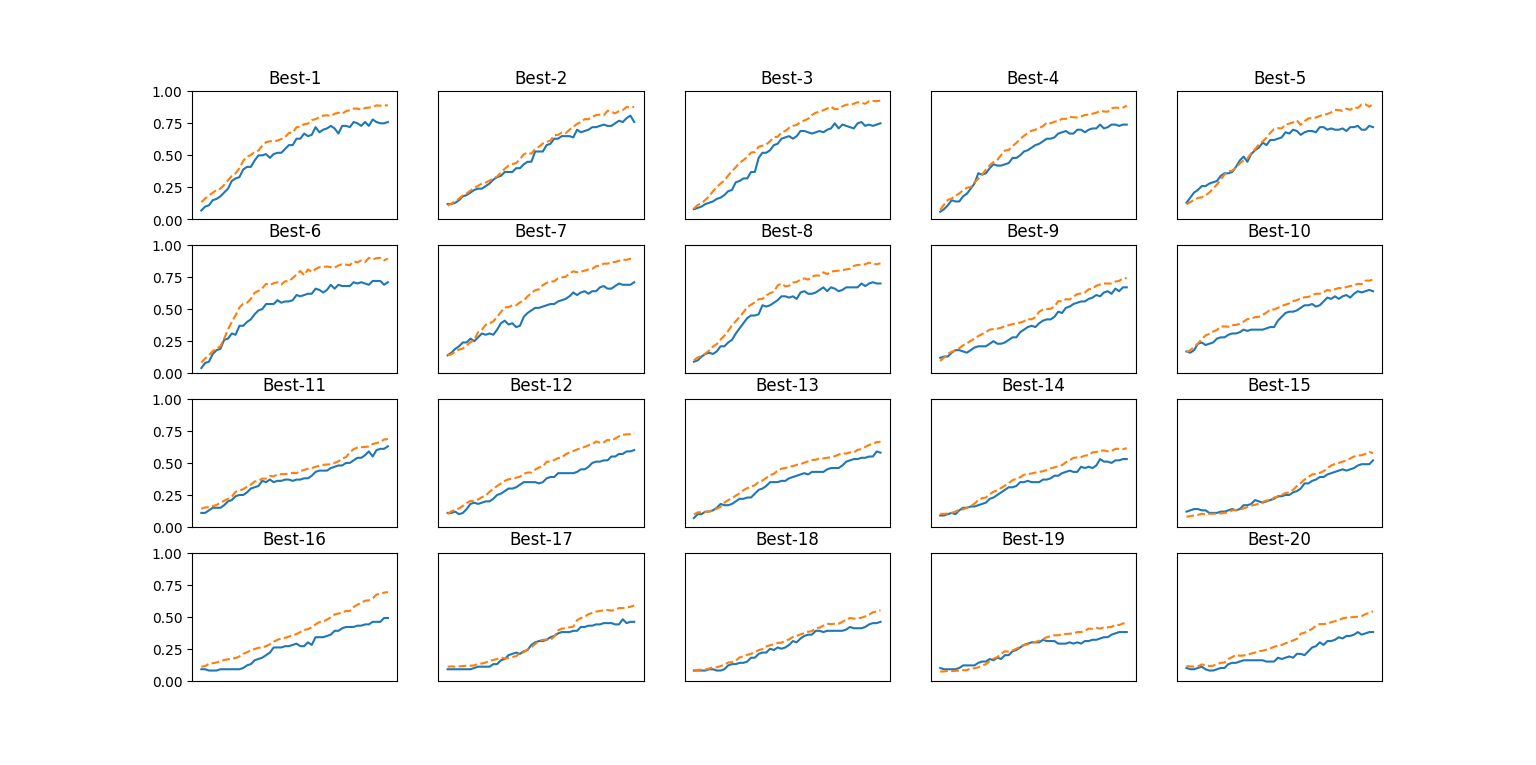

In [2]:
Image.open('C:\\Users\\SAMSUNG\\Downloads\\deep-learning-from-scratch-series\\Part-1\\chapter_6\\images\\fig 6-24(2).png')

[그림6-24]는 검증 데이터의 학습 추이를 정확도가 높은 순서로 나열하였다. 이를 보면 'Best-5'정도까지는 학습이 순조롭게 진행되고 있음을 알 수 있다. 이를 바탕으로 'Best-5'까지의 하이퍼파라미터의 값(학습률과 가중치 감소 계수)을 살펴보자. 결과는 다음과 같다.

```python
=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.76) | lr:0.009612999830366153, weight decay:2.9324913311335862e-08
Best-2(val acc:0.76) | lr:0.009022126347623543, weight decay:2.6237086901002056e-06
Best-3(val acc:0.75) | lr:0.009779416283354353, weight decay:5.454978296754224e-06
Best-4(val acc:0.74) | lr:0.008372082486564493, weight decay:4.662022567055921e-05
Best-5(val acc:0.72) | lr:0.007261748684212012, weight decay:5.897614077656425e-07
```

이 결과를 보면 학습이 잘 진행될 때의 학습률은 $0.007 \sim 0.01$, 가중치 감소 계수는 $10^{-8} \sim 10^{-5}$정도라는 것을 알 수 있다. 이처럼 잘될 것 같은 값의 범위를 관찰하고 범위를 계속 좁혀나가는 것이다. 그런 다음 그 축소된 범위로 똑같은 작업을 반복한다. 이렇게 적절한 값이 위치한 범위를 좁혀가다가 특정 단계에서 최종 하이퍼파라미터 값을 하나 선택하면 하이퍼파라미터의 최적화가 끝나게 되는 것이다.

## 6.6 정리
이번 장에서는 신경망 학습에 중요한 기술 몇 가지를 소개하였다. 매개변수 갱신 방법과 가중치의 초깃값을 설정하는 방법, 또 배치 정규화와 드롭아웃 등 현대적인 신경망에서 빼놓을 수 없는 기술들이 그러한 것이다. 여기에서 배운 기술들은 최첨단의 딥러닝에서도 자주 이용되고 있다.

> 이번 장에서 배운 내용
> - 매개변수 갱신 방법에는 확률적 경사 하강법(SGD) 외에도 모멘텀, AdaGrad, RMSprop, Adam 등이 있다.
> - 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요하다.
> - 가중치의 초깃값으로는 'Xaiver 초깃값'과 'He'초깃값이 효과적이다.
> - 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
> - 괒거합을 억제하는 정칙화 방법으로는 가중치 감소와 드롭아웃이 있다.
> - 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 중요하다.